### Importing necessary libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from scipy import stats
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

### Loading data for EDA

In [2]:
data = pd.read_csv('Employee_Performance.csv')
pd.set_option('display.max_columns', None)

data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


### Checking missing values

In [3]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

There are no missing values.

### Converting categorical values into numerical values

In [4]:
list(data.select_dtypes('object'))

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

#### 1. Gender

In [5]:
data['Gender'].value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [6]:
data['Gender'] = data['Gender'].map({'Male':1, 'Female':0})

Map male with 1 & female with 0

#### 2. Educational Background

In [7]:
# Value counts of Education Background
data['EducationBackground'].value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [8]:
# Use frequency encoding
data.loc[data['EducationBackground'] == 'Life Sciences', 'EducationBackground'] = 5
data.loc[data['EducationBackground'] == 'Medical', 'EducationBackground'] = 4
data.loc[data['EducationBackground'] == 'Marketing', 'EducationBackground'] = 3
data.loc[data['EducationBackground'] == 'Technical Degree', 'EducationBackground'] = 2
data.loc[data['EducationBackground'] == 'Other', 'EducationBackground'] = 1
data.loc[data['EducationBackground'] == 'Human Resources', 'EducationBackground'] = 0

In [9]:
data['EducationBackground'].value_counts()

5    492
4    384
3    137
2    100
1     66
0     21
Name: EducationBackground, dtype: int64

#### 3. Marital Status

In [10]:
# Value counts of marital status
data['MaritalStatus'].value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [11]:
# Use mannual encoding
data['MaritalStatus'] = data['MaritalStatus'].map({'Married':2,
                                                   'Single':1,
                                                   'Divorced':0})

In [12]:
data['MaritalStatus'].value_counts()

2    548
1    384
0    268
Name: MaritalStatus, dtype: int64

#### 4. Employee Department

In [13]:
# Value counts of employee department
data['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [14]:
# Use Frequency encoding
data.loc[data['EmpDepartment'] == 'Sales', 'EmpDepartment'] = 5
data.loc[data['EmpDepartment'] == 'Development', 'EmpDepartment'] = 4
data.loc[data['EmpDepartment'] == 'Research & Development', 'EmpDepartment'] = 3
data.loc[data['EmpDepartment'] == 'Human Resources', 'EmpDepartment'] = 2
data.loc[data['EmpDepartment'] == 'Finance', 'EmpDepartment'] = 1
data.loc[data['EmpDepartment'] == 'Data Science', 'EmpDepartment'] = 0

In [15]:
data['EmpDepartment'].value_counts()

5    373
4    361
3    343
2     54
1     49
0     20
Name: EmpDepartment, dtype: int64

#### 5. Employee Job Role

In [16]:
data['EmpJobRole'].value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [17]:
# Use frequency encoding
data.loc[data['EmpJobRole'] == 'Sales Executive', 'EmpJobRole'] = 18
data.loc[data['EmpJobRole'] == 'Developer', 'EmpJobRole'] = 17
data.loc[data['EmpJobRole'] == 'Manager R&D', 'EmpJobRole'] = 16
data.loc[data['EmpJobRole'] == 'Research Scientist', 'EmpJobRole'] = 15
data.loc[data['EmpJobRole'] == 'Sales Representative', 'EmpJobRole'] = 14
data.loc[data['EmpJobRole'] == 'Laboratory Technician', 'EmpJobRole'] = 13
data.loc[data['EmpJobRole'] == 'Senior Developer', 'EmpJobRole'] = 12
data.loc[data['EmpJobRole'] == 'Manager', 'EmpJobRole'] = 11
data.loc[data['EmpJobRole'] == 'Finance Manager', 'EmpJobRole'] = 10
data.loc[data['EmpJobRole'] == 'Human Resources', 'EmpJobRole'] = 9
data.loc[data['EmpJobRole'] == 'Technical Lead', 'EmpJobRole'] = 8
data.loc[data['EmpJobRole'] == 'Manufacturing Director', 'EmpJobRole'] = 7
data.loc[data['EmpJobRole'] == 'Healthcare Representative', 'EmpJobRole'] = 6
data.loc[data['EmpJobRole'] == 'Data Scientist', 'EmpJobRole'] = 5
data.loc[data['EmpJobRole'] == 'Research Director', 'EmpJobRole'] = 4
data.loc[data['EmpJobRole'] == 'Business Analyst', 'EmpJobRole'] = 3
data.loc[data['EmpJobRole'] == 'Senior Manager R&D', 'EmpJobRole'] = 2
data.loc[data['EmpJobRole'] == 'Delivery Manager', 'EmpJobRole'] = 1
data.loc[data['EmpJobRole'] == 'Technical Architect', 'EmpJobRole'] = 0

In [18]:
data['EmpJobRole'].value_counts()

18    270
17    236
16     94
15     77
14     69
13     64
12     52
11     51
10     49
9      45
8      38
7      33
6      33
5      20
4      19
3      16
2      15
1      12
0       7
Name: EmpJobRole, dtype: int64

#### 6. Business Travel Frequency

In [19]:
# Value count of buisness travel frequency
data['BusinessTravelFrequency'].value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [20]:
# Use mannual encoding
data['BusinessTravelFrequency'] = data['BusinessTravelFrequency'].map({'Travel_Rarely':2, 'Travel_Frequently':1, 'Non-Travel':0})

In [21]:
data['BusinessTravelFrequency'].value_counts()

2    846
1    222
0    132
Name: BusinessTravelFrequency, dtype: int64

#### 7. Overtime

In [22]:
data['OverTime'].value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

In [23]:
# Use mannual Encoding
data['OverTime'] = data['OverTime'].map({'No':1, 'Yes':0})

In [24]:
data['OverTime'].value_counts()

1    847
0    353
Name: OverTime, dtype: int64

#### 8. Attrition

In [25]:
# Value counts of Attrition
data['Attrition'].value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [26]:
# Use Mannual encoding
data['Attrition'] = data['Attrition'].map({'No':1,'Yes':0})

In [27]:
data['Attrition'].value_counts()

1    1022
0     178
Name: Attrition, dtype: int64

In [28]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,3,1,5,18,2,10,3,4,55,3,2,4,1,1,12,4,10,2,2,10,7,0,8,1,3
1,E1001006,47,1,3,1,5,18,2,14,4,4,42,3,2,1,2,1,12,4,20,2,3,7,7,1,7,1,3
2,E1001007,40,1,5,2,5,18,1,5,4,4,48,2,3,1,5,0,21,3,20,2,3,18,13,1,12,1,4
3,E1001009,41,1,0,0,2,11,2,10,4,2,73,2,5,4,3,1,15,2,23,2,2,21,6,12,6,1,3
4,E1001010,60,1,3,1,5,18,2,16,4,1,84,3,2,1,8,1,14,4,10,1,3,2,2,2,2,1,3


### Checking for outliers and imputing it

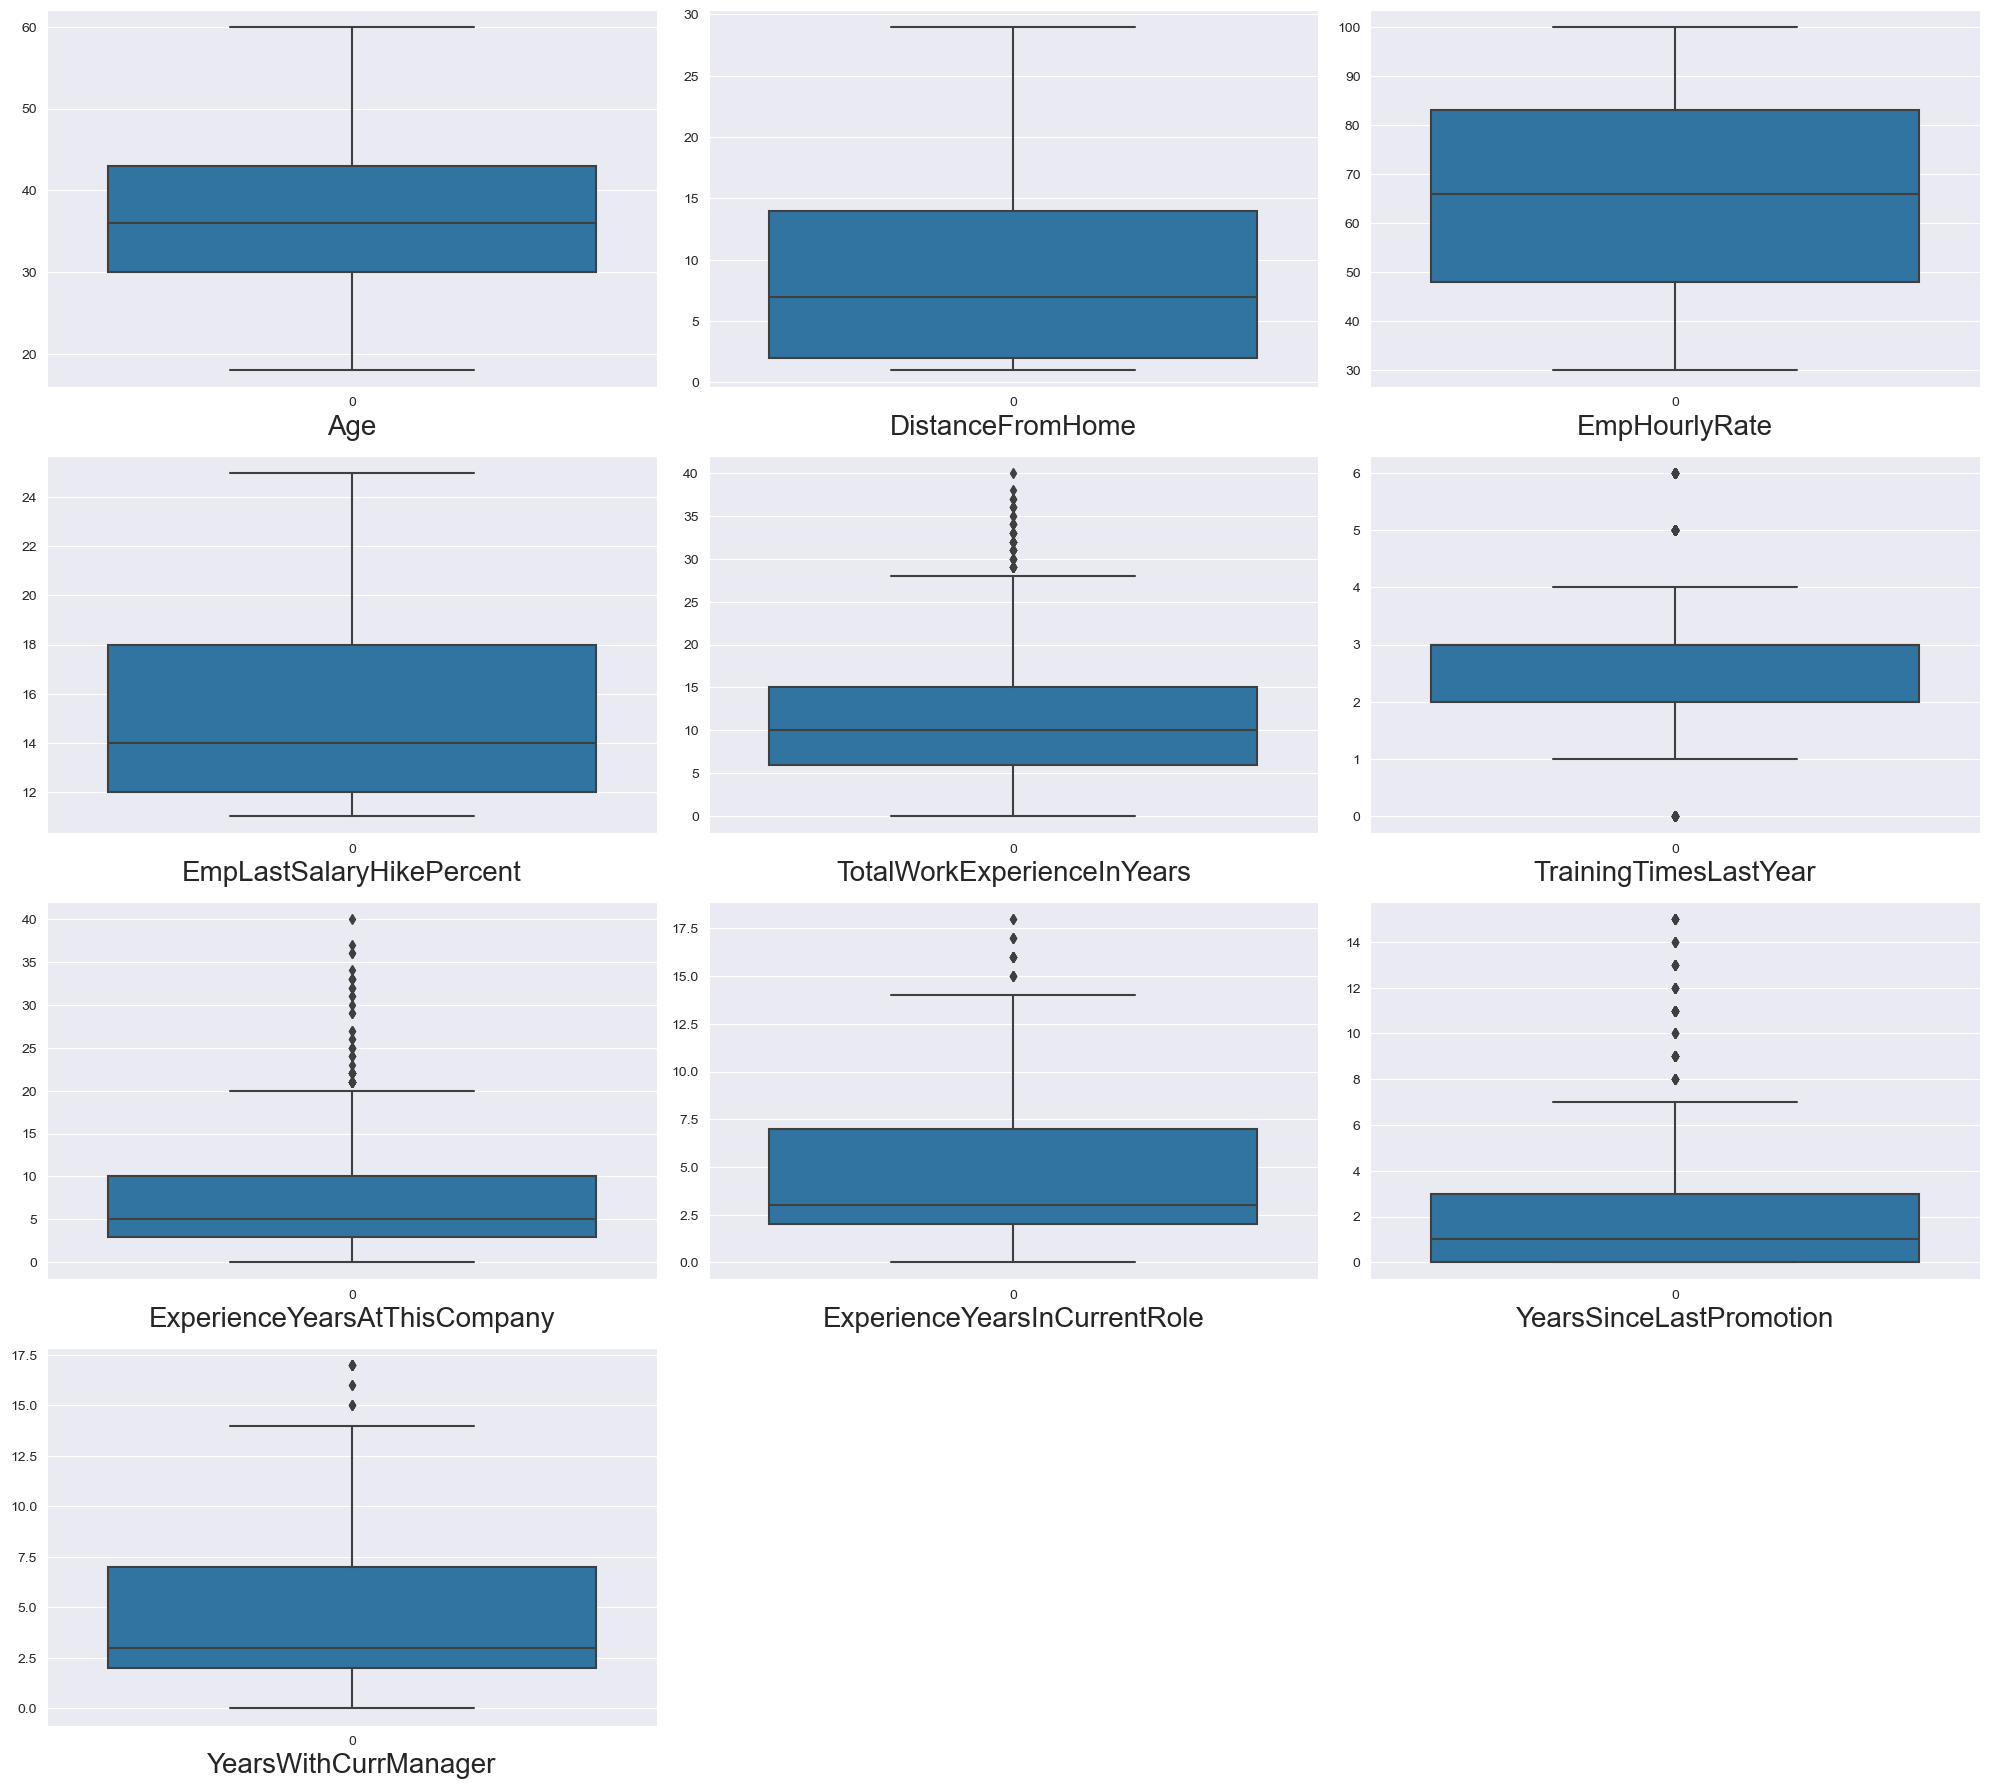

In [29]:
outliers = data[['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
                  'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

plt.figure(figsize=(20,18))
plotno = 1

for column in outliers:
    if plotno<=12:
        plt.subplot(4, 3, plotno)
        sns.boxplot(outliers[column])
        plt.xlabel(column, fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()

#### 1. Total Work Experiance in year

In [30]:
iqr = stats.iqr(data['TotalWorkExperienceInYears'], interpolation='midpoint')
print("IQR:",iqr)

Q1 = data['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = data['TotalWorkExperienceInYears'].quantile(0.75)

min_limit = Q1 - 1.5*iqr
print("Minimum limit:", min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:", max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [31]:
# Imputing outlier
data.loc[data['TotalWorkExperienceInYears'] > max_limit, 'TotalWorkExperienceInYears'] = data['TotalWorkExperienceInYears'].median()

In [32]:
# filtering data after imputation
data.loc[data['TotalWorkExperienceInYears'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 2. Training Times Last Year

In [33]:
iqr = stats.iqr(data['TrainingTimesLastYear'], interpolation='midpoint')
print("IQR:",iqr)

Q1 = data['TrainingTimesLastYear'].quantile(0.25)
Q3 = data['TrainingTimesLastYear'].quantile(0.75)

min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [34]:
# Imputing outlier
data.loc[data['TrainingTimesLastYear'] < min_limit, 'TrainingTimesLastYear'] = data['TrainingTimesLastYear'].median()
data.loc[data['TrainingTimesLastYear'] > max_limit, 'TrainingTimesLastYear'] = data['TrainingTimesLastYear'].median()

In [35]:
# Filtering the min limit
data.loc[data['TrainingTimesLastYear'] < min_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [36]:
# Filtering the max limit
data.loc[data['TrainingTimesLastYear'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 3. Experience Years At This Company

In [37]:
iqr = stats.iqr(data['ExperienceYearsAtThisCompany'], interpolation='midpoint')
print("IQR:",iqr)

Q1 = data['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = data['ExperienceYearsAtThisCompany'].quantile(0.75)

min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [38]:
# Imputing outlier
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany'] = data['ExperienceYearsAtThisCompany'].median()

In [39]:
# filtering data after imputation
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 4. Experience Years In Current Role

In [40]:
iqr = stats.iqr(data['ExperienceYearsInCurrentRole'], interpolation='midpoint')
print("IQR:",iqr)

Q1 = data['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = data['ExperienceYearsInCurrentRole'].quantile(0.75)

min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [41]:
# Imputing outlier
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = data['ExperienceYearsInCurrentRole'].median()

In [42]:
# filtering data after imputation
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 5. Years Since Last Promotion

In [43]:
iqr = stats.iqr(data['YearsSinceLastPromotion'], interpolation='midpoint')
print("IQR:",iqr)

Q1 = data['YearsSinceLastPromotion'].quantile(0.25)
Q3 = data['YearsSinceLastPromotion'].quantile(0.75)

min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [44]:
# Imputing outlier
data.loc[data['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion'] = data['YearsSinceLastPromotion'].median()

In [45]:
# filtering data after imputation
data.loc[data['YearsSinceLastPromotion'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 6. Years With Current Manager

In [46]:
iqr = stats.iqr(data['YearsWithCurrManager'],interpolation='midpoint')
print("IQR:",iqr)

Q1 = data['YearsWithCurrManager'].quantile(0.25)
Q3 = data['YearsWithCurrManager'].quantile(0.75)

min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit 14.5


In [47]:
# Imputing outlier
data.loc[data['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager'] = data['YearsWithCurrManager'].median()

In [48]:
# filtering data after imputation
data.loc[data['YearsWithCurrManager'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### Checking outlier after imputation

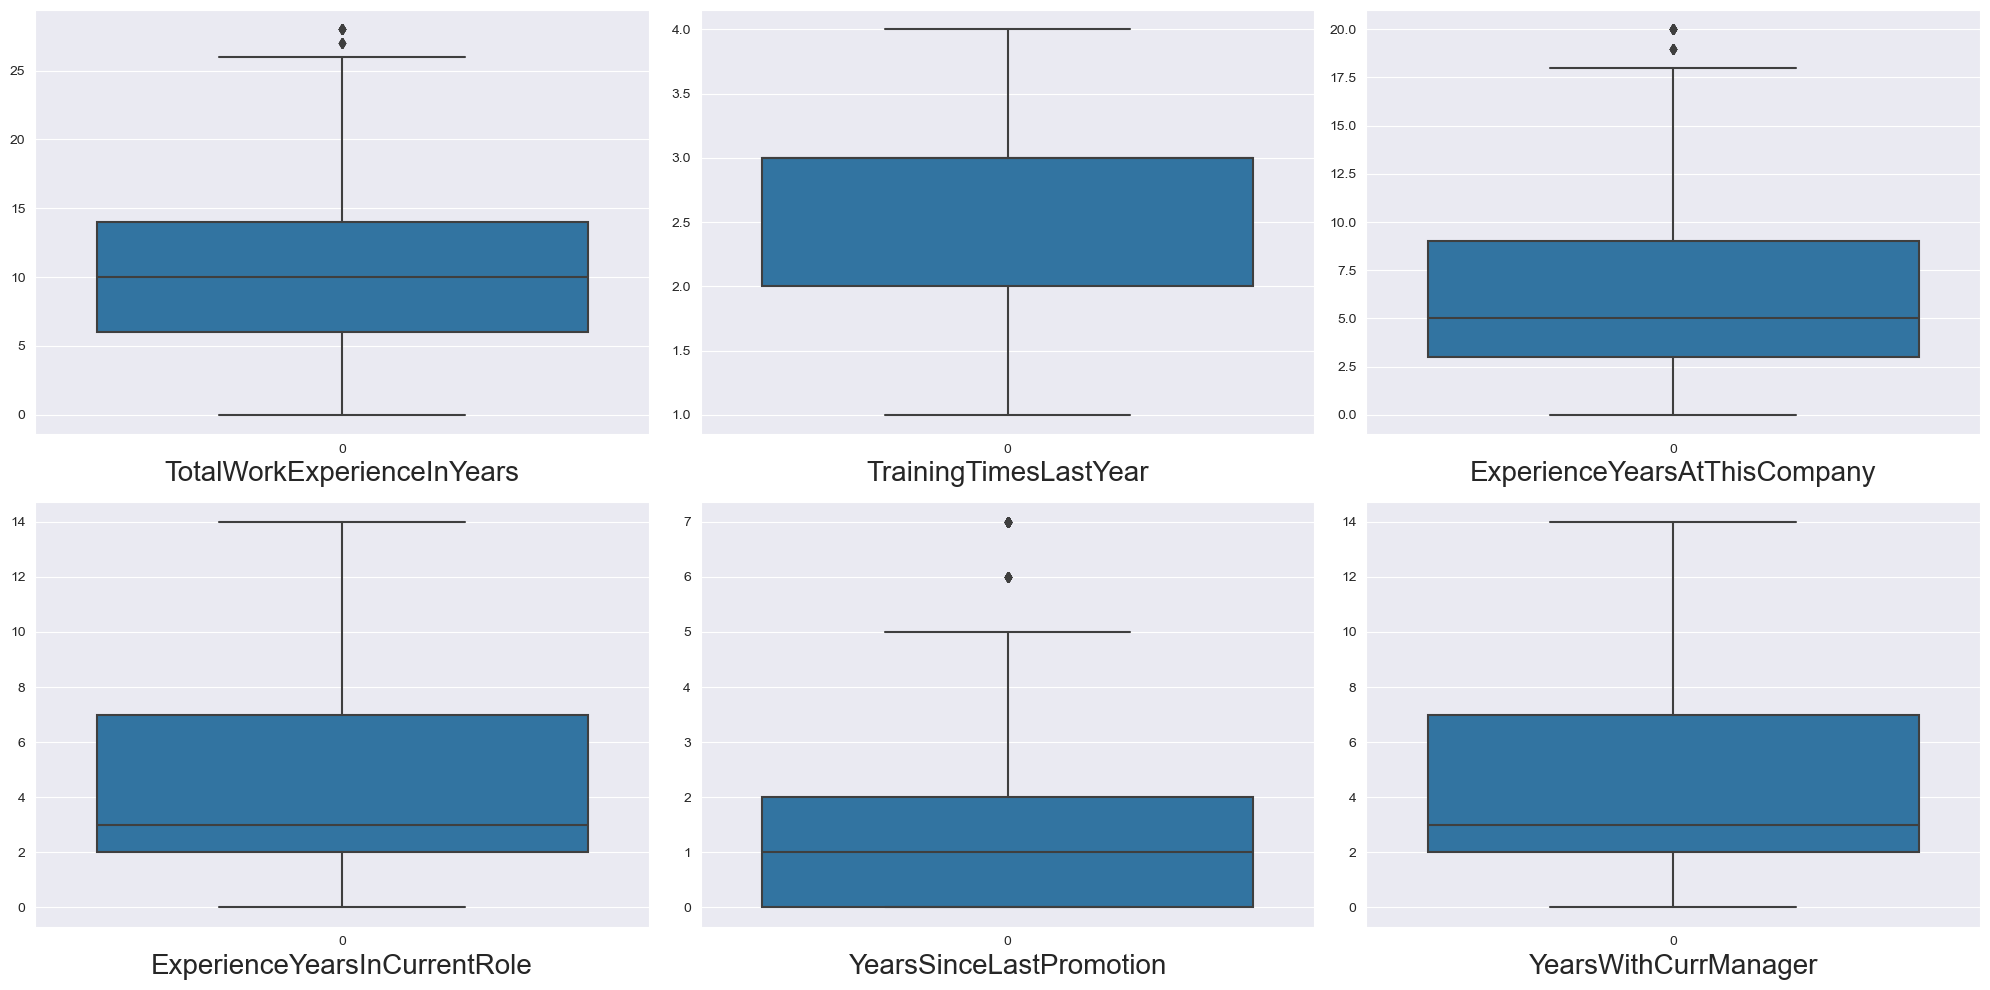

In [49]:
out = data[['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10))
plotno = 1

for column in out:
    if plotno<=7:
        plt.subplot(2,3,plotno)
        sns.boxplot(out[column])
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()

no outliers

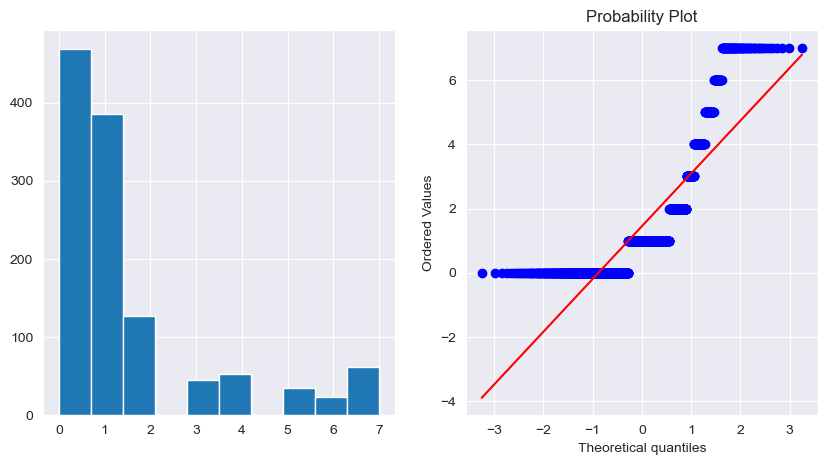

In [50]:
# Function to plot a Q-Q plot
def plot_data(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

plot_data(data,'YearsSinceLastPromotion')

#### Square root transformation

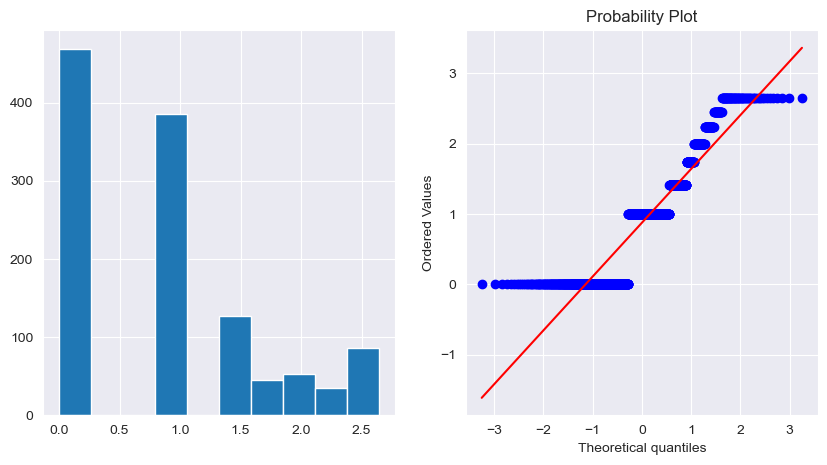

In [51]:
data['square_YearsSinceLastPromotion'] = data['YearsSinceLastPromotion']**(1/2)

plot_data(data,'square_YearsSinceLastPromotion')

In [52]:
scalar = StandardScaler()

data[['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 
      'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsWithCurrManager', 
      'square_YearsSinceLastPromotion']]=scalar.fit_transform(data[['Age','DistanceFromHome','EmpHourlyRate',
                                                                    'EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
                                                                    'TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                                                                    'ExperienceYearsInCurrentRole','YearsWithCurrManager',
                                                                    'square_YearsSinceLastPromotion']])

data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,E1001000,-0.541458,1,3,1,5,18,2,0.102061,3,4,-0.543569,3,2,4,1,1,-0.889111,4,-0.058535,-0.879579,2,0.868276,0.864098,0,1.202103,1,3,-1.057559
1,E1001006,1.109888,1,3,1,5,18,2,0.591464,4,4,-1.187042,3,2,1,2,1,-0.889111,4,1.512870,-0.879579,3,0.200371,0.864098,1,0.902825,1,3,0.151501
2,E1001007,0.339260,1,5,2,5,18,1,-0.509693,4,4,-0.890055,2,3,1,5,0,1.594054,3,1.512870,-0.879579,3,2.649355,2.661702,1,2.399219,1,4,0.151501
3,E1001009,0.449349,1,0,0,2,11,2,0.102061,4,2,0.347393,2,5,4,3,1,-0.061389,2,1.984292,-0.879579,2,-0.244898,0.564498,1,0.603546,1,3,0.151501
4,E1001010,2.541054,1,3,1,5,18,2,0.836165,4,1,0.891870,3,2,1,8,1,-0.337297,4,-0.058535,-2.303999,3,-0.912803,-0.633905,2,-0.593570,1,3,0.652311


### Feature Selection

#### Drop unique and contant features

In [53]:
data.drop(['EmpNumber', 'YearsSinceLastPromotion'], axis=1, inplace=True)

#### Checking corelation

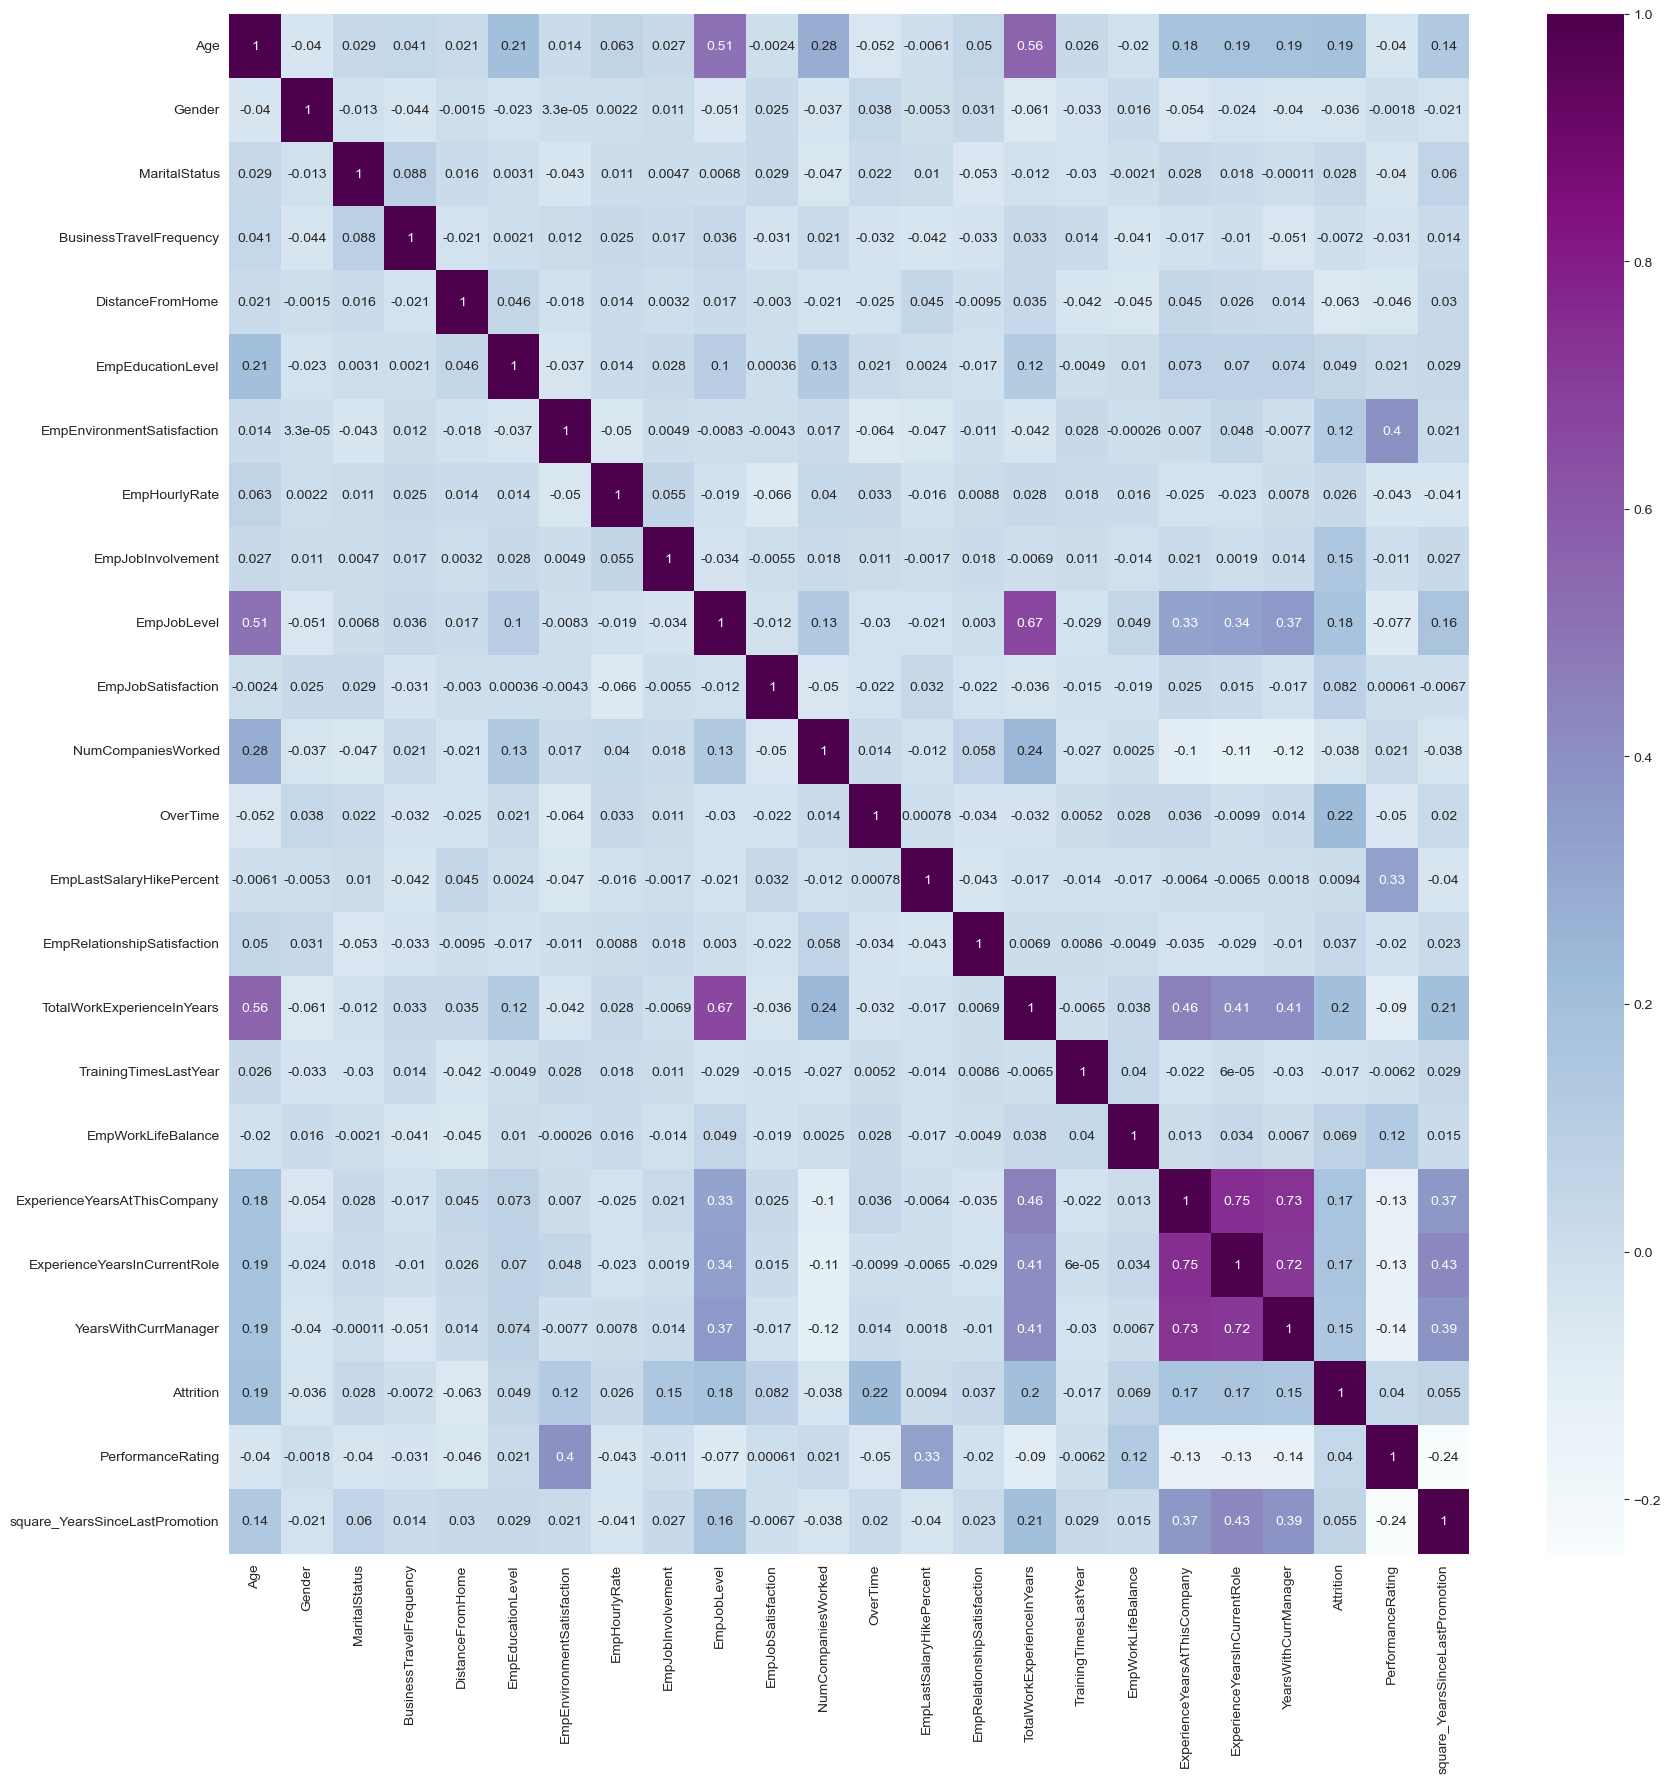

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap='BuPu')
plt.show()

In [55]:
# To get highly corelated feature
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9]
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


Their is no highly correlated feature is present

#### Checking duplicates

In [56]:
data.duplicated().sum()

0

#### Principle component analysis

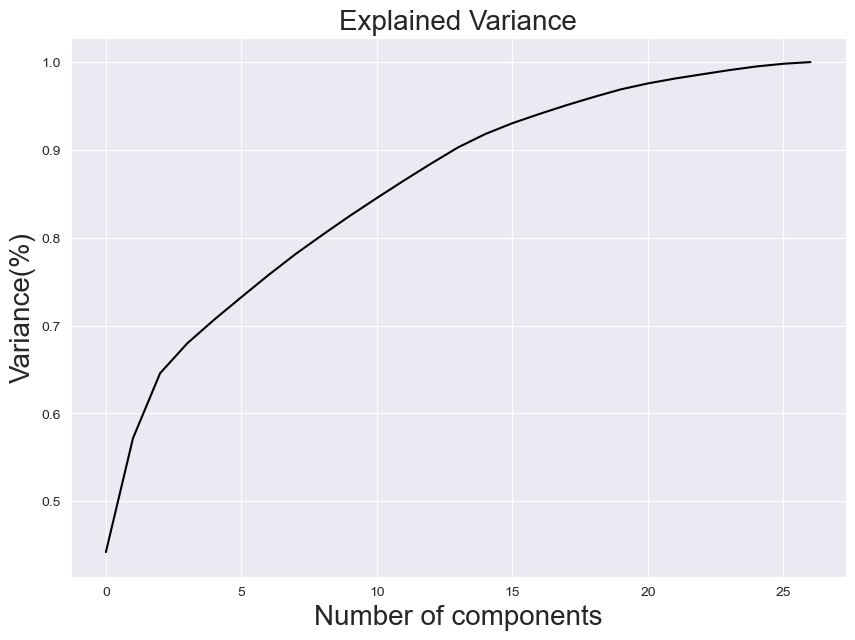

In [57]:
pca = PCA()

principlecomponent = pca.fit_transform(data)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k')
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Variance(%)', fontsize=20)
plt.title('Explained Variance', fontsize=20)
plt.show()

**Observation:** 
This data contain total 27 feature after dropping unique and constant column,from above PCA it shows the 25 feature has less varaince loss, so we are going to select 25 feature.

In [58]:
pca = PCA(n_components=25)
new_data = pca.fit_transform(data)
new_data

array([[-4.47979357e+00, -1.62579961e+00,  1.04815246e+00, ...,
        -5.02890736e-01,  2.28337153e-01, -3.52744289e-01],
       [-4.35607380e+00, -6.82890846e-02,  2.01617388e+00, ...,
        -8.88367129e-01, -2.37235986e-01, -7.10042471e-01],
       [-4.24318059e+00,  2.56096162e+00,  4.36307191e+00, ...,
        -4.34724440e-01, -3.56723825e-01,  6.46996038e-01],
       ...,
       [ 1.64245087e+00, -1.73309807e+00,  3.13585566e+00, ...,
        -1.70950647e-01,  3.39096853e-01,  1.12605457e+00],
       [ 9.10590984e+00, -2.09875367e+00,  1.48314921e+00, ...,
         6.10226389e-01,  1.08399769e-02, -2.99560396e-01],
       [-4.36428097e+00,  5.98213577e+00, -2.10105411e+00, ...,
         6.48347080e-01, -7.17937795e-03, -2.95697975e-02]])

#### Creating new dataframe

In [59]:
principle_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                                                   'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20',
                                                   'pca21','pca22','pca23','pca24','pca25'])

principle_df['PerformanceRating']=data['PerformanceRating']

principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744,3
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042,3
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996,4
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048,3
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894,3


#### Saving pre-process data

In [60]:
principle_df.to_csv('employee_performance_preprocessed_data.csv')

df = pd.read_csv('employee_performance_preprocessed_data.csv')

df.head()

,Unnamed: 0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744,3
1,1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042,3
2,2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996,4
3,3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048,3
4,4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894,3


### Creating model and evaluate summary

### Loading pre-processed data

In [61]:
data = pd.read_csv('employee_performance_preprocessed_data.csv')
pd.set_option('display.max_columns', None)
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744,3
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042,3
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996,4
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048,3
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894,3


### Defining independent and dependent features

In [62]:
X = data.iloc[:,:-1]
y = data['PerformanceRating']

In [63]:
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894


In [64]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

### Balancing the target feature

In [65]:
sm = SMOTE()
print("unbalanced data: ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data: ",Counter(y_sm))

unbalanced data:  Counter({3: 874, 2: 194, 4: 132})
balanced data:  Counter({3: 874, 4: 874, 2: 874})


### Spliting training and testing data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=42, test_size=0.20)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2097, 25), (525, 25), (2097,), (525,))

### Creating model, prediction and evaluation

#### 1. Support Vactor Machine

In [68]:
svc = SVC()

svc.fit(X_train, y_train)

svc_train_predict = svc.predict(X_train)

svc_test_predict = svc.predict(X_test)

#### Training accuracy

In [69]:
svc_train_accuracy = accuracy_score(svc_train_predict, y_train)
print("Training accuracy of support vector classifier model", svc_train_accuracy*100)
print("support vector classifier Classification report: \n", classification_report(svc_train_predict, y_train))

Training accuracy of support vector classifier model 96.6142107773009
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.99      0.94      0.97       727
           3       0.92      0.98      0.95       654
           4       0.99      0.97      0.98       716

    accuracy                           0.97      2097
   macro avg       0.97      0.97      0.97      2097
weighted avg       0.97      0.97      0.97      2097



#### Testing accuracy

In [70]:
svc_test_accuracy = accuracy_score(svc_test_predict, y_test)
print("Testing accuracy of support vector classifier model", svc_test_accuracy*100)
print("Prcision Score:", precision_score(svc_test_predict, y_test, average='weighted')*100)
print("support vector classifier Classification report: \n", classification_report(svc_test_predict, y_test))

Testing accuracy of support vector classifier model 94.66666666666667
Prcision Score: 95.15217020878887
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.99      0.93      0.96       196
           3       0.86      0.97      0.91       153
           4       0.99      0.94      0.97       176

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



In [71]:
pd.crosstab(svc_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,182,14,0
3,2,149,2
4,0,10,166


#### 2. Random forest

In [72]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train,y_train)

rf_test_predict = rf.predict(X_test)

rf_train_predict = rf.predict(X_train)

#### Training accuracy

In [73]:
rf_train_accuracy = accuracy_score(rf_train_predict, y_train)
print("Training accuracy of random forest", rf_train_accuracy)
print("Classification report of training: \n", classification_report(rf_train_predict, y_train))

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       701
           4       1.00      1.00      1.00       706

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



#### Testing accuracy

In [74]:
rf_test_accuracy = accuracy_score(rf_test_predict, y_test)
print("Testing accuracy of random forest", rf_test_accuracy*100)
print("Precision Score:", precision_score(rf_test_predict, y_test, average='weighted')*100)
print("Classification report of testing: \n", classification_report(rf_test_predict, y_test))

Testing accuracy of random forest 95.61904761904762
Precision Score: 95.77404502891883
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.99      0.94      0.97       194
           3       0.91      0.96      0.93       164
           4       0.96      0.97      0.97       167

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



#### Tunning hyper parameter with Randomized Search CV

In [75]:
n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)]
max_features = ['sqrt','log2',None]
max_depth    = [int(x) for x in np.linspace(10,100,num=11)]
max_depth.append(None)
min_samples_split = [2,3,5,8]
min_samples_leaf  = [1,2,3,4]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1', param_distributions=random_grid,
                           n_iter=10, cv=2, verbose=2, random_state=1, n_jobs=-1)

rf_cv.fit(X_train,y_train)

rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameter: {'n_estimators': 1577, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 100}


In [76]:
rf_clf1 = RandomForestClassifier(**rf_best_params)

rf_clf1.fit(X_train,y_train)

rf_clf1_predict = rf_clf1.predict(X_test)

#### Tunning hyper parameter after test accuracy

In [77]:
rf_accuracy = accuracy_score(rf_clf1_predict, y_test)
print("Accuracy after hyperparameter tunning", rf_accuracy*100)
print("Classification report: \n", classification_report(rf_clf1_predict, y_test))

Accuracy after hyperparameter tunning 91.80952380952381
Classification report: 
               precision    recall  f1-score   support

           2       0.96      0.91      0.93       193
           3       0.86      0.90      0.88       164
           4       0.94      0.94      0.94       168

    accuracy                           0.92       525
   macro avg       0.92      0.92      0.92       525
weighted avg       0.92      0.92      0.92       525



In [78]:
pd.crosstab(rf_clf1_predict, y_test)

PerformanceRating,2,3,4
row_0,,,
2,176,15,2
3,8,148,8
4,0,10,158


### 3. Artificial Neural Network(MLP Classifier)

In [79]:
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)

In [80]:
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

In [81]:
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[1.39365436e-05, 9.99985047e-01, 1.01647724e-06],
       [8.06766774e-06, 9.99980330e-01, 1.16027771e-05],
       [9.93157956e-01, 6.83931143e-03, 2.73291970e-06],
       ...,
       [9.61393092e-01, 3.85907854e-02, 1.61229728e-05],
       [9.67699387e-01, 3.19756169e-02, 3.24996020e-04],
       [1.40902946e-17, 4.17692100e-08, 9.99999958e-01]])

In [82]:
mlp_test_predict = model.predict(X_test)

mlp_train_predict = model.predict(X_train)

#### Training accuracy

In [83]:
mlp_train_accuracy = accuracy_score(mlp_train_predict, y_train)
print("Training accuracy of MLP model is:", mlp_train_accuracy*100)
print("Classification report of training:"'\n', classification_report(mlp_train_predict, y_train))

Training accuracy of MLP model is: 99.28469241773963
Classification report of training:
               precision    recall  f1-score   support

           2       1.00      0.98      0.99       705
           3       0.98      1.00      0.99       686
           4       1.00      1.00      1.00       706

    accuracy                           0.99      2097
   macro avg       0.99      0.99      0.99      2097
weighted avg       0.99      0.99      0.99      2097



#### Testing accuracy

In [84]:
mlp_test_accuracy = accuracy_score(mlp_test_predict, y_test)
print("Testing accuracy of MLP model is:", mlp_test_accuracy*100)
print("Precision Score:", precision_score(mlp_test_predict, y_test, average='weighted')*100)
print("Classification report of testing:"'\n', classification_report(mlp_test_predict, y_test))

Testing accuracy of MLP model is: 96.38095238095238
Precision Score: 96.59147856176902
Classification report of testing:
               precision    recall  f1-score   support

           2       0.99      0.97      0.98       188
           3       0.91      0.98      0.94       160
           4       0.99      0.94      0.97       177

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.97      0.96      0.96       525



#### Confusion matrix

In [85]:
pd.crosstab(mlp_test_predict, y_test)

PerformanceRating,2,3,4
row_0,,,
2,182,6,0
3,2,157,1
4,0,10,167


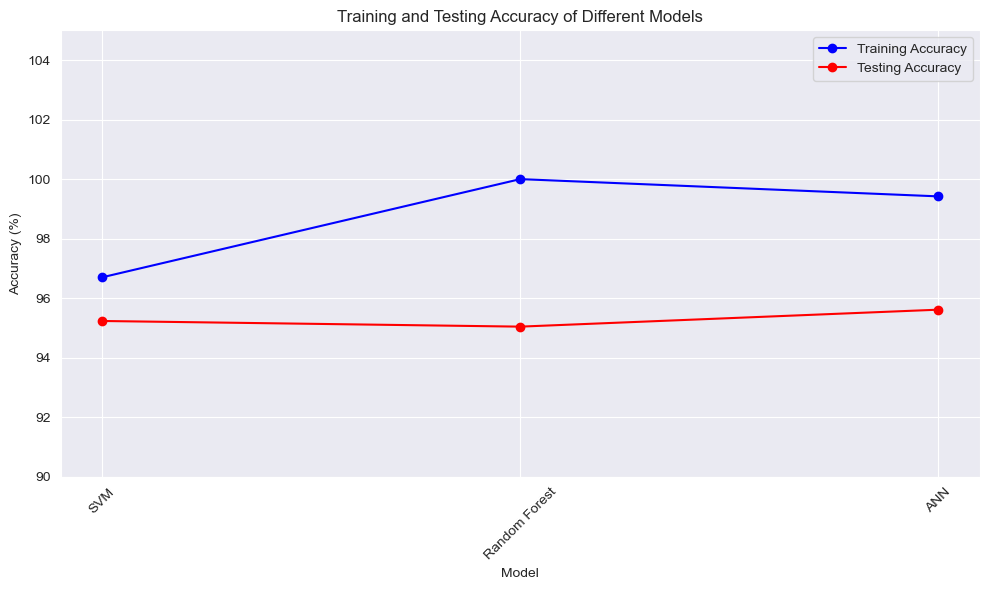

In [86]:
models = ['SVM', 'Random Forest', 'ANN']

training_accuracies = [96.70, 100, 99.42]

testing_accuracies = [95.23, 95.04, 95.61]

plt.figure(figsize=(10, 6))

plt.plot(models, training_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')

plt.plot(models, testing_accuracies, marker='o', linestyle='-', color='r', label='Testing Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy of Different Models')
plt.ylim(90, 105)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusion:**

1. Support Vector Machine:
   * Training Accuracy: 96.61%
   * Testing Accuracy: 95.15%
2. Random Forest:
   * Training Accuracy: 100%
   * Testing Accuracy: 91.80% (decreased after hyperparameter tuning)
3. Artificial Neural Network (Multilayer Perceptron):
   * Training Accuracy: 99.28%
   * Testing Accuracy: 96.38%

In [88]:
file = open('mlp_classifier_model.pkl', 'wb')
pickle.dump(model, file)

### Reading data for visualisation

In [91]:
data = pd.read_csv('Employee_Performance.csv')
pd.set_option('display.max_columns',None)
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


###  Exploratary Data Analysis

#### Domain analysis

First we understand the meaning of features and checking the impact of input feature to dependent feature

**1. EmpNumber:** An Employee ID, sometimes referred to as an Employee Number or Employee Code, is a unique number that has been assigned to each individual staff member within a company.
 
**2. Age:** Age of employee in years

**3. Gender:** Gender of employee [Male/Feamale]

**4. EducationBackground:** This will be a high school diploma or a post-secondary degree of a employee

**5. MaritalStatus:** Civil status, or marital status, are the distinct options that describe a person's relationship with a significant other

**6.EmpDepartment:** Department specifice of employee

**7. EmpJobRole:** Job role means the key responsibility of a job profile or job position. 

**8. BusinessTravelFrequency:** The employee travel for comapny buisness purpose.

**9. DistanceFromHome:** Distance between home to company of employee.

**10. EmpEducationLevel:** Employee Education level means the academic qualification. For example, it could be a diploma, degree, masters or PhD.

**11. EmpEnvironmentSatisfaction:** Satisfied or content employees are with elements like their jobs, their employee experience, and the organizations they work for.

**12. EmpHourlyRate:** Hourly Rate means the amount paid to an employee for each hour worked.

**13. EmpJobInvolvement:** Job involvement refers to a state of psychological identification with work—or the degree to which a job is central to a person's identity. From an organizational perspective, it has been regarded as the key to unlocking employee motivation and increasing productivity.

**14. EmpJobLevel:** Job levels, also known as job grades and classifications, set the responsibility level and expectations.

**15. EmpJobSatisfaction:** Level of contentment employees feel with their job.

**16. NumCompaniesWorked:** Employee work in how many companies.

**17. OverTime:**
Employee work overtime or not. [Yes, No]

**18. EmpLastSalaryHikePercent:** Salary hike percent of employye in last year.

**19. EmpRelationshipSatisfaction:** Healthy relationships may motivate employees and increase morale. When employees cast aside relationship issues, they can focus on work tasks more effectively.

**20. TotalWorkExperienceInYears:**
Total experiance of employee in years.

**21. TrainingTimesLastYear:** Total training done by employee in last year.

**22. EmpWorkLifeBalance:** “Work-life balance” typically means the achievement by employees of equality between time spent working and personal life. A good work-life balance for employees can improve staff motivation, increase staff retention rates, reduce absence, attract new talent, and reduce employee stress.

**23. ExperienceYearsAtThisCompany:**
Total no of eaxperiance at current company.

**24. ExperienceYearsInCurrentRole:** Total no of experiance in current job role.

**25. YearsSinceLastPromotion:**
Total no of year since last promotion of employee.

**26. YearsWithCurrManager:** Employee total no of years with current manager. 

**27. Attrition:** Employee attrition is the naturally occurring, voluntary departure of employees from a company. Employee attrition involves leaving a job for: Personal reasons. Professional motivation.

**28. PerformanceRating:** This is a target feature, tell that the total rating of employee performance in company.


#### Statistical analysis of numerical feature

In [93]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


#### Statistical analysis of categorical feature

In [94]:
data.describe(include='O').T

,count,unique,top,freq
EmpNumber,1200,1200,E1001000,1
Gender,1200,2,Male,725
EducationBackground,1200,6,Life Sciences,492
MaritalStatus,1200,3,Married,548
EmpDepartment,1200,6,Sales,373
EmpJobRole,1200,19,Sales Executive,270
BusinessTravelFrequency,1200,3,Travel_Rarely,846
OverTime,1200,2,No,847
Attrition,1200,2,No,1022


#### Univariate analysis

**1. Age**

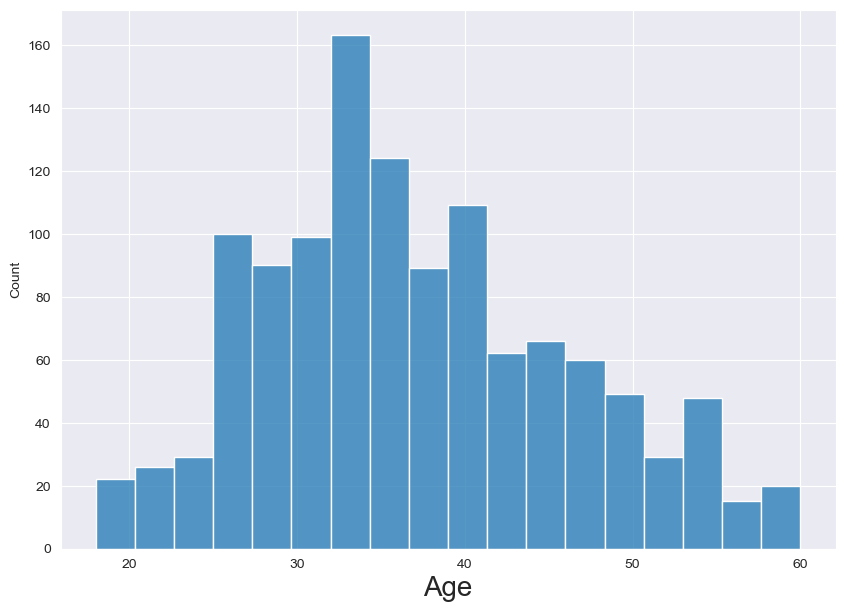

In [95]:
plt.figure(figsize=(10,7))
sns.histplot(x='Age', data=data)
plt.xlabel('Age', fontsize=20)
plt.show()

The majority of employees are between the ages of 25 and 40, with an age range of 18 to 60.

**2. Employee Hourly Rate**

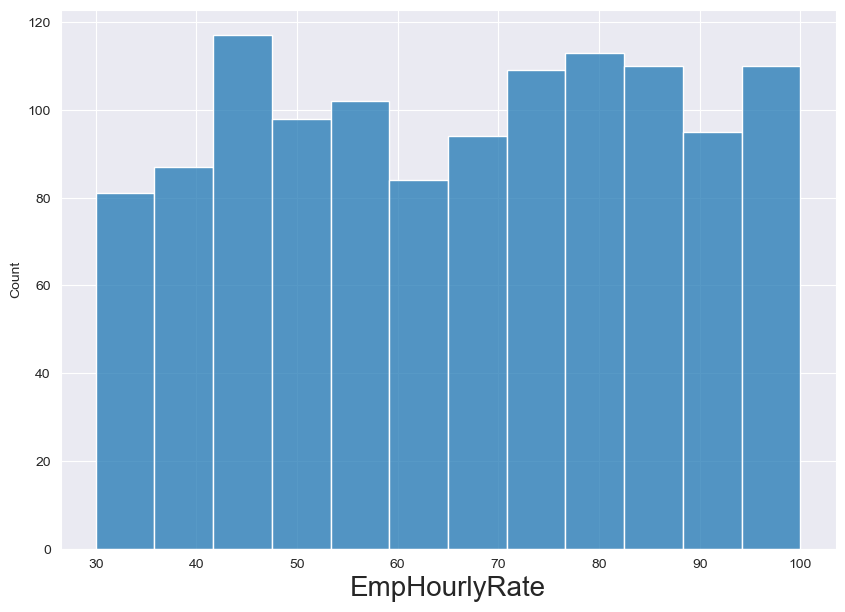

In [96]:
plt.figure(figsize=(10,7))
sns.histplot(x='EmpHourlyRate', data=data)
plt.xlabel('EmpHourlyRate', fontsize=20)
plt.show()

The majority of employee hourly rates, which range from 30 to 100, are 45.

**3. Total Work Experience In Year**

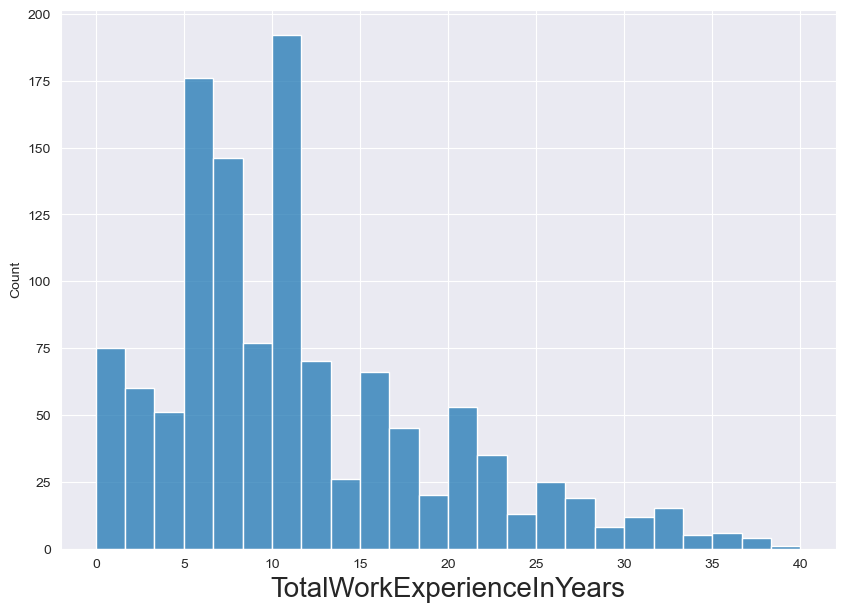

In [97]:
plt.figure(figsize=(10,7))
sns.histplot(x='TotalWorkExperienceInYears', data=data)
plt.xlabel('TotalWorkExperienceInYears', fontsize=20)
plt.show()

The majority of employee experiences fall between the ranges of 5 and 10. Work experience ranges from 0 to 40.

**4. Experience Years At This Company**

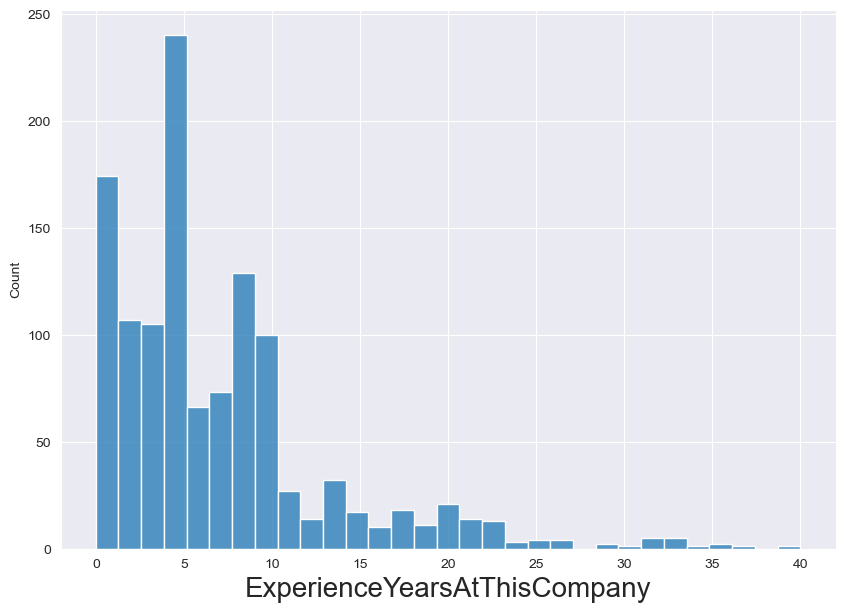

In [98]:
plt.figure(figsize=(10,7))
sns.histplot(x='ExperienceYearsAtThisCompany', data=data)
plt.xlabel('ExperienceYearsAtThisCompany', fontsize=20)
plt.show()

The majority of employees join the company between 0 and 5, with experience ranging from 0 to 40.

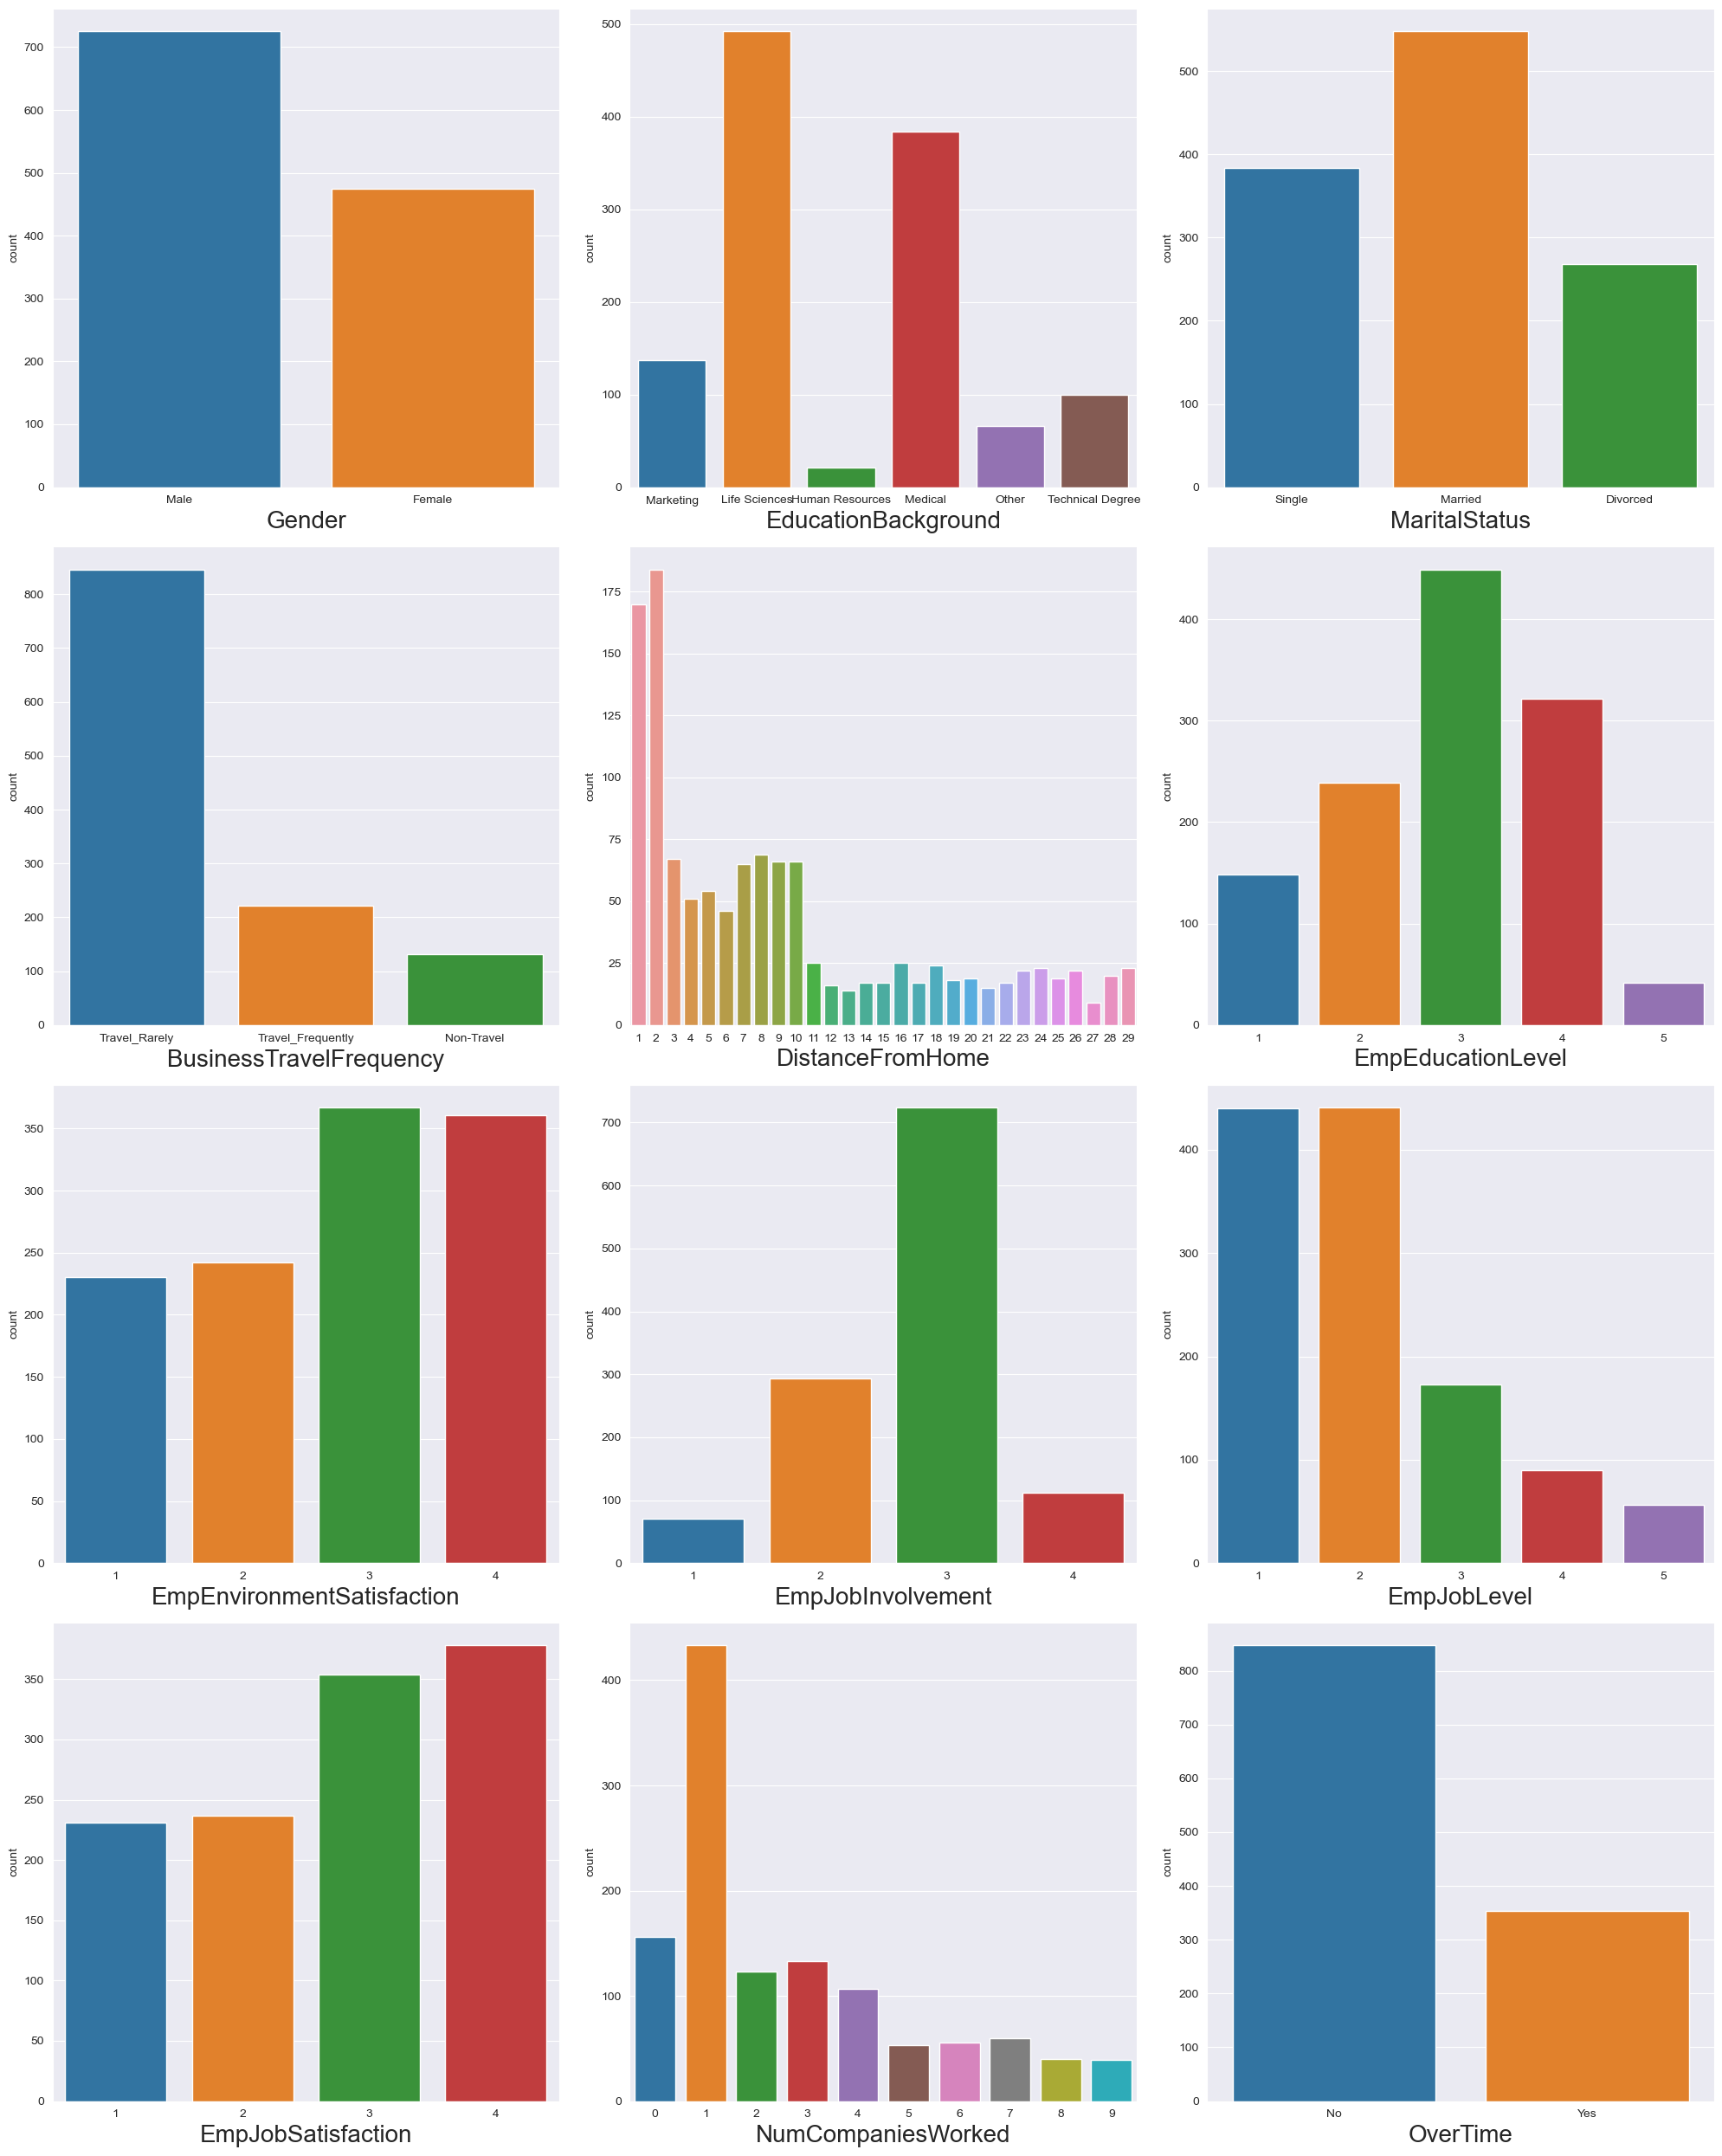

In [99]:
count = data[['Gender', 'EducationBackground', 'MaritalStatus', 'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel', 
              'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime']]

plt.figure(figsize=(20,25))
plotno = 1

for column in count:
    if plotno<=13:
        plt.subplot(4, 3, plotno)
        sns.countplot(x=count[column])
        plt.xlabel(column, fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()

**5. Gender:**
* The majority of the men in the company

**6.Education Background:**
* The majority of the staff members have backgrounds in life sciences and medicine, and more than 100 have marketing education backgrounds.
* Employee with a different educational background is under 100.

**7. MaritalStatus:**
* Less than 400 employees are unmarried, and the majority of employees are married.
* There are fewer than 300 employees who are divorced.

**8. Business Travel Frequency:**
* Less than 220 employees travel frequently, and the maximum number of employees travel infrequently for business purposes.
* Less than 120 employees are still not travelling for work-related reasons.

**9. Distance From Home:**
* There is a range of 1 to 29 miles between home and company.
* There is a maximum of 10 miles between an employee's home and the workplace.

**10. Educational Level:**
* Maximum number of employees with an education level of 3 and 4; total range of educational levels: 1 to 5.
* Less than 250 employees have a level of education of 2, and less than 150 employees have a level of education of 1 and 5.

**11. Employee Environment Satisfaction:**
* Employee satisfaction is primarily between 3 and 4.
* Less than 250 employees, in terms of environmental satisfaction.

**12. Employee Job Involvement:**
* The majority of employees have three jobs, and fewer than 300 employees have two jobs.
* There are fewer than 100 employees left in jobs 1 and 4.

**13. Employee Job Level:**
* The majority of employees have job levels between 1 and 2, with the range spanning from 1 to 5.
* Minimum no of job level is 5, as well as 3 & 4 job level employee is less than 180.

**14. Employee Job Satisfaction:**
* The majority of employee job satisfaction receives scores of three or four, while employee satisfaction with a score of one or two is below 250.

**15. Number Companies Worked:**
* The greatest number of workers for a single company.
* fewer people are employed by more than five companies.

**16. Overtime:**
* Less than 350 employees in the company work overtime, with the majority of employees not doing so.

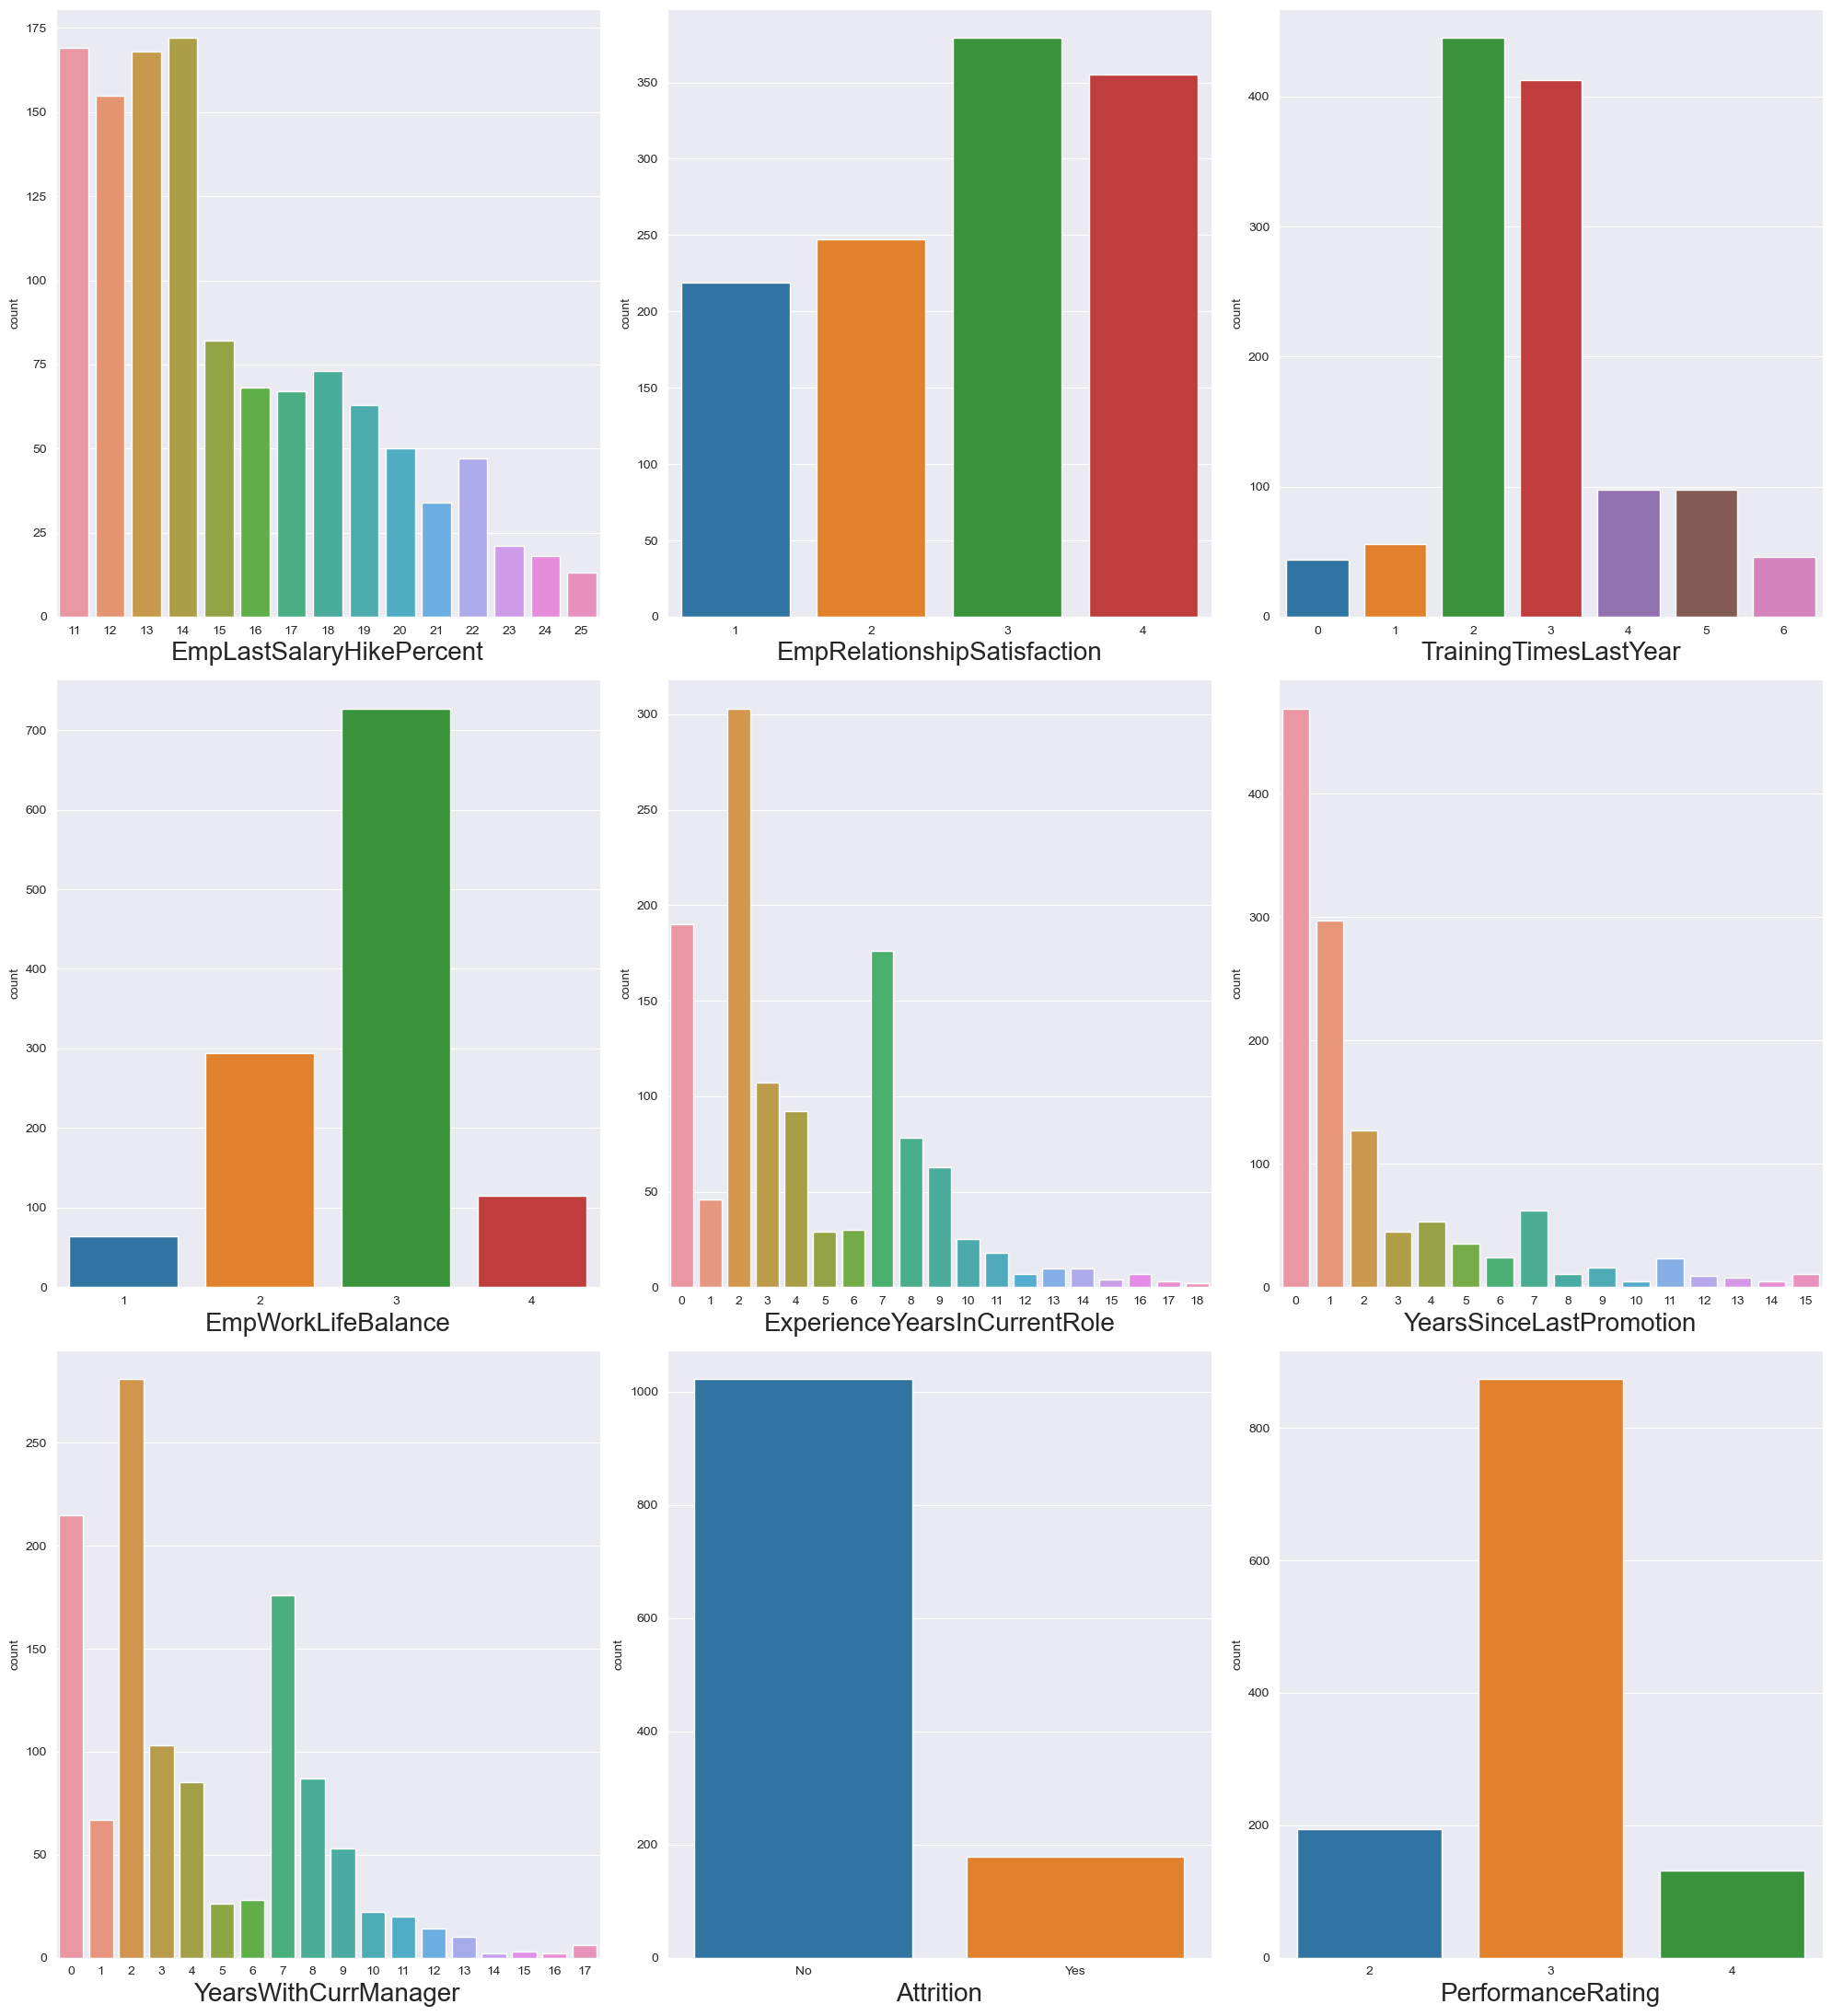

In [100]:
count2 = data[['EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TrainingTimesLastYear', 'EmpWorkLifeBalance',
               'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition', 
               'PerformanceRating']]

plt.figure(figsize=(20,22))
plotno = 1

for column in count2:
    if plotno<=10:
        plt.subplot(3,3,plotno)
        sns.countplot(x=count2[column])
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()

**17. Employee Last Salary Hike Percent:**
* The majority of employee salary increases range from 11 to 14%.Salary hikes range from 11 to 25 in total.
* The last pay increase for fewer than 80 employees was between 15 and 19.

**18. Employee Relationship Satisfaction:**
* Employee relationship satisfaction falls between 1 and 4. The majority of employees have relationship satisfaction between 3 and 4, and fewer than 250 employees have relationship satisfaction between 1 and 2.

**19. Training Times LastYear:**
* The majority of employees completed their second and third training sessions last year, with the remainder of the time being less than 100. The training time ranged from 0 to 6.

**20. Employee Work Life Balance:**
* Less than 300 employees have a work-life balance of 2, whereas the majority have a balance of 3.
* The minimum work-life balance is one, and the work-life balance for employees under 100 is 4.

**21. Experiance In Current Role:**
* The employee's maximum role experience at this time is 18.
* The majority of employees have been in their current roles for two years, and of those seven years, less than 180
* Approximately 200 employees do not currently have role experience.

**22. Years Since Last Promotion:**
* The years since the last promotion range from 0 to 15.
* Less than 300 employees received promotions after at least a year of service, making up the majority of the workforce.

**23. Years With Current Manager:**
* The majority of employees have been under their current manager for two years, and at least sixteen years.
* Less than 180 employees and those in the range of 0 to 17 have worked with the current manager for seven years.

**24. Attrition:**
* Less than 200 employees are expected to leave the company, and the maximum number of employees who have not left is still there.

**25. Target Feature = Performance Rating:**
* Most employees have a performance rating of 3, and fewer have a rating of 4. The performance rating range is 2 to 4.
* fewer than 200 employees have two ratings for performance.

**26. Employee Department**

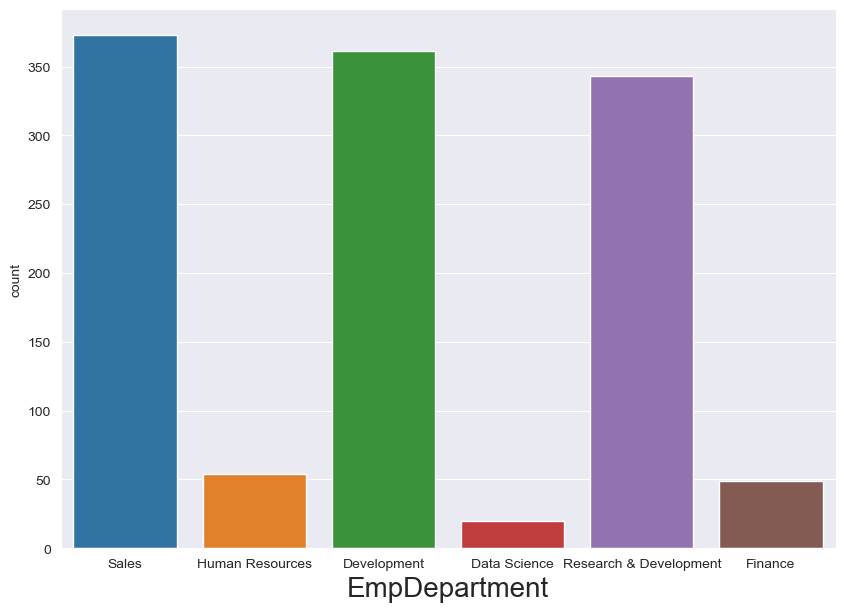

In [101]:
plt.figure(figsize=(10,7))
sns.countplot(x='EmpDepartment', data=data)
plt.xlabel('EmpDepartment', fontsize=20)
plt.show()

* Less than 320 people make up the majority of the sales, development, and research and development departments' workforce.
* Employees in the finance and human resources departments are nearly equal.
* Each data science employee in the company has a minimum.

**27. Employee Job Role**

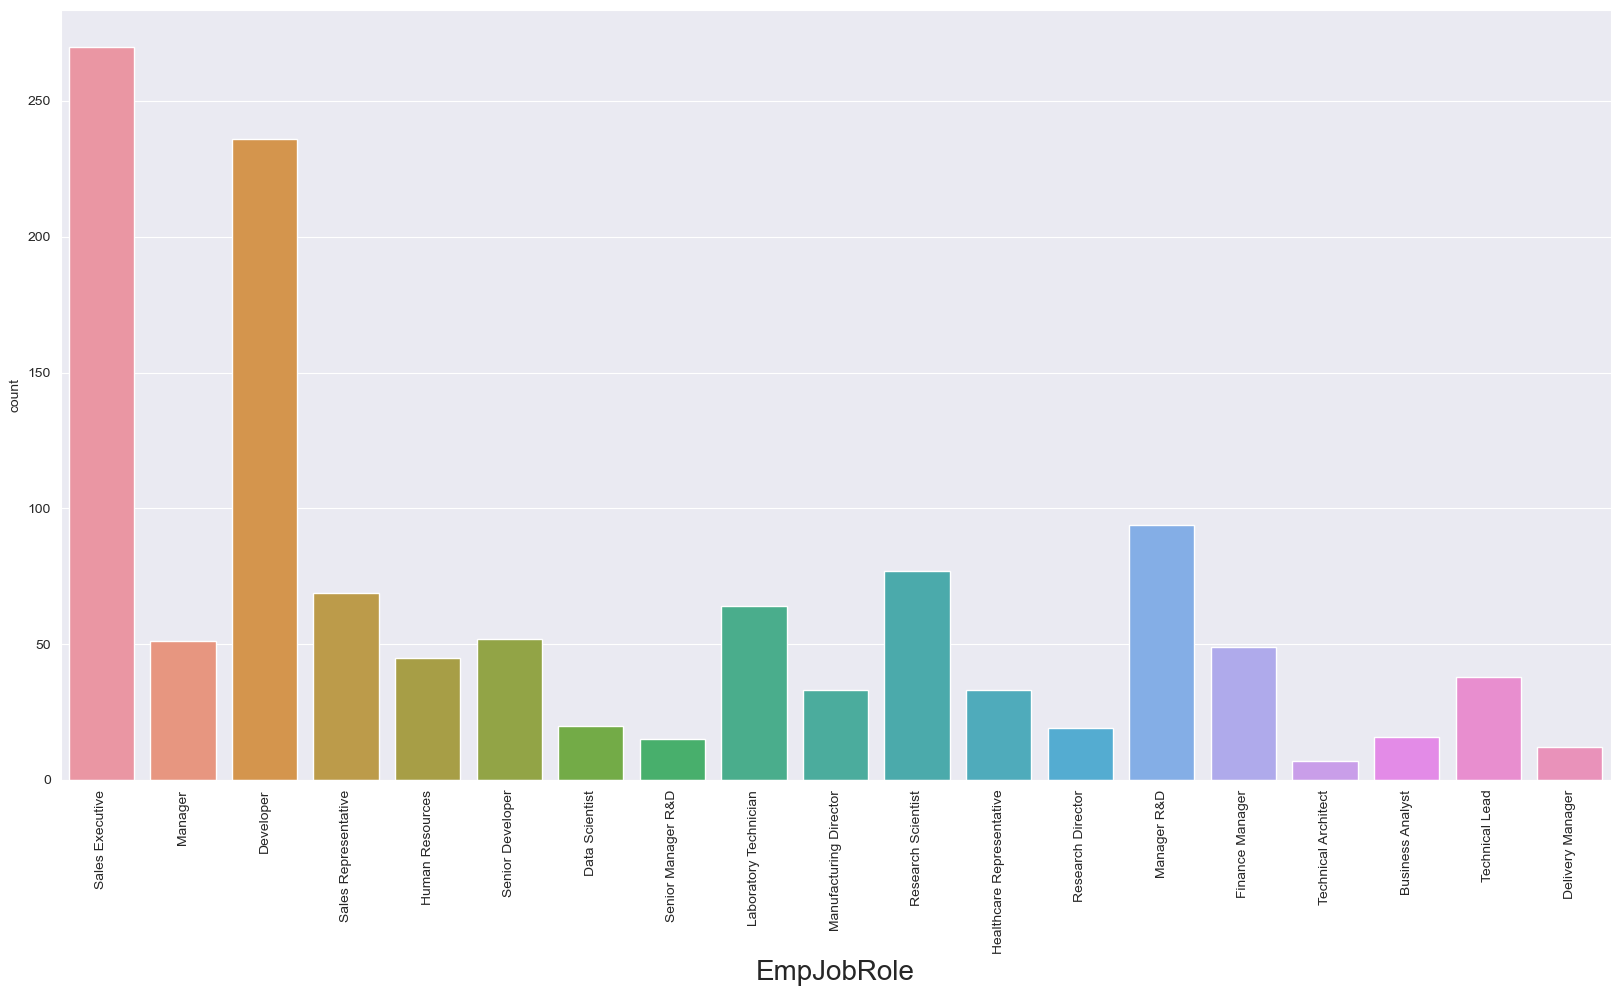

In [102]:
plt.figure(figsize=(20,10))
sns.countplot(x='EmpJobRole', data=data)
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole', fontsize=20)
plt.show()

* There are 230 employees in the developer job role and a maximum of sales executives in the role.
* Less than 100 employees work in management and research, and the remaining employees in all job roles are under 65.

#### BIAVARIATE ANALYSIS

Analysis on continuous feature

**1. Relation between Age & Experience Years at this Company**

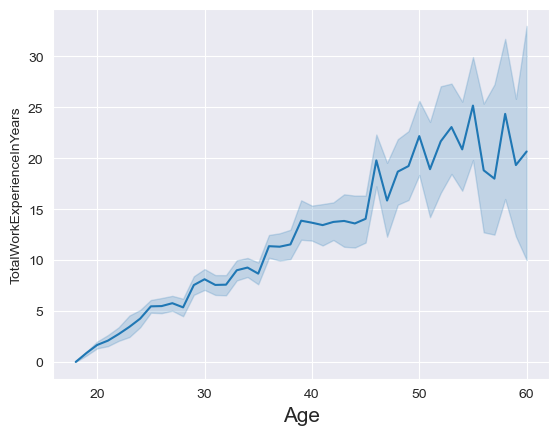

In [103]:
sns.lineplot(x='Age', y='TotalWorkExperienceInYears', data=data)
plt.xlabel('Age', fontsize=15)
plt.show()

* The total years of experience is less than five years if the age range is 18 to 25.
* Age increases are correlated with an increase in time experience.

**2. Relation between Experiance Year at this Company & Total Work Experiance**

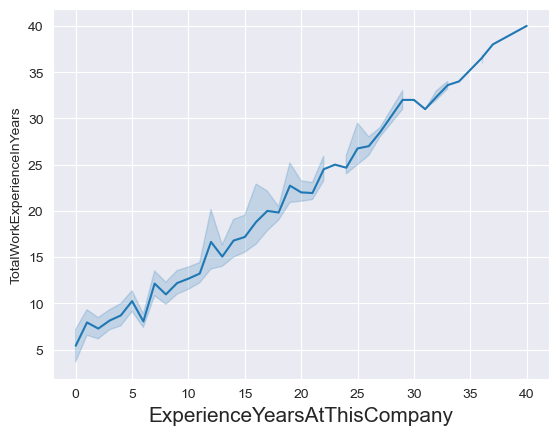

In [104]:
sns.lineplot(x='ExperienceYearsAtThisCompany', y='TotalWorkExperienceInYears', data=data)
plt.xlabel('ExperienceYearsAtThisCompany', fontsize=15)
plt.show()

* If he stays with this company for a year, his overall work experience will also increase.

**3. Relation between Employee Last Salary Hike and Number of Company Worked**

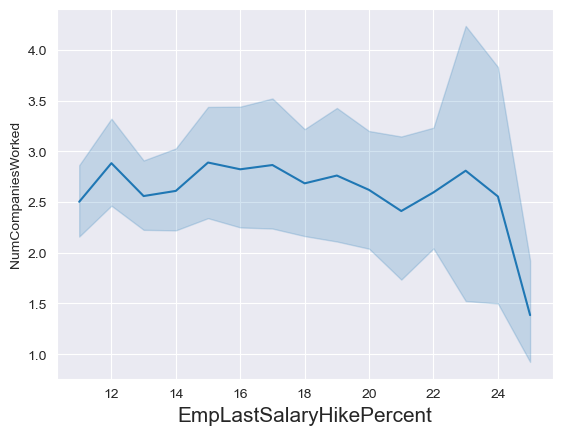

In [105]:
sns.lineplot(x='EmpLastSalaryHikePercent', y='NumCompaniesWorked', data=data)
plt.xlabel('EmpLastSalaryHikePercent', fontsize=15)
plt.show()

* When an employee last received a pay rise, the percentage increased whether they worked for one or two companies.

**4. Relation between Years Since Last Promotion and Experience Years in CurrentRole**

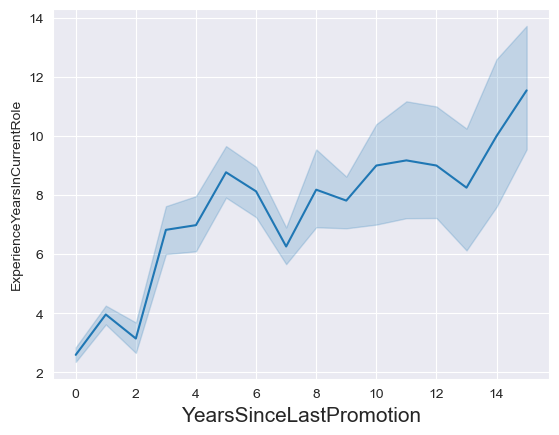

In [106]:
sns.lineplot(x='YearsSinceLastPromotion', y='ExperienceYearsInCurrentRole', data=data)
plt.xlabel('YearsSinceLastPromotion', fontsize=15)
plt.show()

* The above plot makes it evident that the employee has gained more experience in their current role each year since their last promotion.

**5. Relation between Employee Hourly Rate and Years With Current Manager**

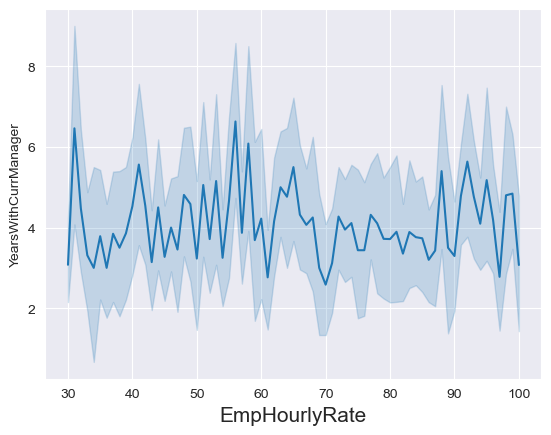

In [107]:
sns.lineplot(x='EmpHourlyRate', y='YearsWithCurrManager', data=data)
plt.xlabel('EmpHourlyRate', fontsize=15)
plt.show()

* The majority of employees have a fixed hourly rate with their current manager; however, some employees have a maximum hourly rate with a shorter tenure.

**6. Relation between Distance From Home and Employee Last Salary Hike Percent**

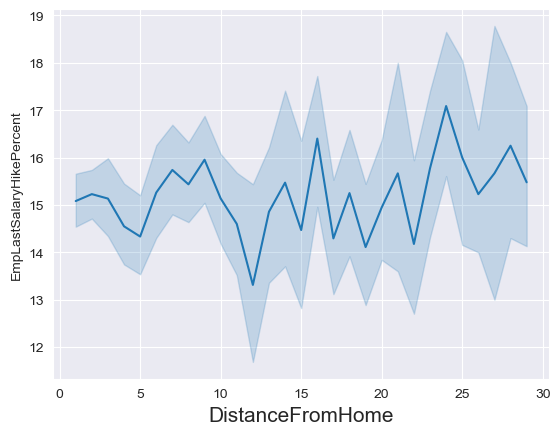

In [108]:
sns.lineplot(x='DistanceFromHome', y='EmpLastSalaryHikePercent', data=data)
plt.xlabel('DistanceFromHome', fontsize=15)
plt.show()

* A greater distance from home results in a marginal increase in the employee's pay.
* employee salary hikes are reduced when the employee's distance from home is between 10 and 13.

#### Analysing Categorical and Discreate Feature

#### Create a new dataframe for categorical features

In [111]:
categorical = []
for column in data.columns:
    if data[column].dtype == object:
        categorical.append(column)
        print(f"{column} : {data[column].unique()}")
        print("=====================================================================================")

EmpNumber : ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Gender : ['Male' 'Female']
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus : ['Single' 'Married' 'Divorced']
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime : ['No' 'Yes']
Attrition : ['No' 'Yes']


In [112]:
categorical

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

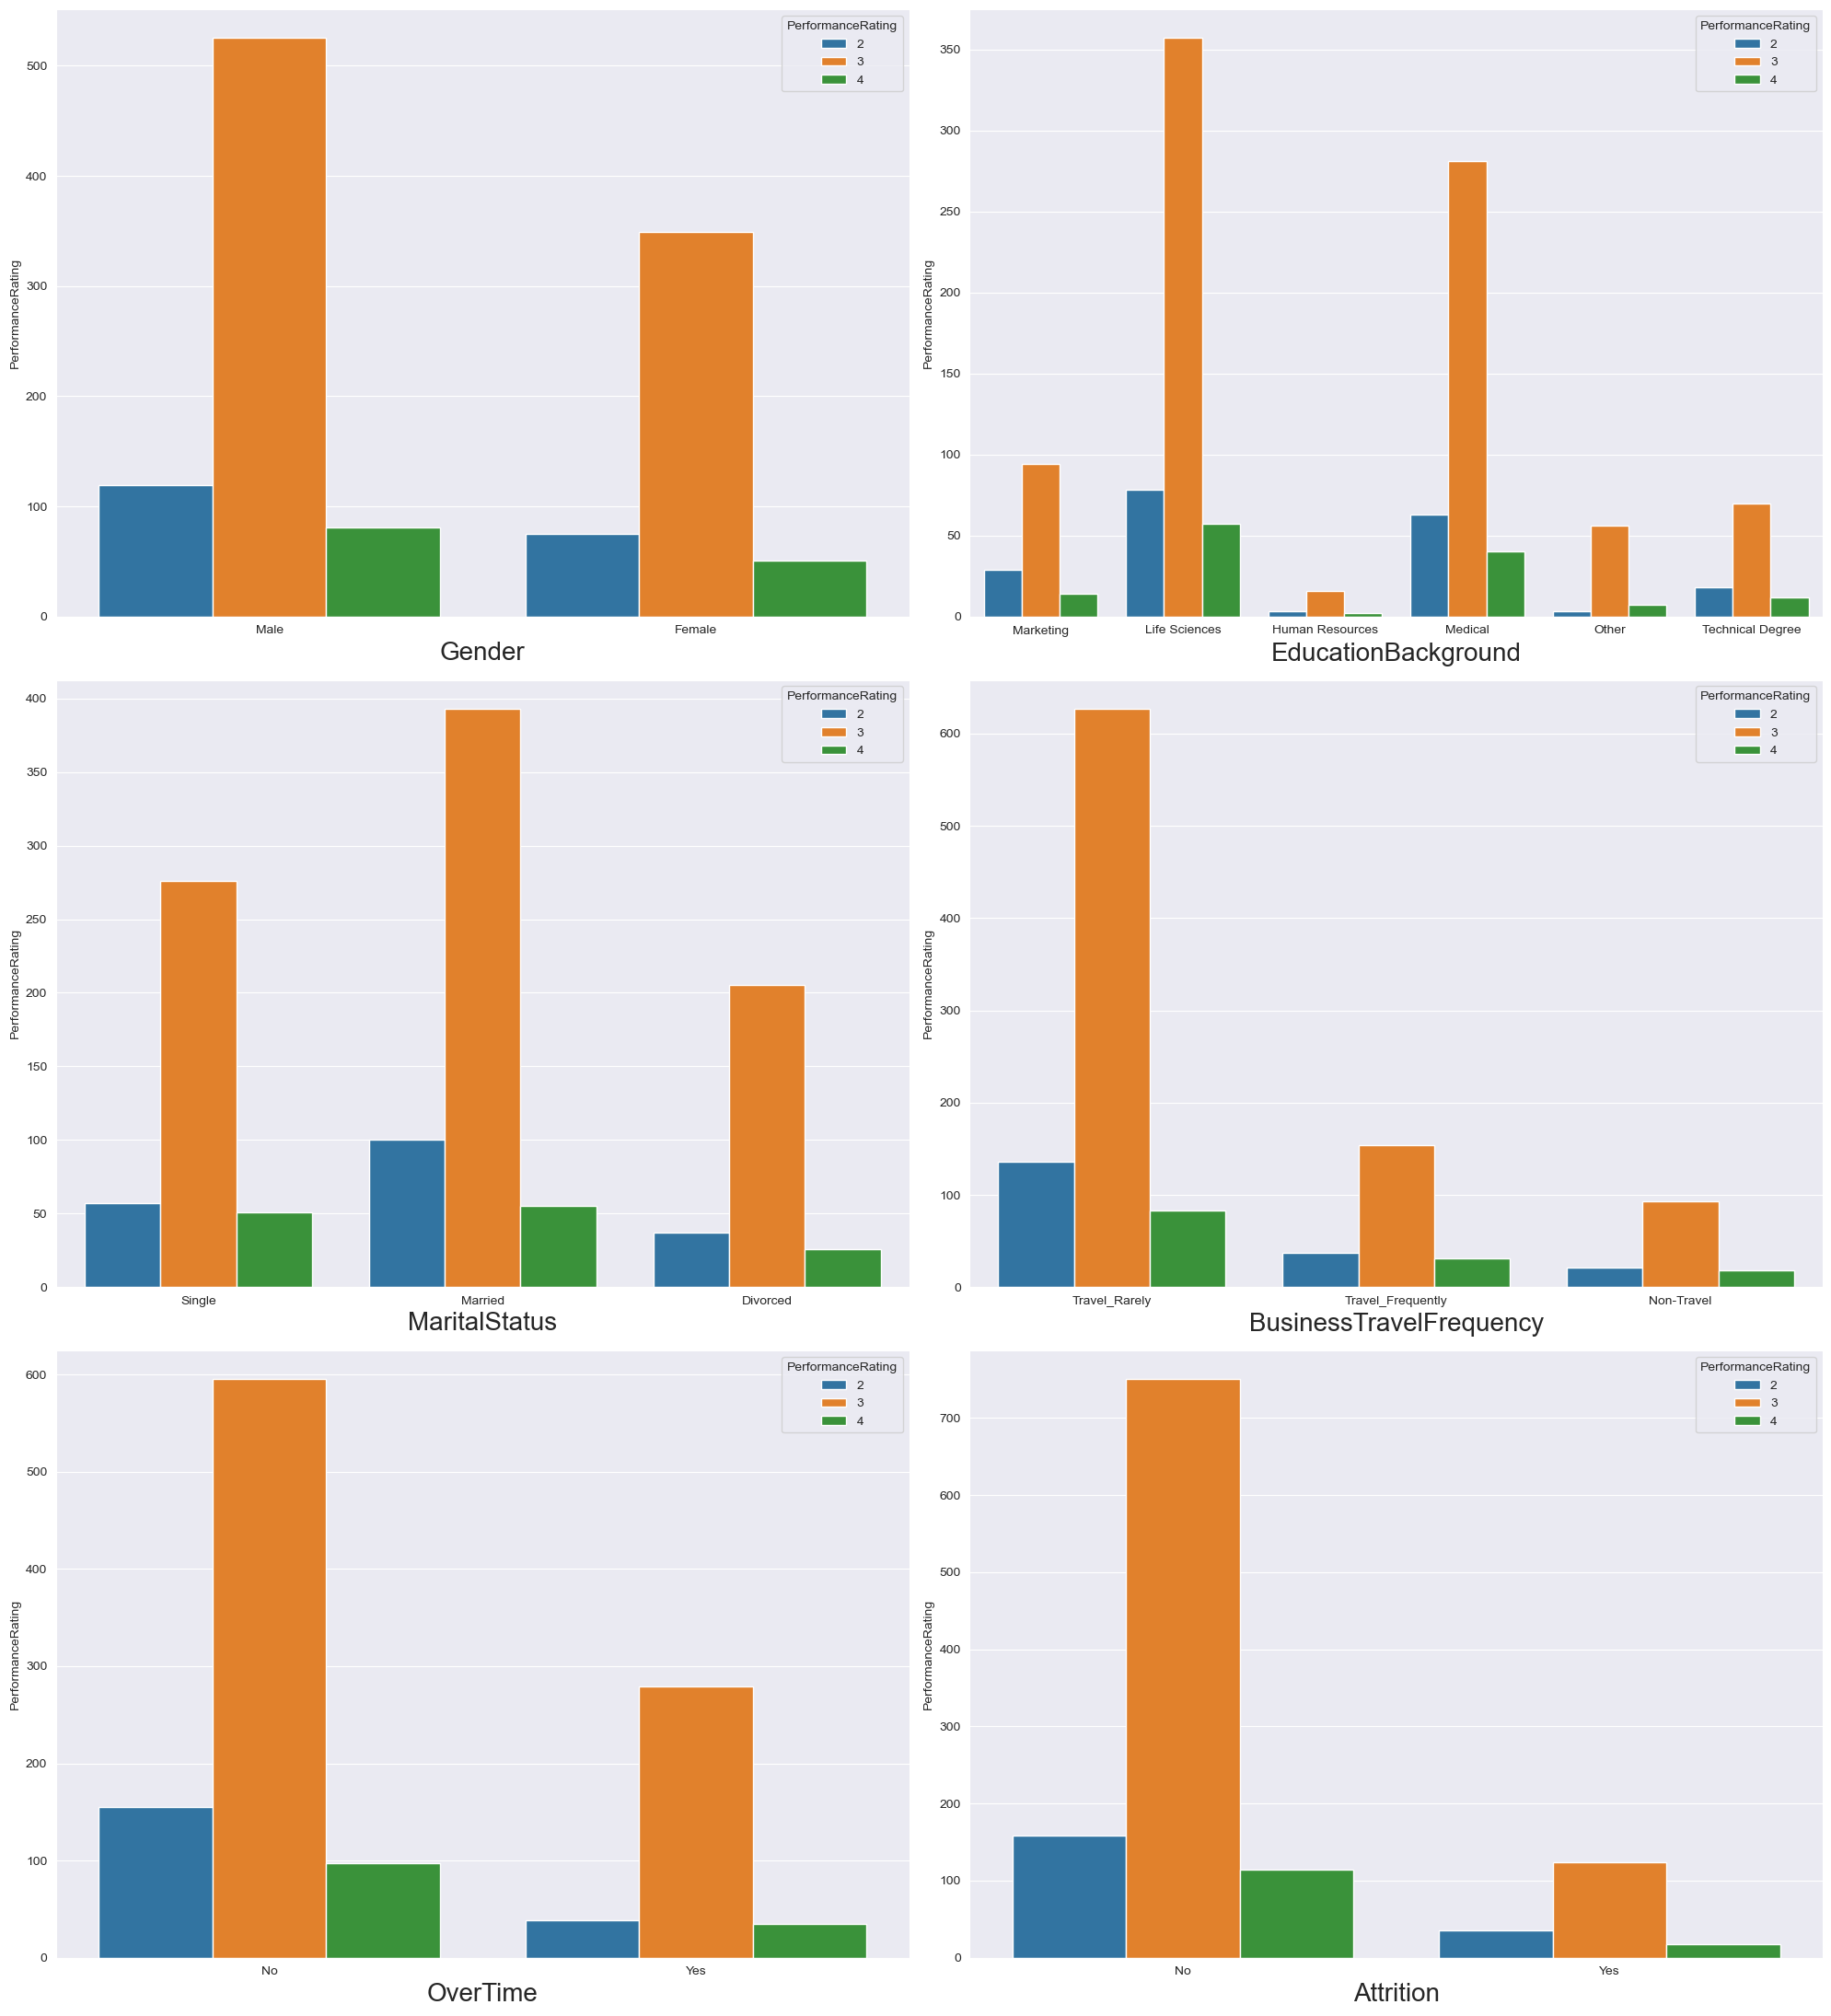

In [113]:
categorical_col = data[['Gender', 'EducationBackground', 'MaritalStatus', 'BusinessTravelFrequency', 'OverTime', 'Attrition']]
plt.figure(figsize=(20,22))
plotno = 1

for column in categorical_col:
    if plotno<=7:
        plt.subplot(3, 2, plotno)
        sns.countplot(x=categorical_col[column], hue=data['PerformanceRating'])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('PerformanceRating')
    plotno+=1
plt.tight_layout()
plt.show()

**7. Relationship between Gender and performance rating**
* The majority of the family members and the maximum number of males were rated with three performance ratings.
* Four performance rating is lower for both males and females.

**8. Relationship between EducationBackground and performance rating**
*  Employee with the highest life sciences and medical education background, rated with a performance rating of three
* The employee has a background in life science and medical education, and they are typically rated with a performance rating of 2 or 4.

**9. Relationship between MaritalStatus and performance rating**
* The majority of employees who are married and those who are single or divorced have performance ratings of three stars most of the time.
* Employee's performance rating in married marital status 2 indicates that they are not single or divorced.

**10. Relationship between Business Travel Frequency and performance rating**
* Maximum amount of travel that an employee is rarely allowed to take.
* These employees who travel frequently were also given ratings of 2, 3, and 4.

**11. Relationship between Overtime and performance rating**
* The highest number of employees who do not work overtime has a performance rating of three.
* Employees who put in extra time during times two and four have constant performance ratings.

**12. Relationship between Attrition and performance rating**
* The majority of employees who received a performance rating of three do not intend to leave the company.
* Employees with a performance rating of three also quit the company.

**13. Relationship between Employee Department and Performance Rating**

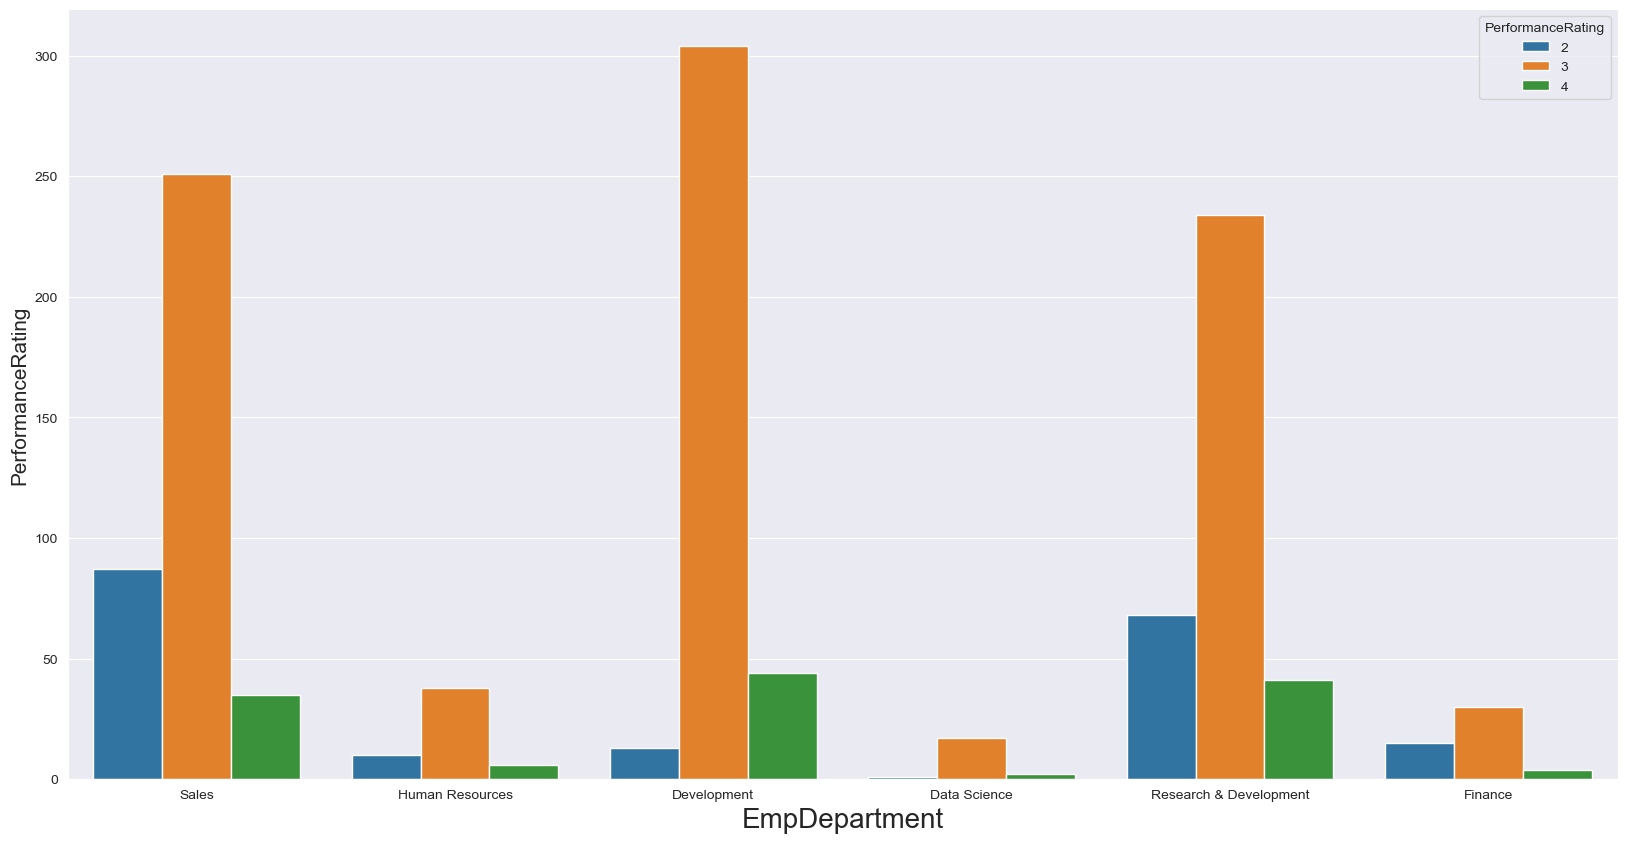

In [114]:
plt.figure(figsize=(20,10))
sns.countplot(x='EmpDepartment', hue=data['PerformanceRating'], data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

* The majority of the staff in the development, sales, and research and development departments have a performance rating of three.
* An employee in the data science department has a low performance rating.
* There are also two performance-rated employees who are usually available in the sales and research and development departments.

**14. Relationship between employee job role and performance rating**

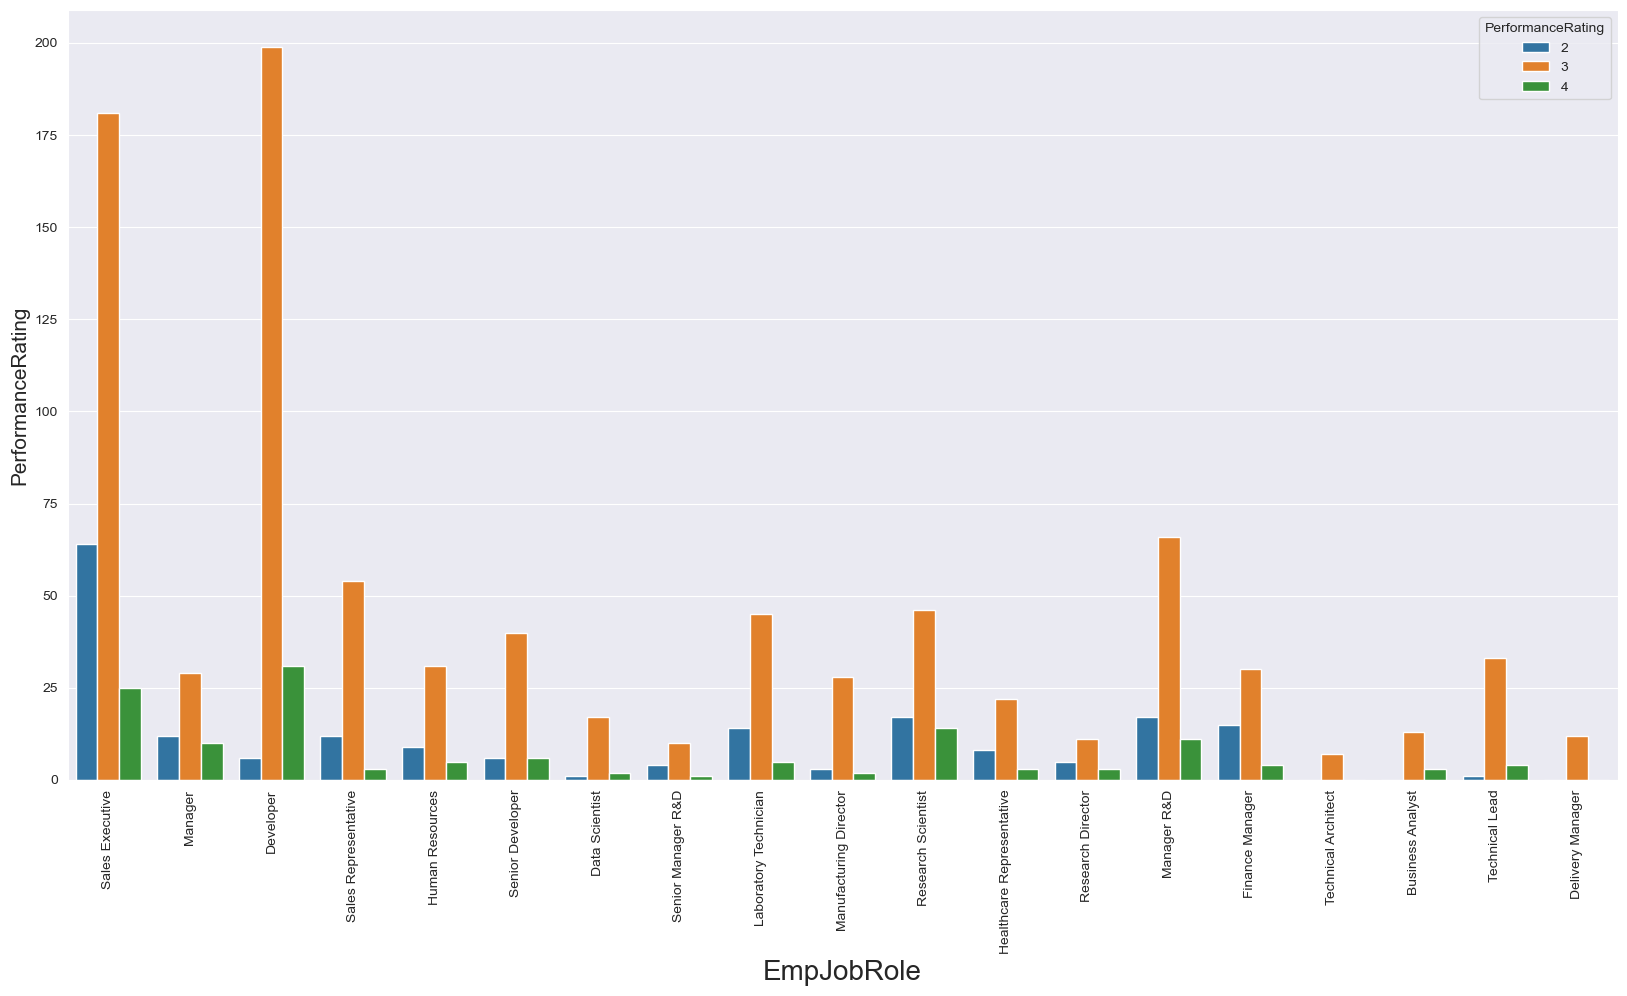

In [115]:
plt.figure(figsize=(20,10))
sns.countplot(x='EmpJobRole', hue=data['PerformanceRating'], data=data)
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole', fontsize=20)
plt.ylabel('PerformanceRating', fontsize=15)
plt.show()

* The majority of the time, the employee performance rating for developers and sales executives is 3.
* Employees in the roles of delivery manager and technical architect are not assigned a performance rating of 2 or 4.
* Less than 60 employees in sales executive were given a performance rating of two.
* The majority of the remaining employees in all job roles have a performance rating of three.

#### Creating new dataframe for numerical features

In [116]:
numerical_col = []
for column in data.columns:
    if data[column].dtype == "int64":
        data[column].unique()
        numerical_col.append(column)

numerical_col

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

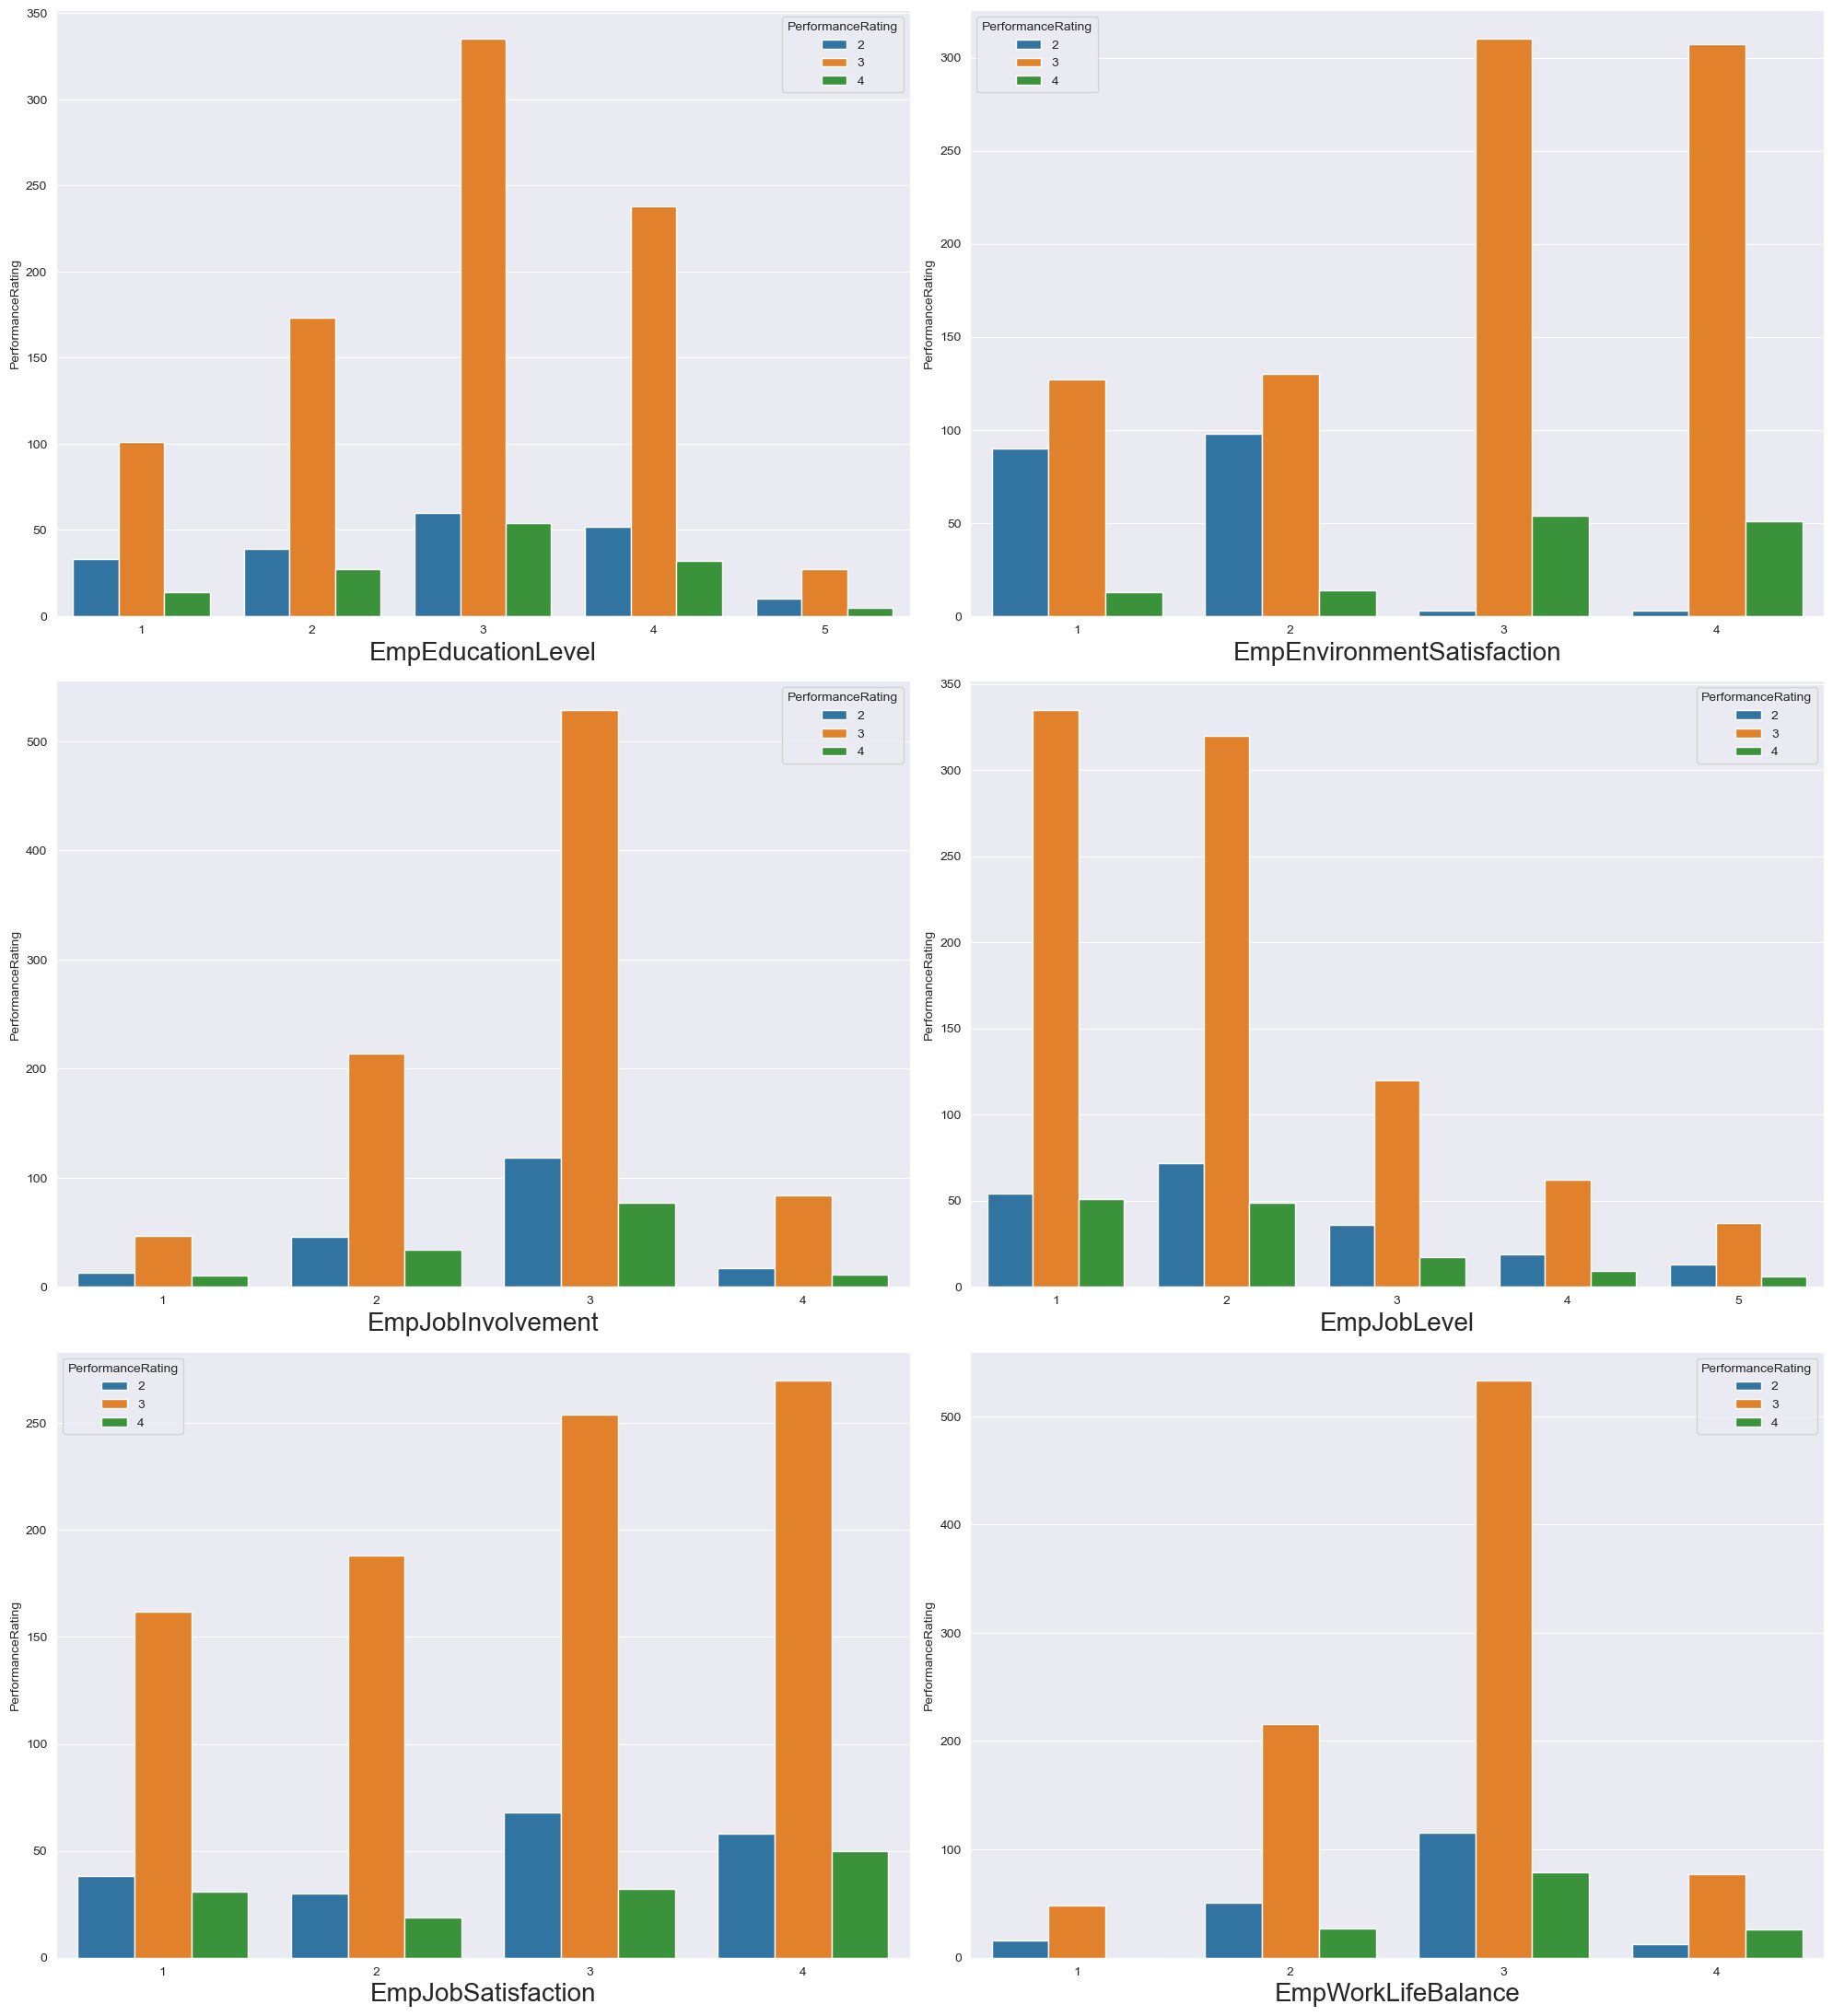

In [117]:
numerical = data[['EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'EmpWorkLifeBalance']]

plt.figure(figsize=(20,22))
plotno = 1

for column in numerical:
    if plotno<=7:
        plt.subplot(3, 2, plotno)
        sns.countplot(x=numerical[column], hue=data['PerformanceRating'])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('PerformanceRating')
    plotno+=1
plt.tight_layout()
plt.show()

**15. Relationship between EmpEducationLevel and performance rating**
* These workers' educational levels are [3, 4, & 2]. This worker primarily received a 3 performance rating.
* A performance rating of 2 or 4 indicates that every employee in terms of education level is below 60.

**16. Relationship between EmpEnvironmentSatisfaction and performance rating**
* The highest level of employee satisfaction with a performance rating of three is three and four.
* The maximum employee will receive a performance rating of two if the employee environment satisfaction is rated as one or two.
* The fourth performance rating will also rise if employee environment satisfaction rises.

#### 17. Relationship between EmpJobInvolvement and performance rating
* These employees' job involvement scores are 2 and 3, and they primarily have a 3 performance rating.
* Employees with performance ratings of 2 and 4 have lower overall job involvement.

**18. Relationship between EmpJobLevel and performance rating**
* When an employee's job level is 1, 2, or 3, the majority of them will have a 3 performance rating.
* Every employee's performance rating in jobs 2 and 4 is below 60.

#### 19. Relationship between EmpJobSatisfaction and performance rating
* Employees with maximum job satisfaction ratings of 4 and 3 typically receive performance ratings of 3.
* Overall performance rating for employees in grades 2 and 4 is less than 55.

**21. Relationship between EmpWorkLifeBalance and performance rating**
* The maximum number of employees with three performance ratings is reached if the employee's work-life balance is three.
* No one receives a 4-star performance rating if their work-life balance is a 1.

#### Multivariate Analysis

**1. Check the relationship between Age & Total work experiance with respect to target feature**

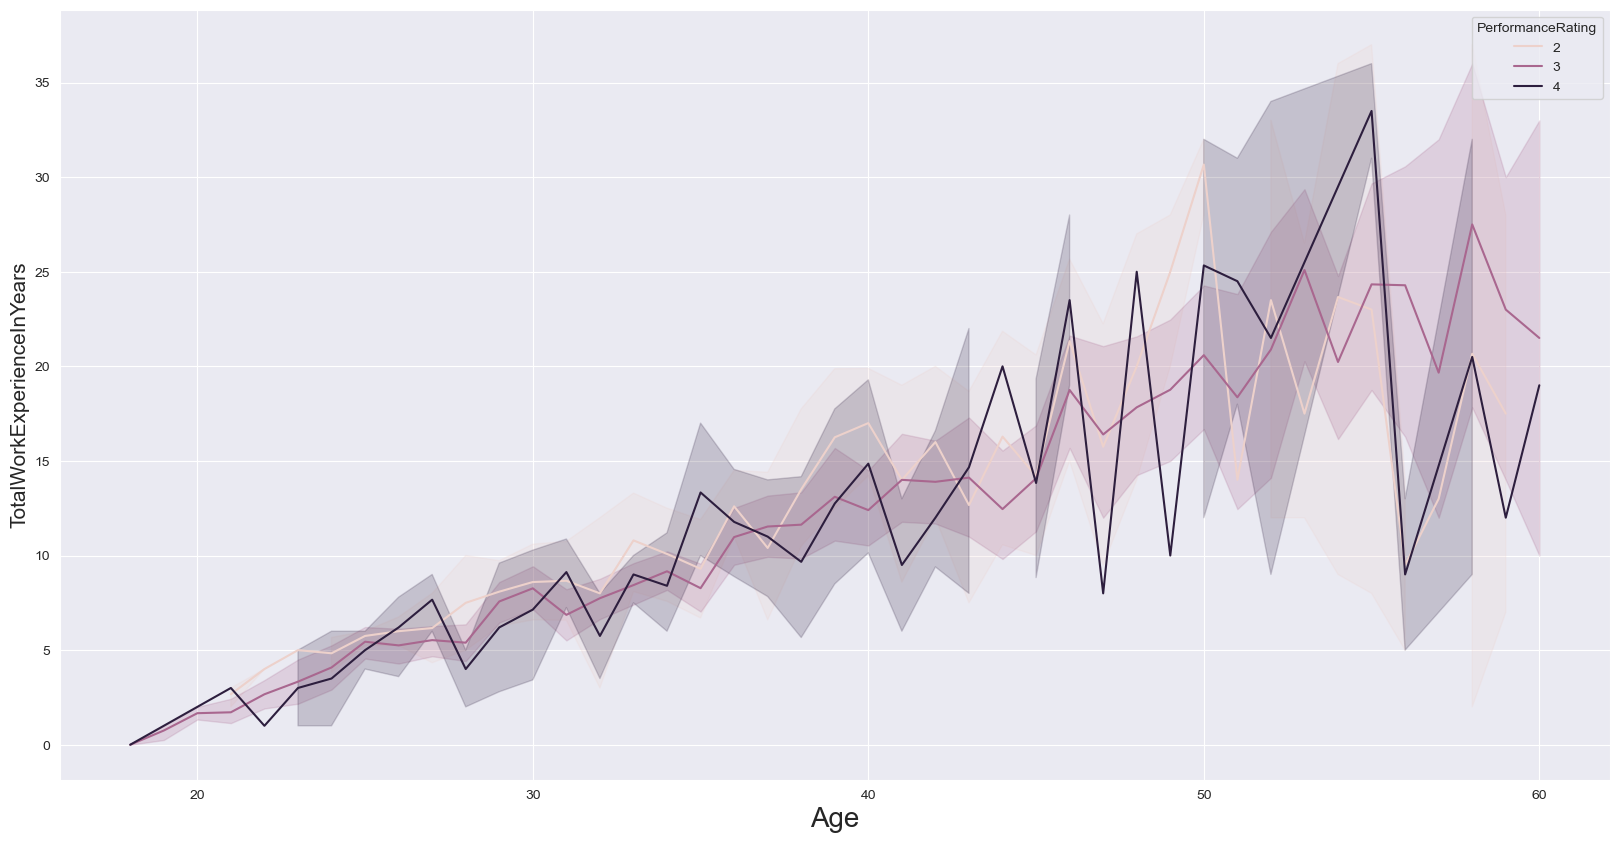

In [118]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Age', y='TotalWorkExperienceInYears', hue=data['PerformanceRating'], data=data)
plt.xlabel('Age', fontsize=20)
plt.ylabel('TotalWorkExperienceInYears', fontsize=15)
plt.show()

* When an employee's age and total experience increase, the majority of their performance ratings drop to 4.
* Minimum year of experience and low age also contribute to a 4-star performance rating.
* Employees with 30 years of experience and 50 years of age have two performance ratings.

**2. Check the relationship between Gender & Number Companies Worked with respect to target feature**

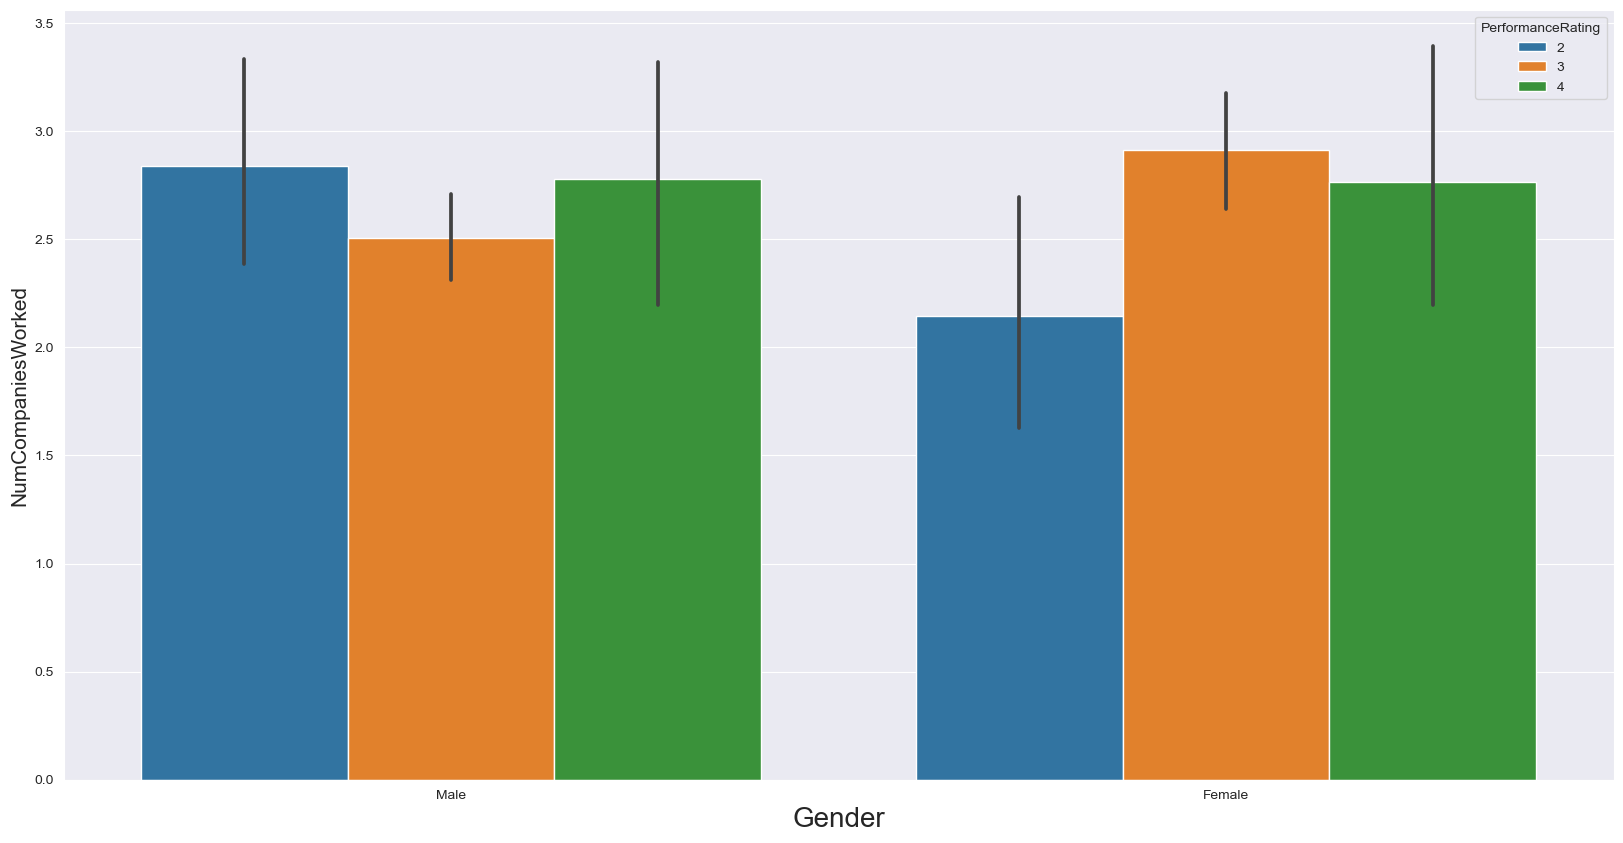

In [119]:
plt.figure(figsize=(20,10))
sns.barplot(x='Gender', y='NumCompaniesWorked', hue=data['PerformanceRating'], data=data)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('NumCompaniesWorked', fontsize=15)
plt.show()

* When a person is male and the company's workload is decreasing, the majority of performance ratings fall between a 2 and a 4.
* When fewer women are employed by companies, their performance rating is 2.
* If the number of companions worked increases, so does the female performance rating of 3 and 4.

**3. Check the relationship between MaritalStatus and Employee Last Salary Hike Percentage with respect to target feature**

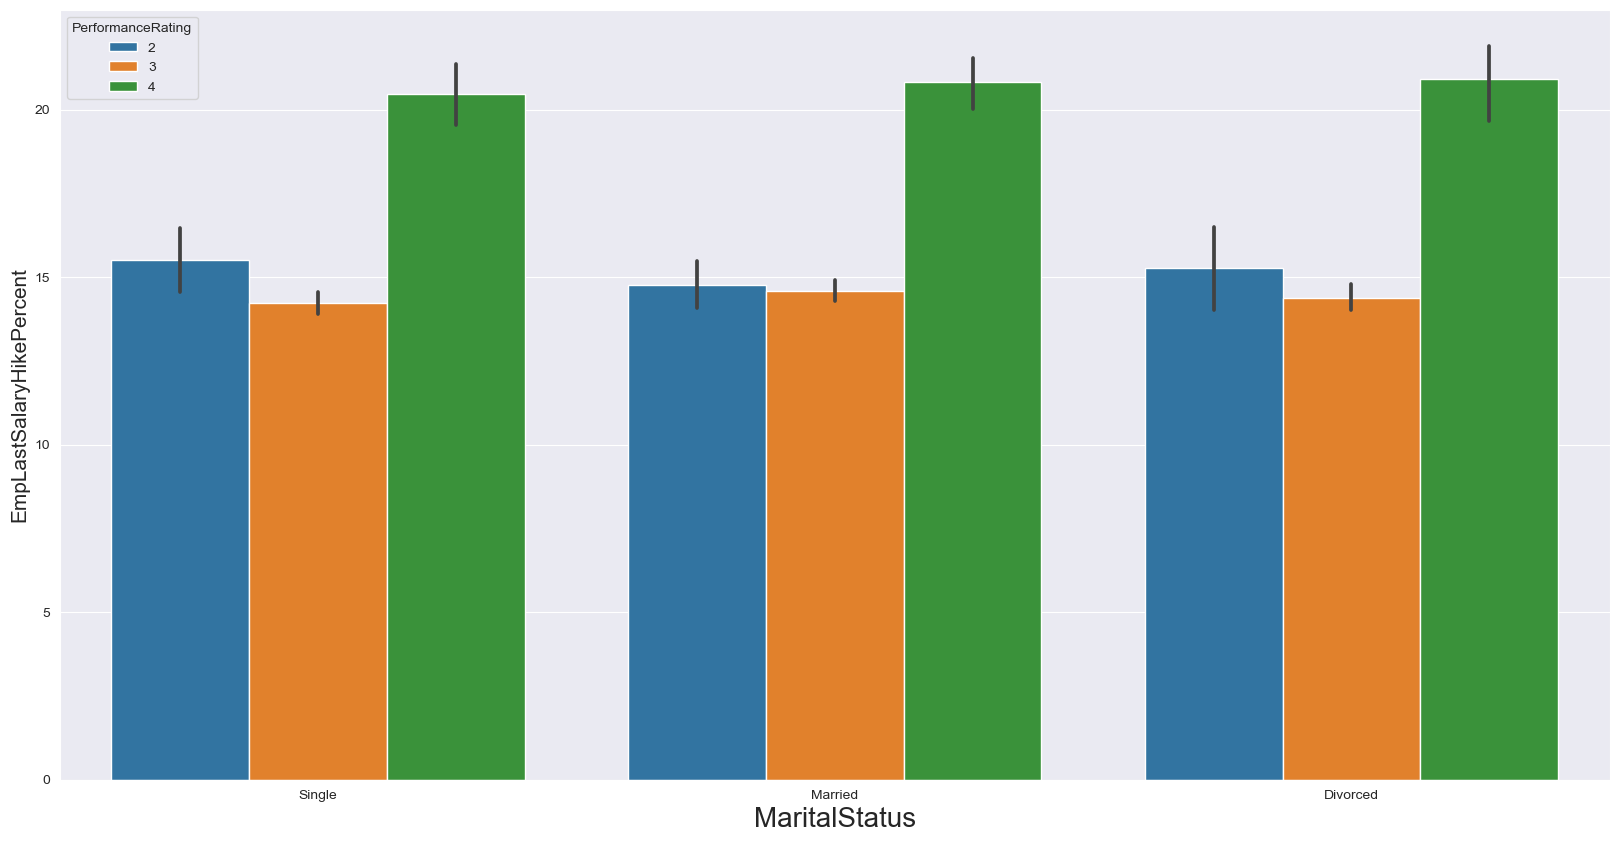

In [120]:
plt.figure(figsize=(20,10))
sns.barplot(x='MaritalStatus', y='EmpLastSalaryHikePercent', hue=data['PerformanceRating'], data=data)
plt.xlabel('MaritalStatus', fontsize=20)
plt.ylabel('EmpLastSalaryHikePercent', fontsize=15)
plt.show()

* The highest percentage of pay increases in all marital statuses during the previous year resulted in a performance rating of 4.
* In all marital statuses, a performance rating of 2 or 3 is given if the percentage of salary increases from the previous year was less than 15.

**4. Check the relationship between Business Travel Frequency & Employee Environment Satisfaction with respect to target feature**

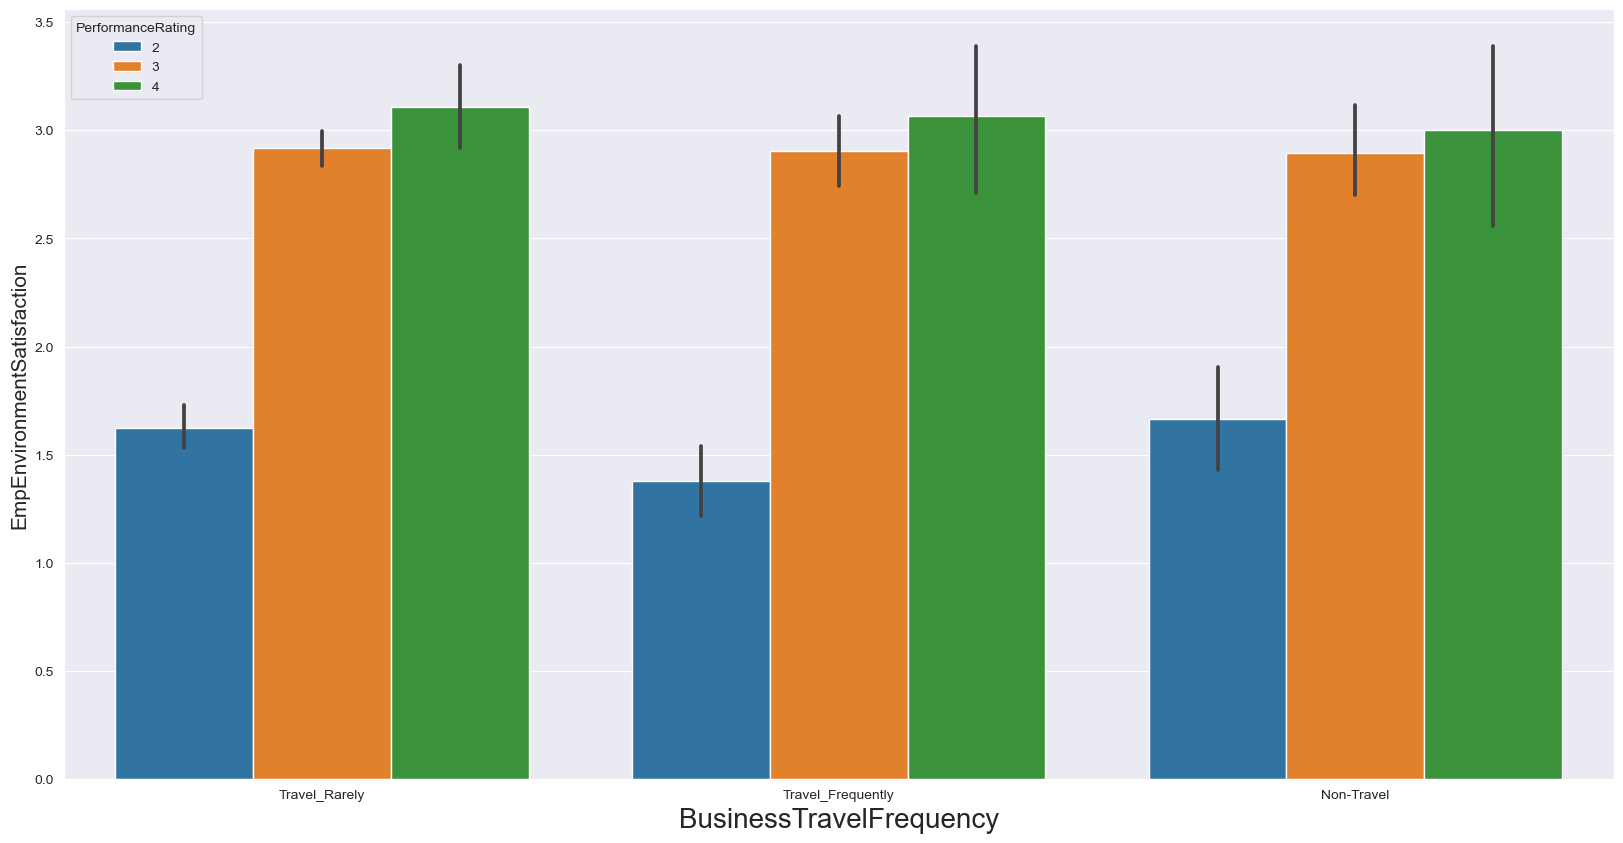

In [121]:
plt.figure(figsize=(20,10))
sns.barplot(x='BusinessTravelFrequency', y='EmpEnvironmentSatisfaction', hue=data['PerformanceRating'], data=data)
plt.xlabel('BusinessTravelFrequency', fontsize=20)
plt.ylabel('EmpEnvironmentSatisfaction', fontsize=15)
plt.show()

* When there is high employee environmental satisfaction, the performance rating for all business travel frequency is between a 3 and a 4.
* A two-star performance rating is given to low employee satisfaction with regard to all business travel frequency.

**5. Check the relationship between Attrition & Years With Current Manager with respect to target feature**

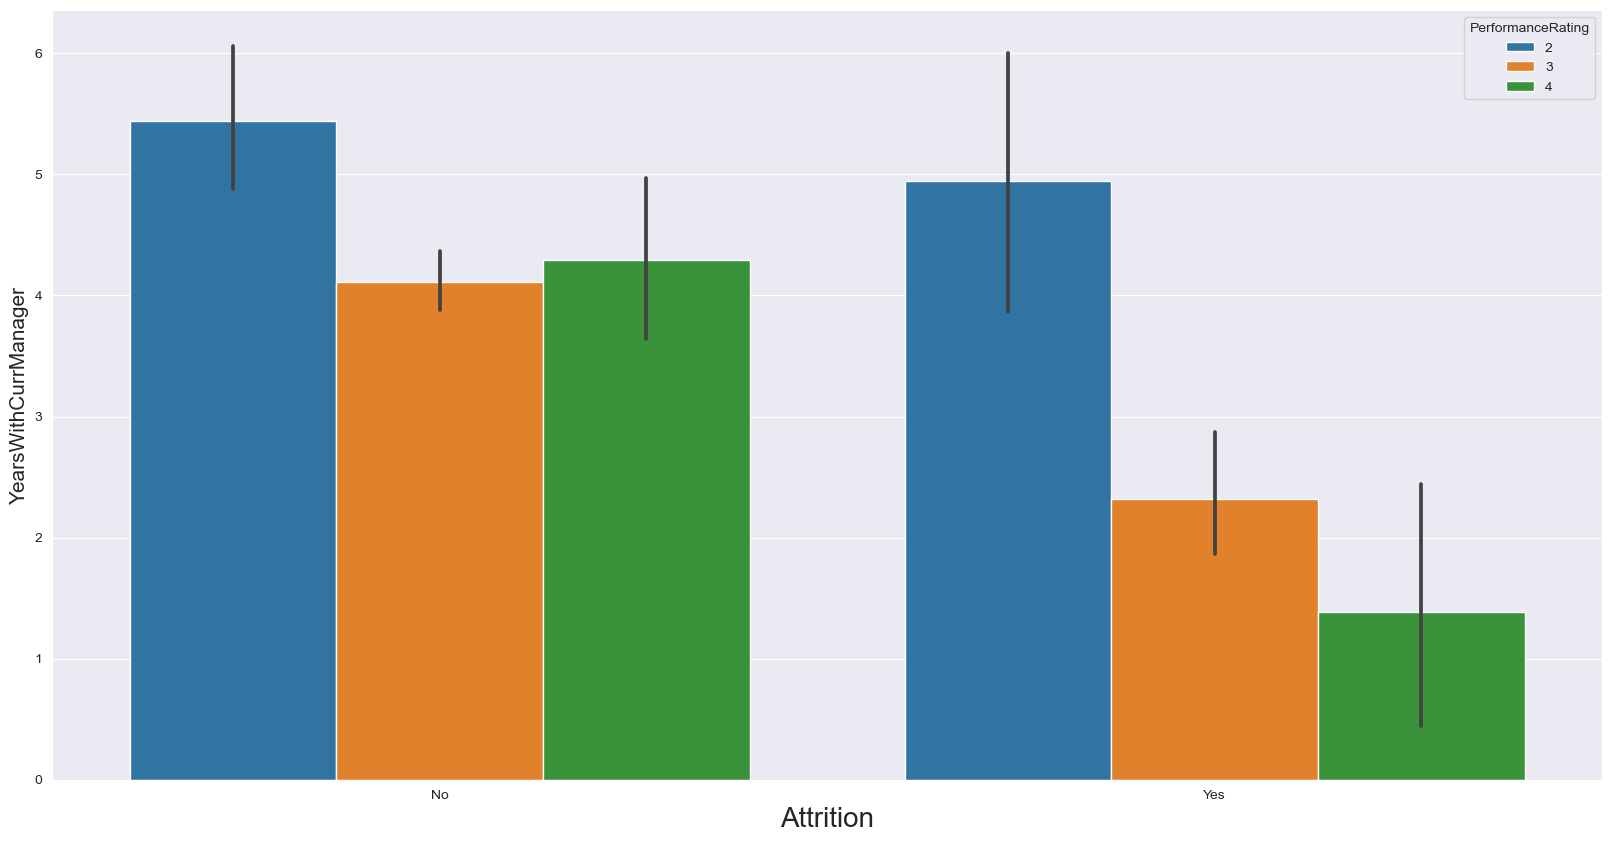

In [122]:
plt.figure(figsize=(20,10))
sns.barplot(x='Attrition', y='YearsWithCurrManager', hue=data['PerformanceRating'], data=data)
plt.xlabel('Attrition', fontsize=20)
plt.ylabel('YearsWithCurrManager', fontsize=15)
plt.show()

* If an employee's current manager year increases, their performance rating will be rated at 2, and they have a 50–50% chance of leaving the company.
* The current manager year is increasing, and the majority of those employees still work for the company. Those employees have a performance rating of 4.

**6. Check the relationship between Education Background and Experience Years In Curren Role with respect to target feature**

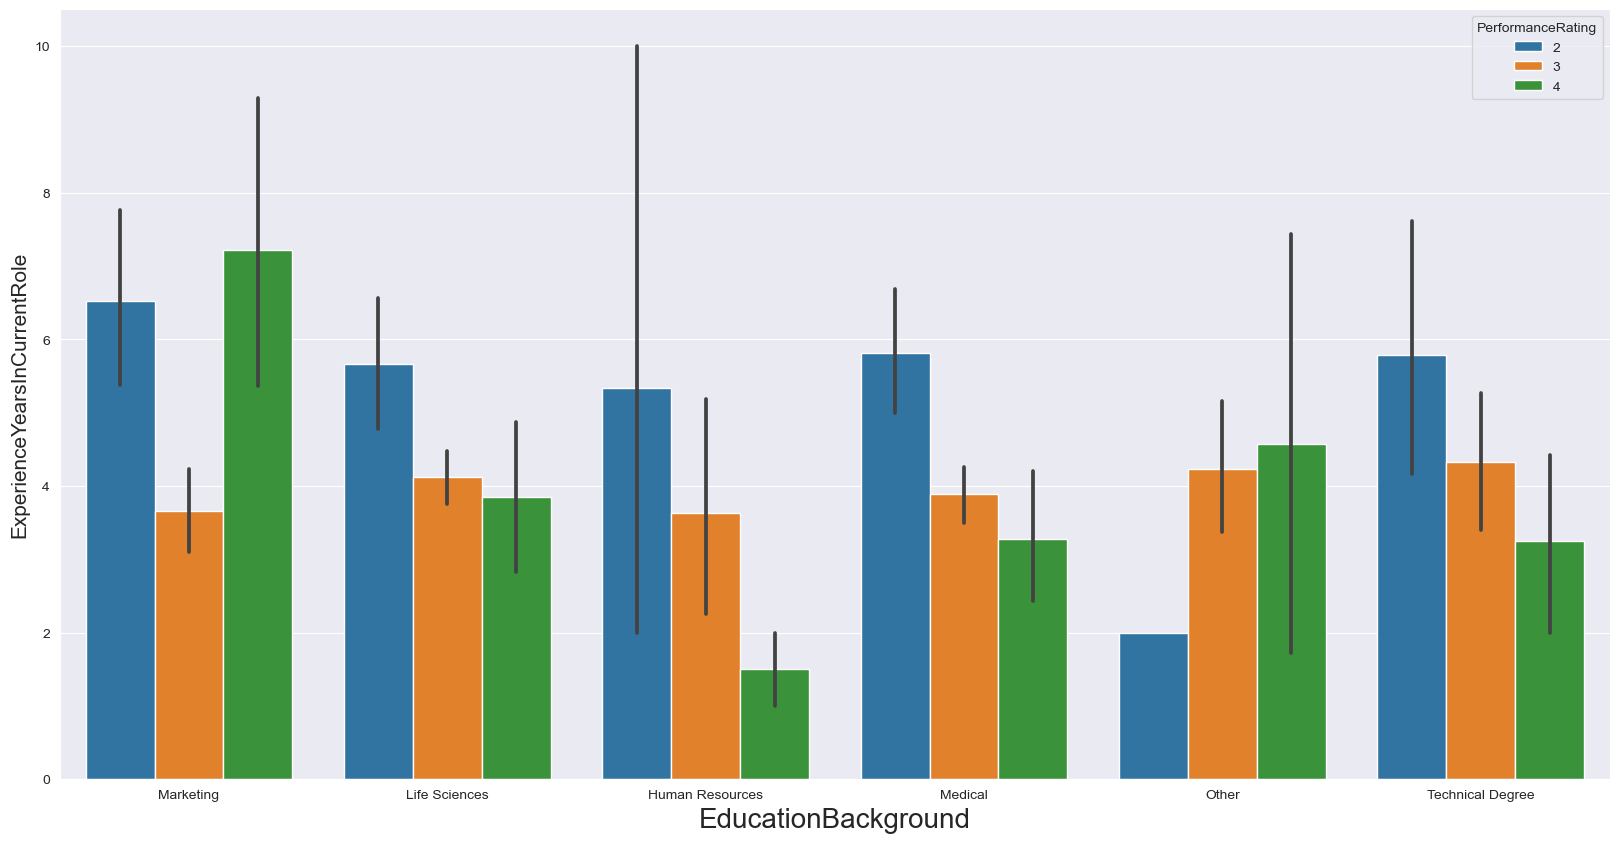

In [123]:
plt.figure(figsize=(20,10))
sns.barplot(x='EducationBackground', y='ExperienceYearsInCurrentRole', hue=data['PerformanceRating'], data=data)
plt.xlabel('EducationBackground', fontsize=20)
plt.ylabel('ExperienceYearsInCurrentRole', fontsize=15)
plt.show()

* The majority of the time, an employee with a background in marketing education and current role experience receives a 4-star performance rating.
* The employee's performance rating is two if their combined educational background and current role experience total more than five.
* The employee, who holds a technical degree and has experience in life sciences, medicine, and other fields, has been in their current role for less than 4 years, with a performance rating of 3 out of 4.

**7. Check the relationship between Over Time & Distance From Home with respect to target feature**

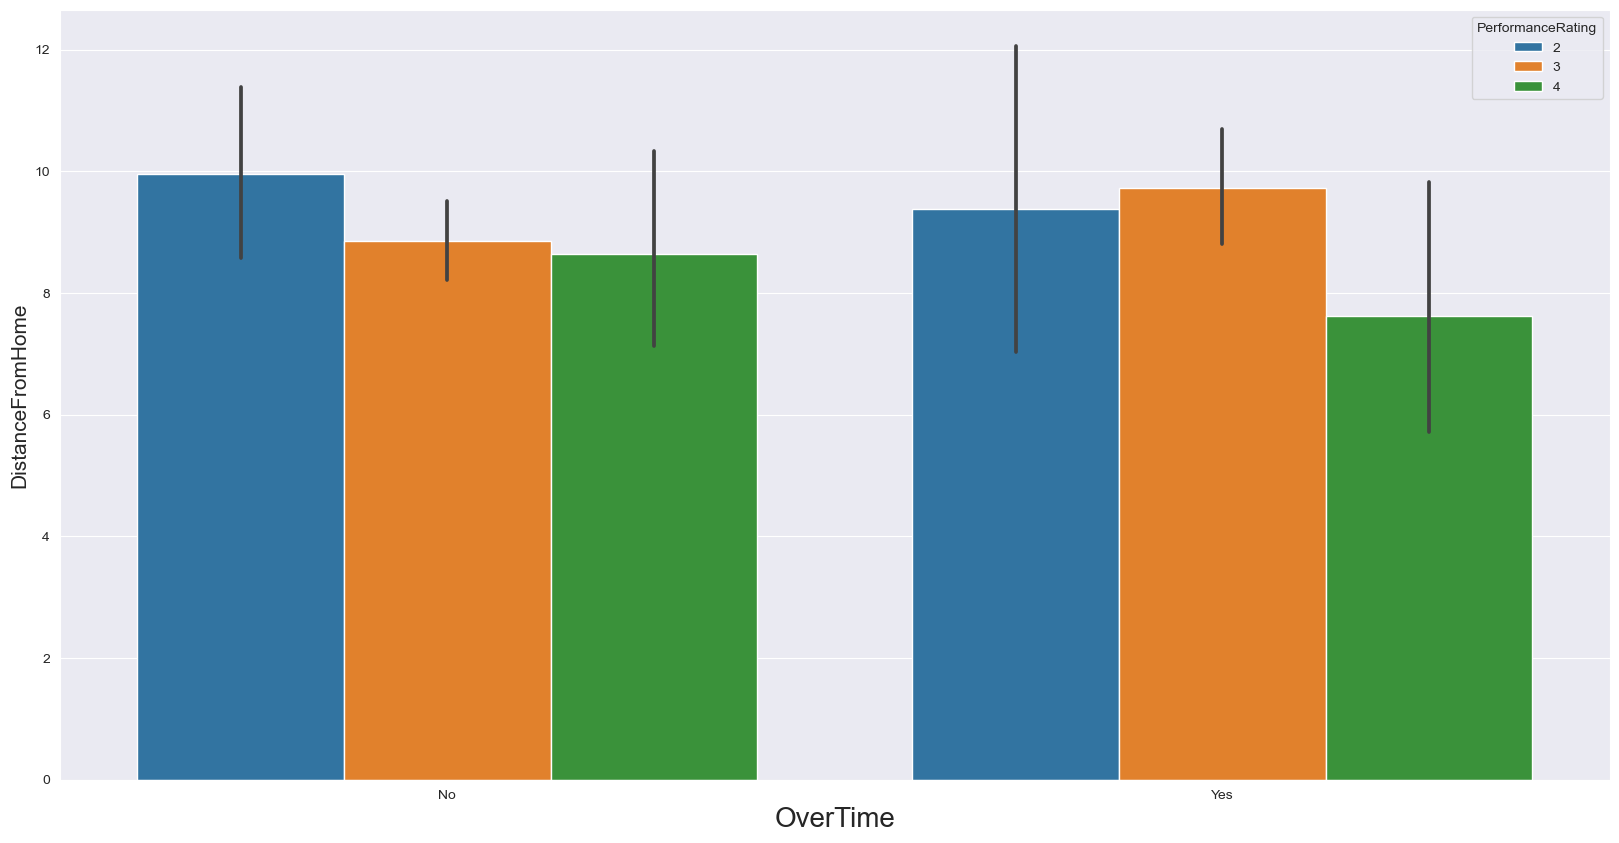

In [124]:
plt.figure(figsize=(20,10))
sns.barplot(x='OverTime', y='DistanceFromHome', hue=data['PerformanceRating'], data=data)
plt.xlabel('OverTime', fontsize=20)
plt.ylabel('DistanceFromHome', fontsize=15)
plt.show()

* When an employee's distance from home increases, their performance rating remains constant, regardless of whether they are working overtime or not.

**8.Check the relationship between Employee Department and Training Times Last Year with respect to target feature**

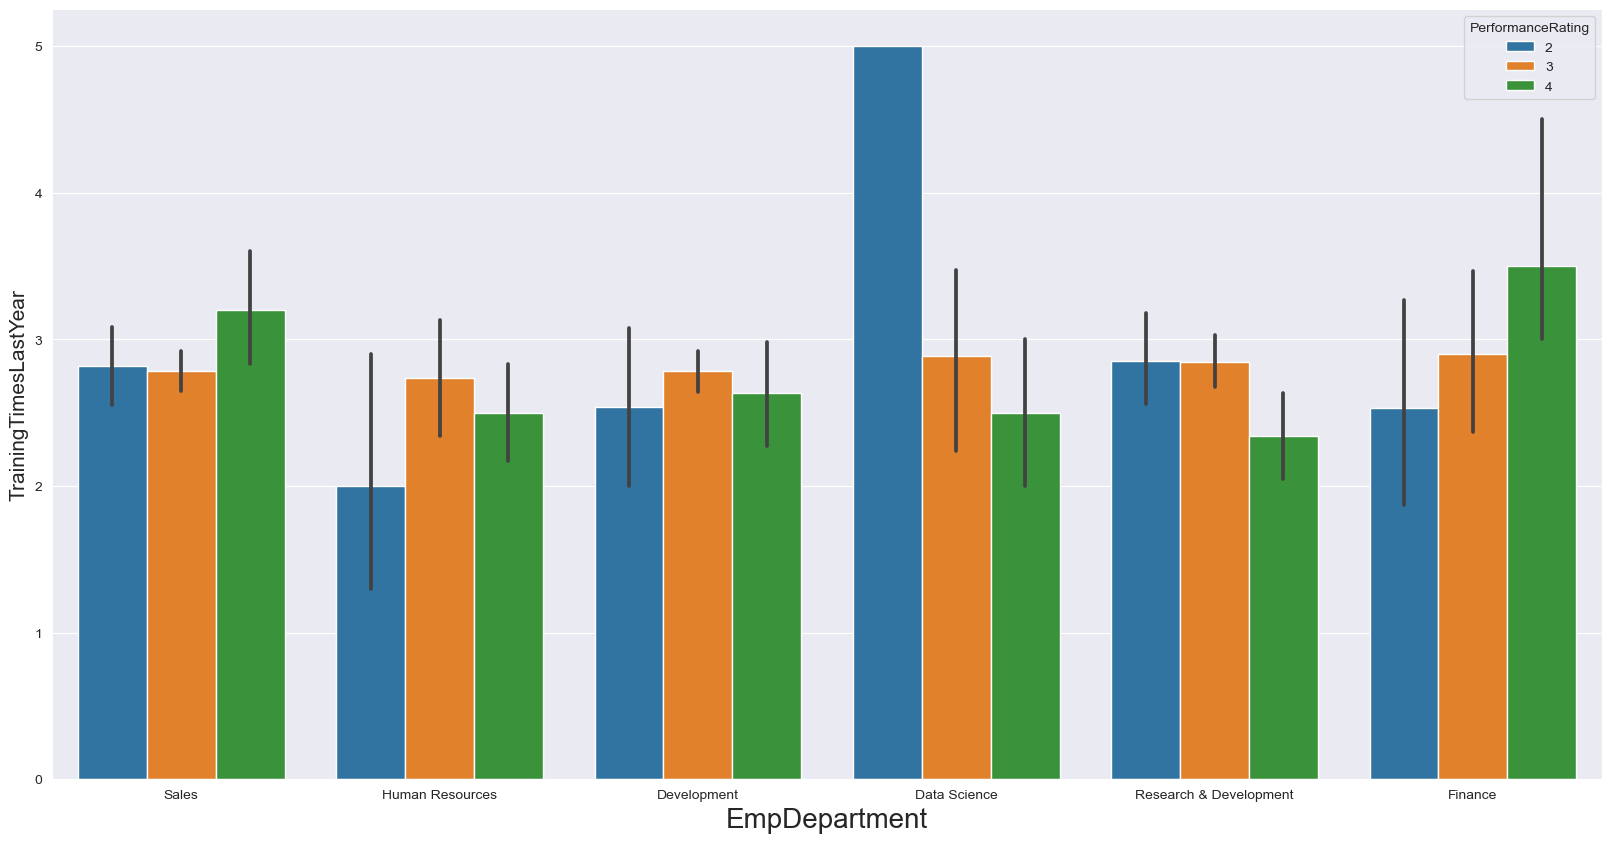

In [125]:
plt.figure(figsize=(20,10))
sns.barplot(x='EmpDepartment', y='TrainingTimesLastYear', hue=data['PerformanceRating'], data=data)
plt.xlabel('EmpDepartment', fontsize=20)
plt.ylabel('TrainingTimesLastYear', fontsize=15)
plt.show()

* A maximum performance rating of two is given to an employee from the data science department who received the most training time during the previous year.
* The performance rating remains constant for all employee departments that received less than three training sessions in the previous year.

**10. Check the relationship between Attrition &  Number of Companies Worked with respect to target feature**

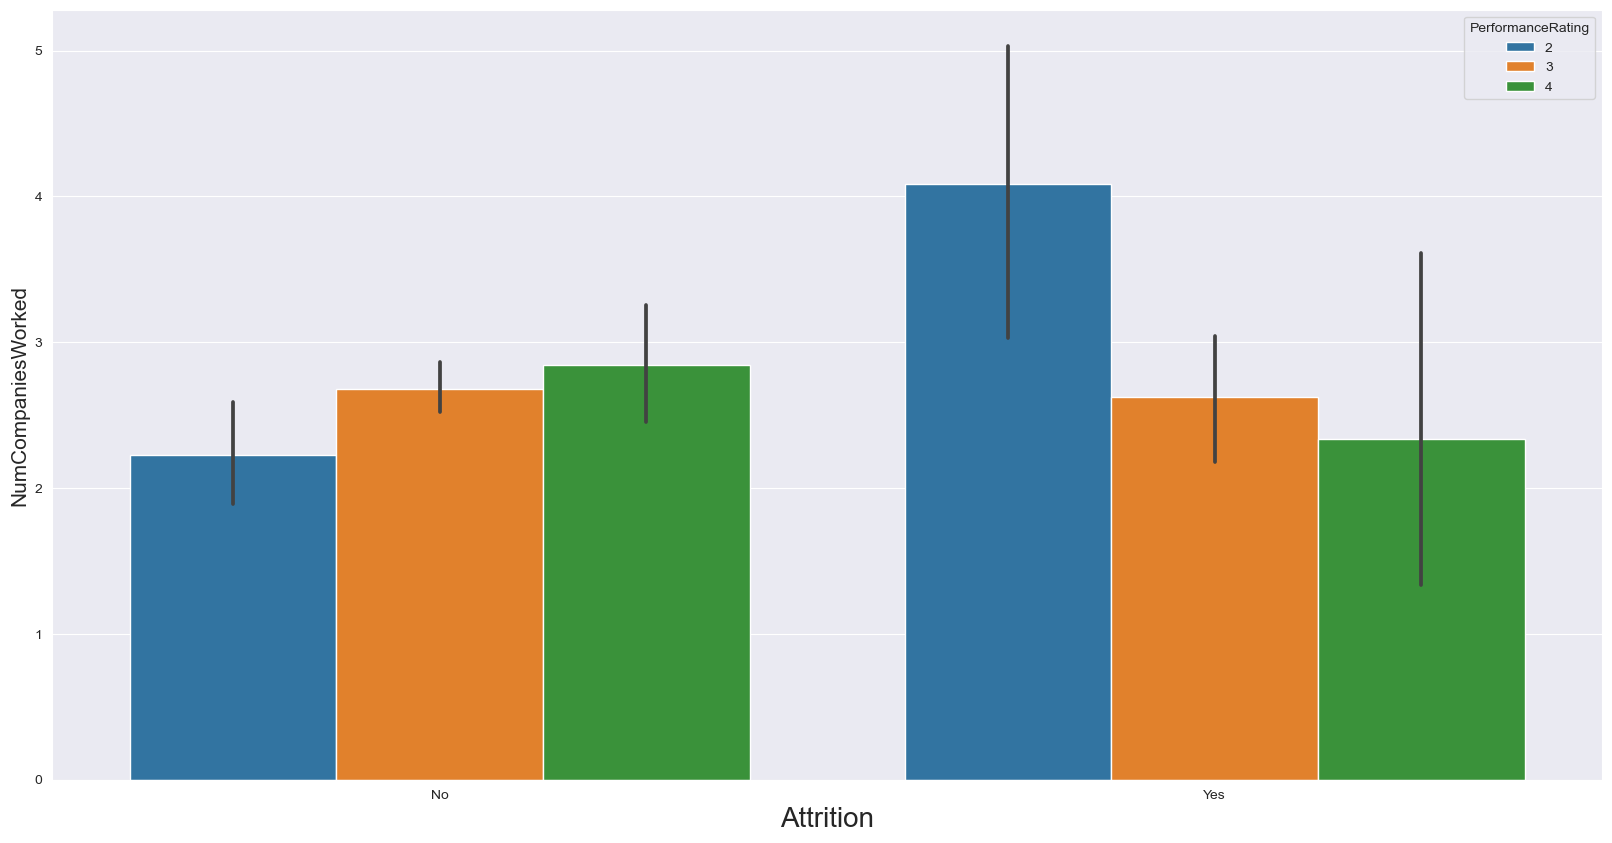

In [126]:
plt.figure(figsize=(20,10))
sns.barplot(x='Attrition', y='NumCompaniesWorked', hue=data['PerformanceRating'], data=data)
plt.xlabel('Attrition', fontsize=20)
plt.ylabel('NumCompaniesWorked', fontsize=15)
plt.show()

* When an employee's number of employers increases, the majority of them leave the company, and their performance rating drops to a 2.
* Employees who have worked for fewer companies remain with the company and maintain a consistent performance rating.

#### Performance Rating according to Department

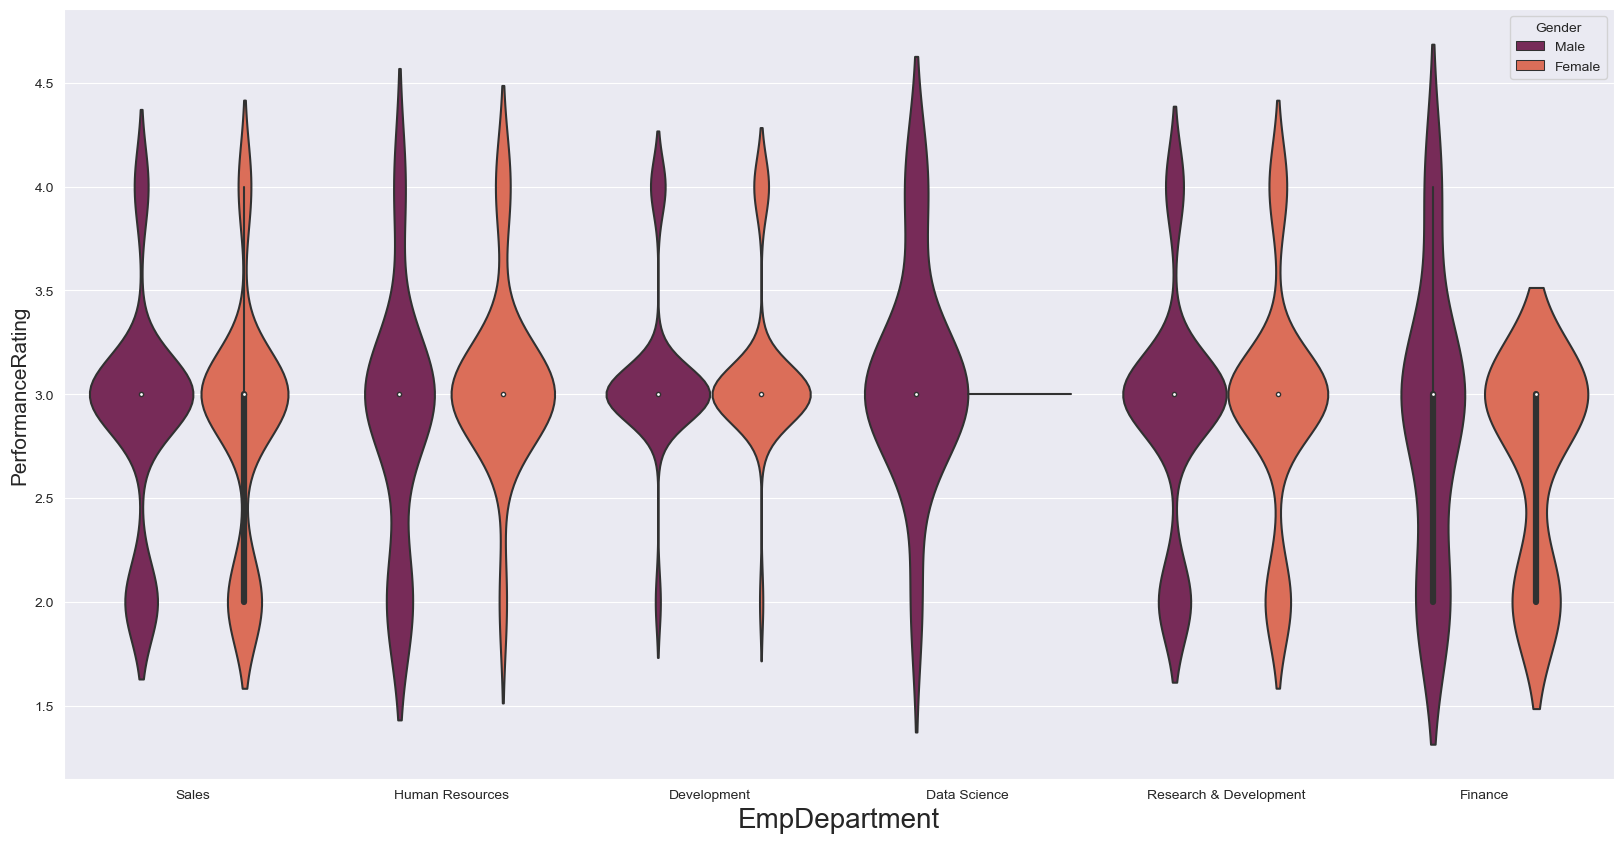

In [127]:
plt.figure(figsize=(20,10), facecolor='white')
sns.violinplot(x='EmpDepartment', y='PerformanceRating', hue=data['Gender'], data=data, palette='rocket')
plt.xlabel('EmpDepartment', fontsize=20)
plt.ylabel('PerformanceRating', fontsize=15)
plt.show()

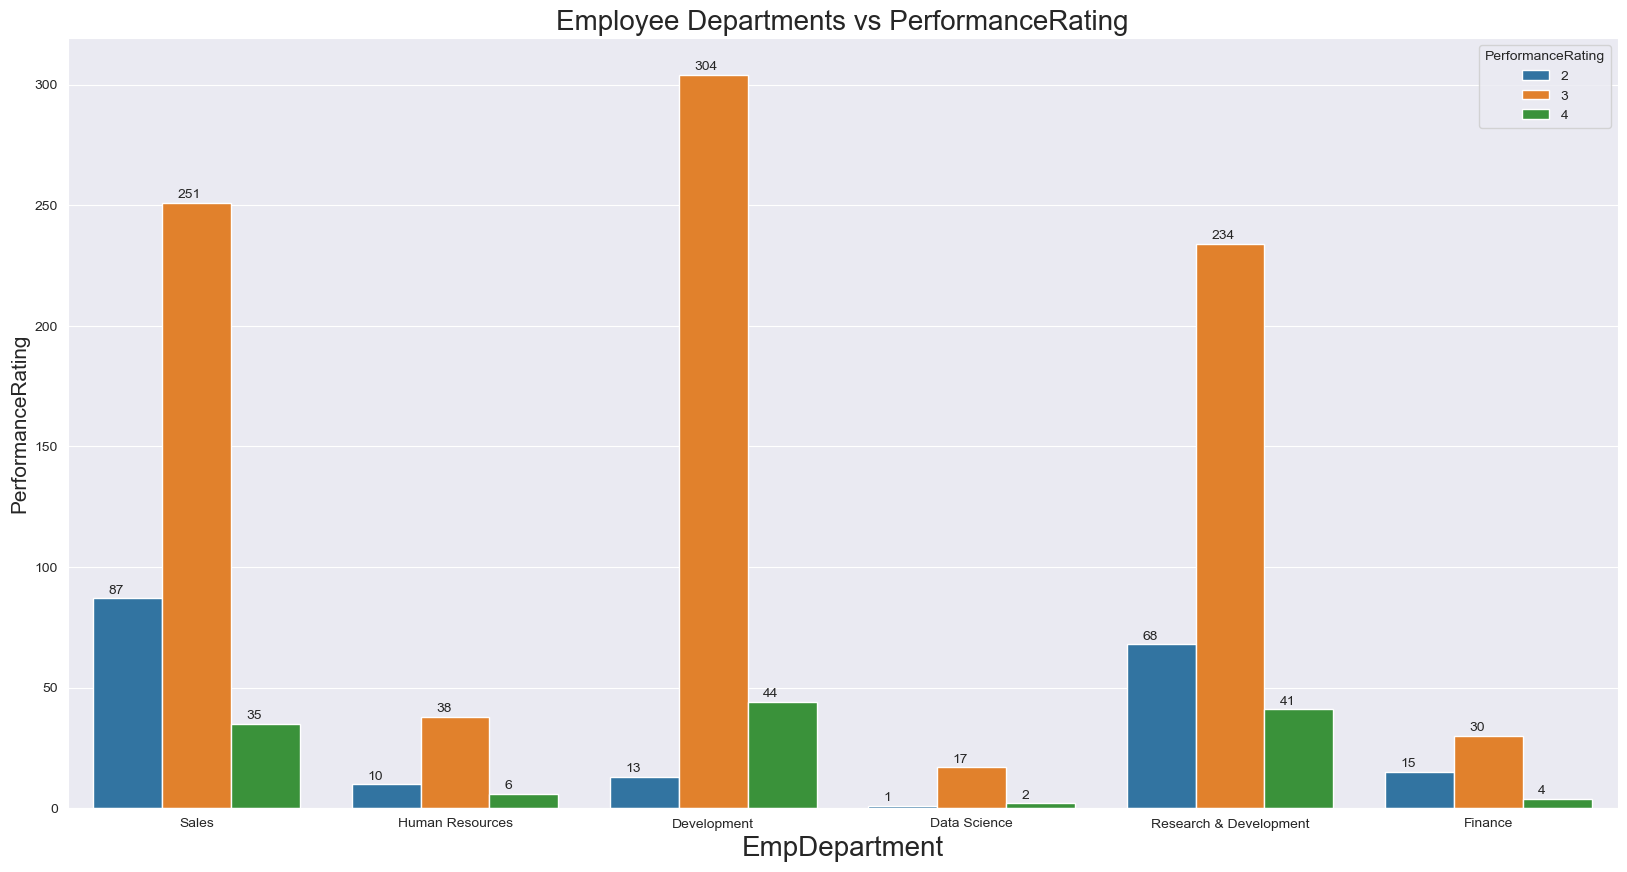

In [128]:
plt.figure(figsize=(20,10), facecolor='white')
ax = sns.countplot(x='EmpDepartment', hue=data['PerformanceRating'], data=data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating', fontsize=20)
plt.xlabel('EmpDepartment', fontsize=20)
plt.ylabel('PerformanceRating', fontsize=15)
plt.show()

**From the above graph we can conclude that from the Employee Department Development department is showing High performance rating**

**Sales:** In the sales department, performance rating level 3 is higher. When compared to female performers, male performers received a slightly higher rating.

**Human Resources:** The vast majority of workers performing below level 3. In this area, older people are underperforming. The female staff members in the HR department are performing incredibly well.

**Development:** The maximum workforce consists of level 3 performers. Workers of all ages are only operating at level 3. For both, the gender-based performance is almost identical.

**Data Science:** The department of data science has the highest average level 3 performance. The only department with fewer level 2 performers is data science. The performance is better than it is in every department combined. Male staff members are performing well in this division.

**Research & Development:** There are employees at every performance level, regardless of age, so the age factor is not affecting the level of performance here. The female employees in R&D are performing well.

**Finance:** As one gets older, the performance of the finance department declines exponentially. The men who work there are doing well. The performance level and the experience factor have an inverse relationship.

#### Employee Department Percentage Count with Performance Rating

In [129]:
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True, normalize=True)
round(percent.multiply(100), 2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


#### Top 3 factor affecting to the employee performance

**1. Employee Enviorment Satisfaction**

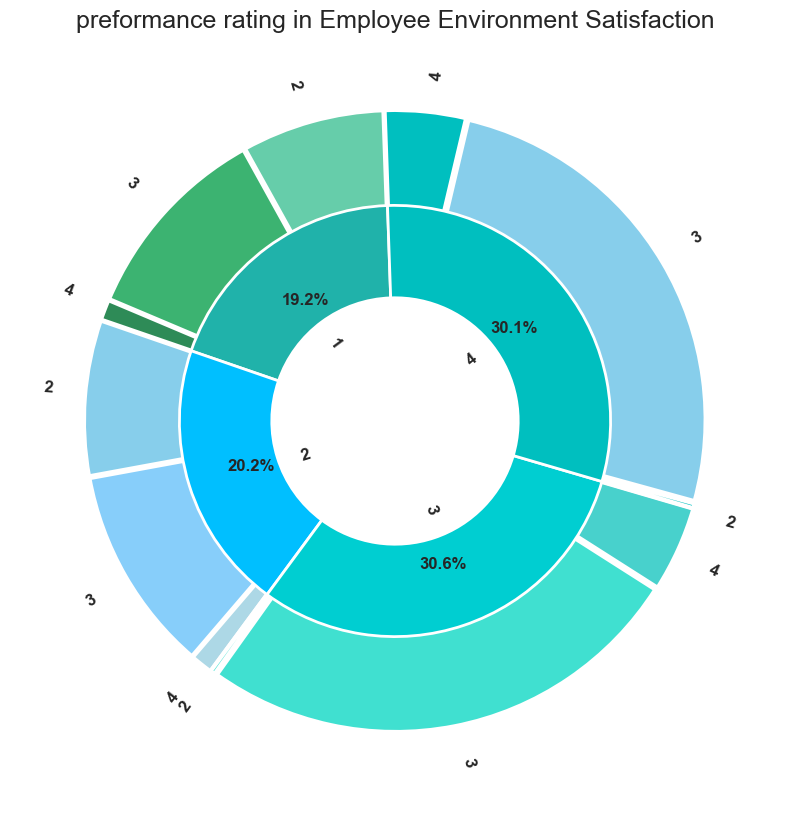

In [130]:
plt.figure(figsize=(20,10))
plt.title("preformance rating in Employee Environment Satisfaction", fontsize=18)
plt.pie([90,127,13,98,130,14,3,310,54,3,307,51], radius=1,
        colors = ["mediumaquamarine","mediumseagreen","seagreen",
                  "skyblue","lightskyblue",'lightblue',
                  'turquoise','turquoise','mediumturquoise',
                  'c','skyblue','c',
                 ],explode =[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
        labels=[2,3,4,2,3,4,2,3,4,2,3,4],rotatelabels=True,
        pctdistance=0.82, textprops = {"fontsize":12, "fontweight":"bold"}, startangle=92,
        wedgeprops=dict(width=0.6, edgecolor='w', linewidth=3))

plt.pie([230,242,367,361], radius=0.7,
        colors=['lightseagreen', 'deepskyblue', "darkturquoise", "c"],
        wedgeprops=dict(width=0.3, edgecolor='w', linewidth=2), textprops = {"fontsize":12, "fontweight":"bold"},
        autopct='%.1f%%',
        labels=[1,2,3,4],
        pctdistance=0.70, labeldistance=0.4, rotatelabels=True, startangle=92)
plt.show()

* The Employee Environment Satisfaction Levels 3 and 4 encompass the Maximum Number of Employees Performance Rating, which comprises 367 and 361.

**2. Employee last salary hike percent**

In [131]:
pd.crosstab(data['EmpLastSalaryHikePercent'], data['PerformanceRating'], margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


* A greater number of employees receiving salary hikes between 11 and 19% are receiving maximum time ratings of 2 and 3.
* Employees with a performance rating of 4 and a salary hike percentage between 20 and 22%.

**3. Employee Work life balance**

In [132]:
pd.crosstab(data['EmpWorkLifeBalance'], data['PerformanceRating'], margins=True)

PerformanceRating,2,3,4,All
EmpWorkLifeBalance,,,,
1,16,48,0,64
2,51,216,27,294
3,115,533,79,727
4,12,77,26,115
All,194,874,132,1200


* Level 3 of Employee Work-Life Balance indicates that employees' performance ratings are high.

#### Checking the distribution of continuous feature

In [133]:
data.select_dtypes('int64').head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


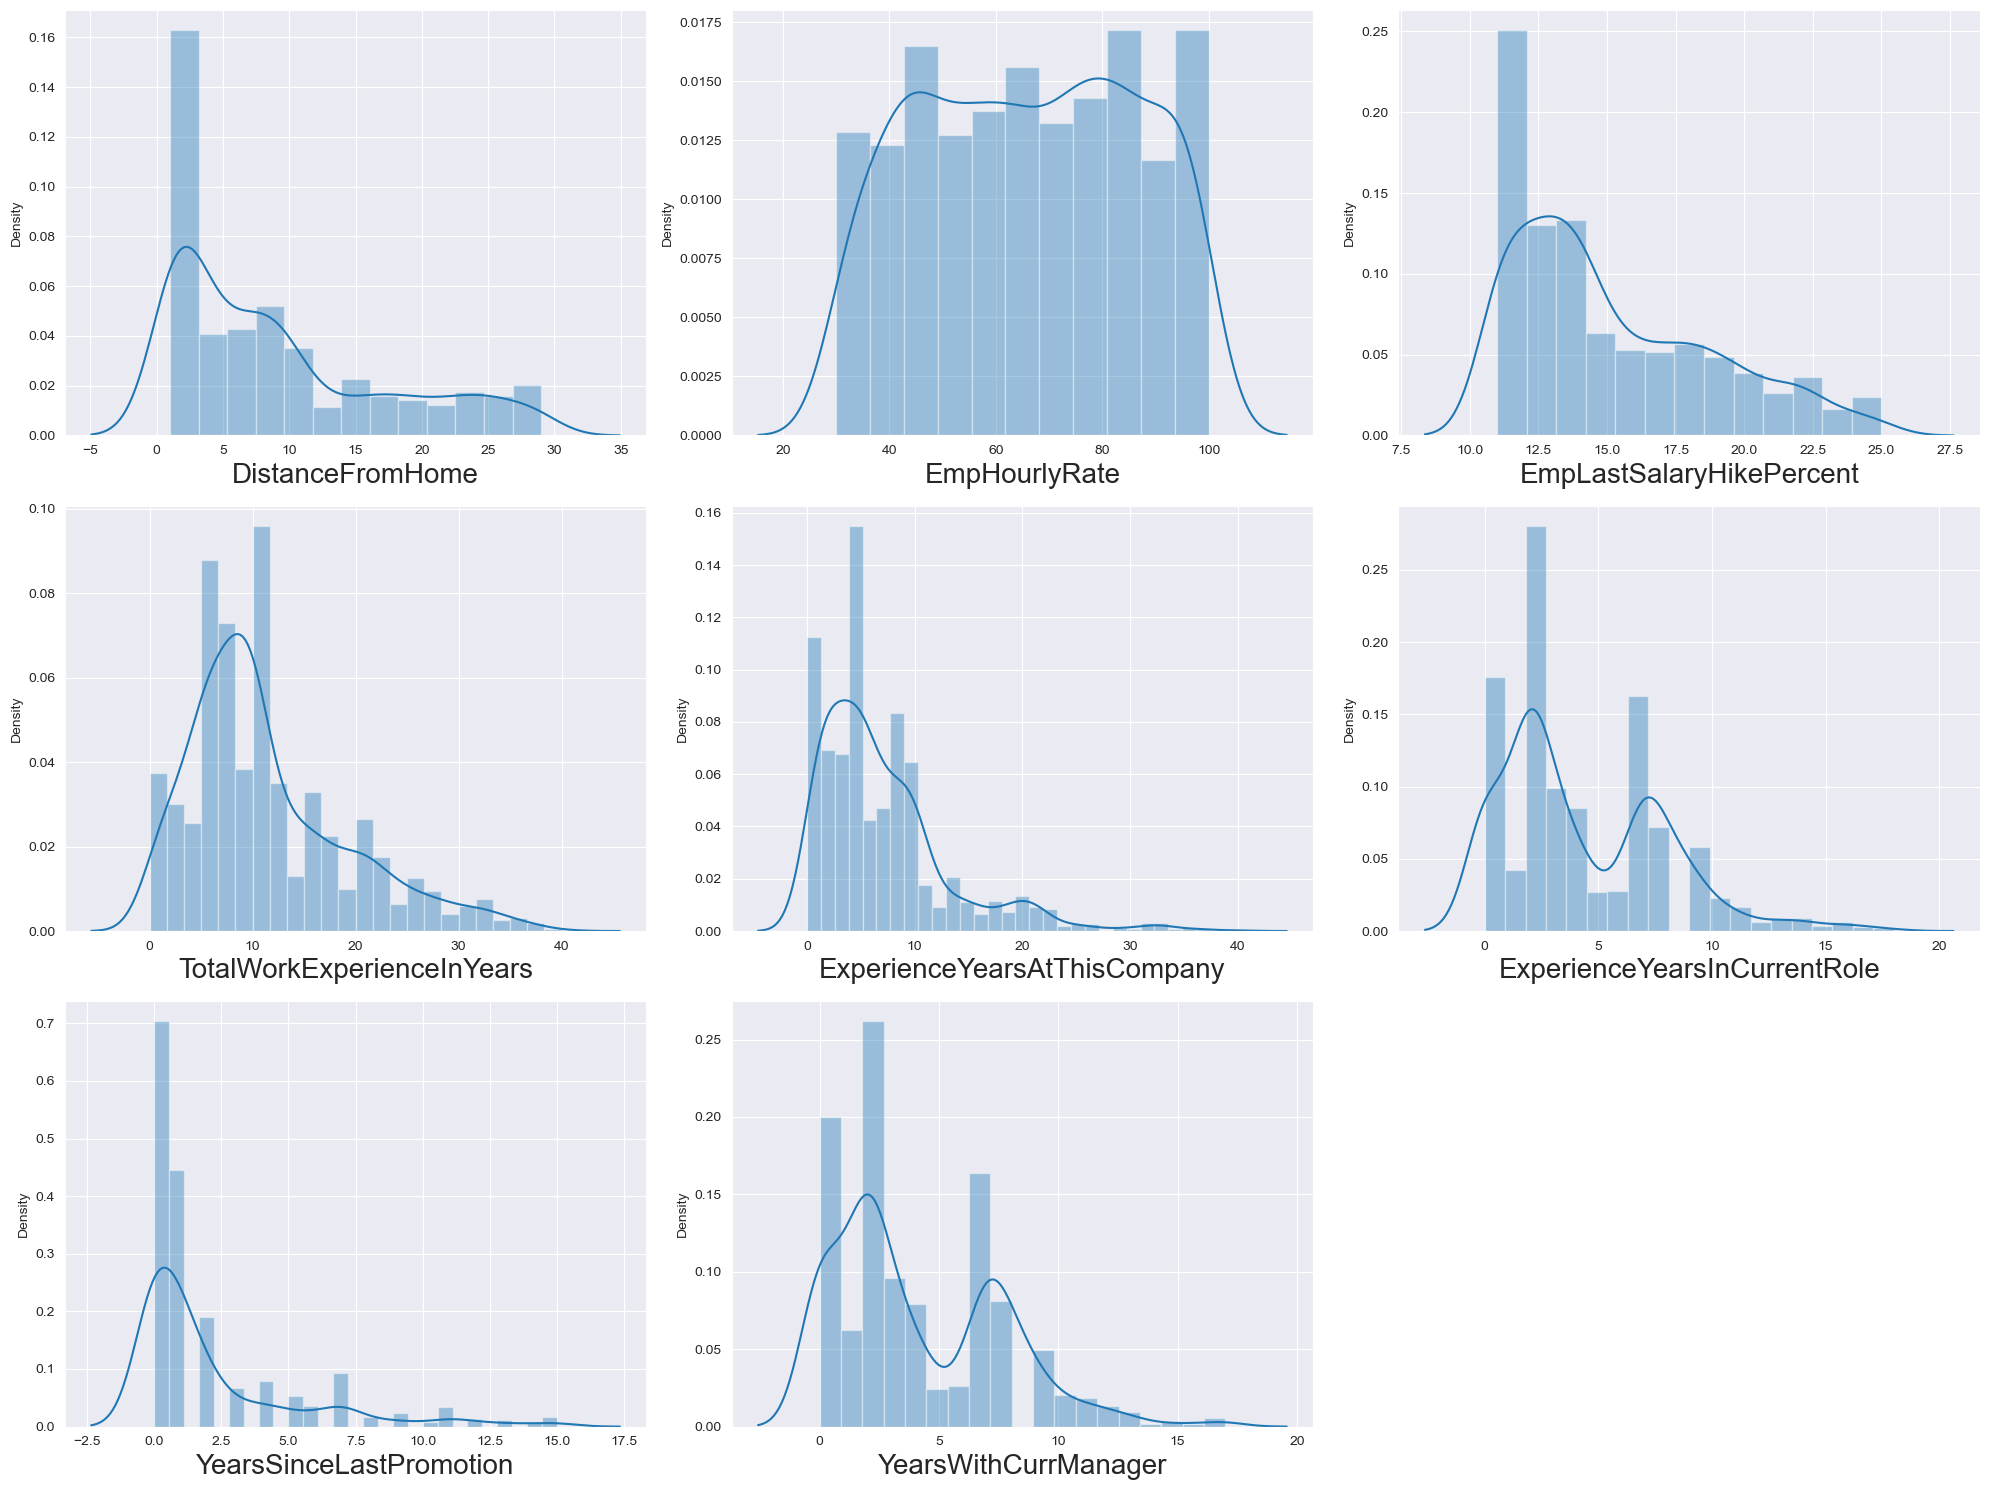

In [135]:
continuous = data[['DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
                   'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

plt.figure(figsize=(20,15))
plotno = 1

for column in continuous:
    if plotno<=8:
        plt.subplot(3,3,plotno)
        sns.distplot(x=continuous[column]) 
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()

#### Checking Skewness

In [136]:
print('1. Distance From Home Feature Skewness:', data['DistanceFromHome'].skew())
print('2. Employee Hourly Rate Feature Skewness:', data['EmpHourlyRate'].skew())
print('3. Employee Last Salary Hike Percent Feature Skewness:', data['EmpLastSalaryHikePercent'].skew())
print('4. Total Work Experiance In Year Feature Skewness:', data['TotalWorkExperienceInYears'].skew())
print('5. Experiance Year At This Company Feature Skewness:', data['ExperienceYearsAtThisCompany'].skew())
print('6. Experiance Year In Current Role Feature Skewness:', data['ExperienceYearsInCurrentRole'].skew())
print('7. Year Since Last Promotion Feature Skewness:', data['YearsSinceLastPromotion'].skew())
print('8. Years With Current Manager Feature Skewness:', data['YearsWithCurrManager'].skew())

1. Distance From Home Feature Skewness: 0.9629561160828001
2. Employee Hourly Rate Feature Skewness: -0.035164888157941436
3. Employee Last Salary Hike Percent Feature Skewness: 0.8086536332261228
4. Total Work Experiance In Year Feature Skewness: 1.0868618597364565
5. Experiance Year At This Company Feature Skewness: 1.789054979919473
6. Experiance Year In Current Role Feature Skewness: 0.8881586703270758
7. Year Since Last Promotion Feature Skewness: 1.9749315589155791
8. Years With Current Manager Feature Skewness: 0.8131582957766446


* Only one feature, Year Since Last Promotion, has skewness from the above all feature skewness, so feature transformation is required during data preprocessing.

#### Checking Kurtosis

In [137]:
print('1. Distance From Home Feature kurtosis:', data['DistanceFromHome'].kurtosis())
print('2. Employee Hourly Rate Feature kurtosis:', data['EmpHourlyRate'].kurtosis())
print('3. Employee Last Salary Hike Percent Feature kurtosis:', data['EmpLastSalaryHikePercent'].kurtosis())
print('4. Total Work Experiance In Year Feature kurtosis:', data['TotalWorkExperienceInYears'].kurtosis())
print('5. Experiance Year At This Company Feature kurtosis:', data['ExperienceYearsAtThisCompany'].kurtosis())
print('6. Experiance Year In Current Role Feature kurtosis:', data['ExperienceYearsInCurrentRole'].kurtosis())
print('7. Year Since Last Promotion Feature kurtosis:', data['YearsSinceLastPromotion'].kurtosis())
print('8. Years With Current Manager Feature kurtosis:', data['YearsWithCurrManager'].kurtosis())

1. Distance From Home Feature kurtosis: -0.24201677636189256
2. Employee Hourly Rate Feature kurtosis: -1.1868905128360532
3. Employee Last Salary Hike Percent Feature kurtosis: -0.29974077544117517
4. Total Work Experiance In Year Feature kurtosis: 0.8056333333819827
5. Experiance Year At This Company Feature kurtosis: 4.057959404441291
6. Experiance Year In Current Role Feature kurtosis: 0.4380286874251209
7. Year Since Last Promotion Feature kurtosis: 3.5390800793468817
8. Years With Current Manager Feature kurtosis: 0.14820164456972984


* The kurtosis of all features is only high in two years—the year of this company's experience and the year of the last promotion—so feature transformation in data preprocessing is required.

#### Distribution of mean of data

In [138]:
numerical = data.select_dtypes('int64')
numerical.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


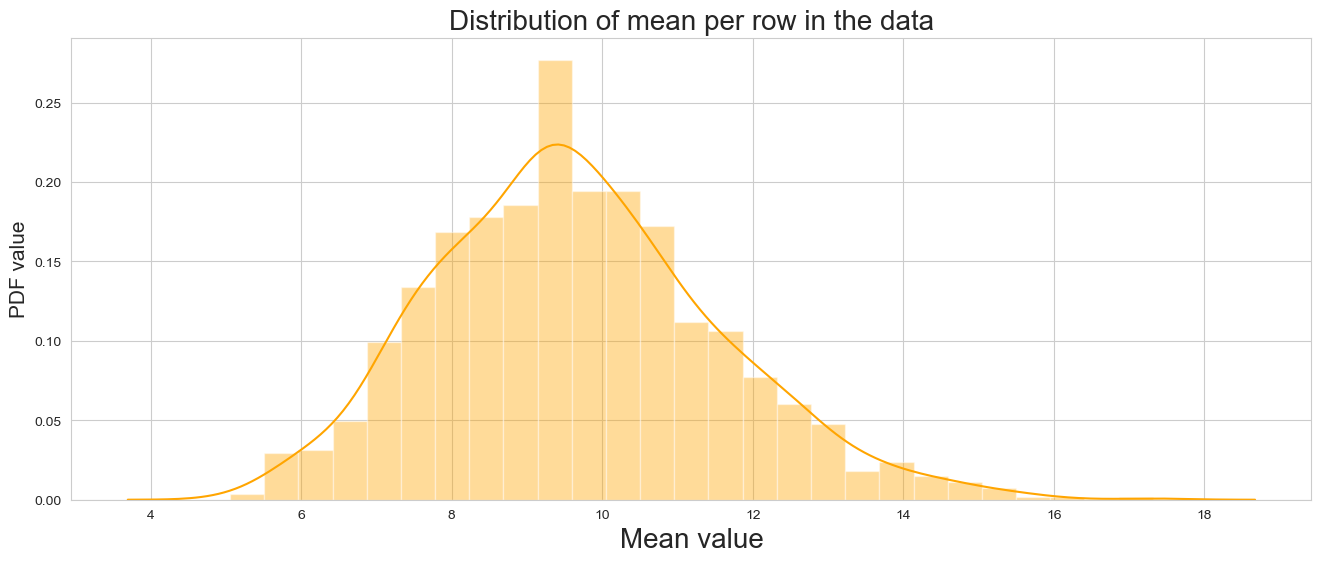

In [139]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = numerical.columns.values[0:20]
plt.title('Distribution of mean per row in the data', fontsize=20)
plt.xlabel('Mean value', fontsize=20)
plt.ylabel('PDF value', fontsize=15)
sns.distplot(data[features].mean(axis=1), color='ORANGE', kde=True)
plt.show()

* Using a mean value of 9.5, the graph above approximates the guassian distribution.
* Based on the graph above, we can infer that 8.5 to 10.5 is where 80% of feature means fall.

#### Distribution of standard deviation of data

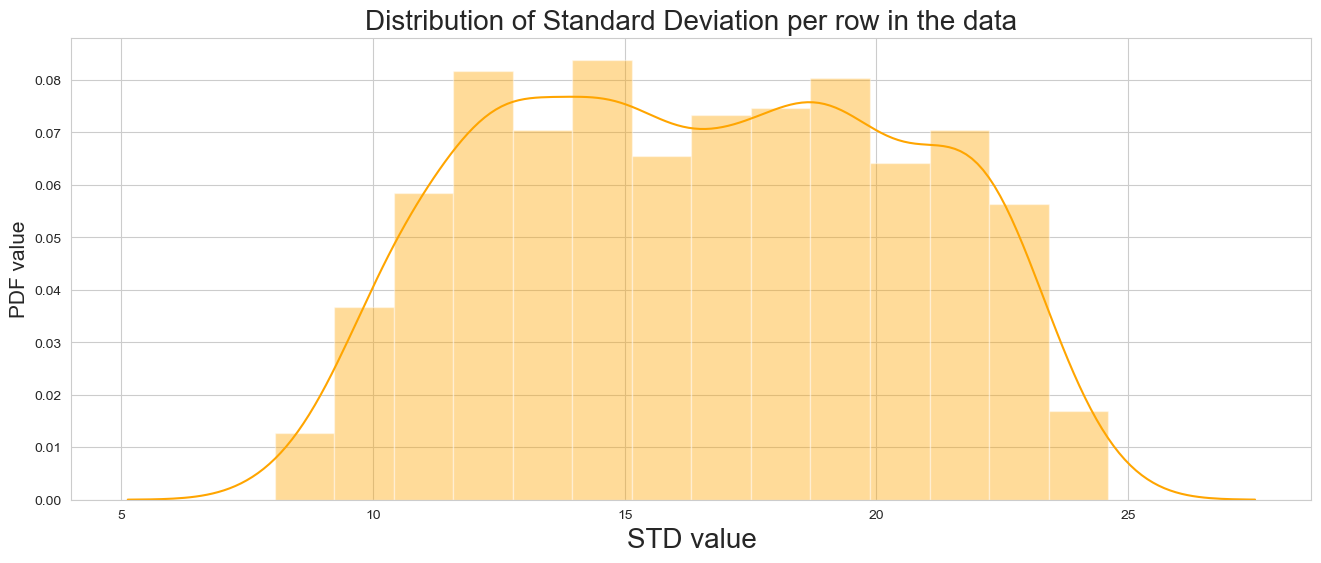

In [140]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = numerical.columns.values[0:27]
plt.title('Distribution of Standard Deviation per row in the data', fontsize=20)
plt.xlabel('STD value', fontsize=20)
plt.ylabel('PDF value', fontsize=15)
sns.distplot(data[features].std(axis=1), color='ORANGE', kde=True)
plt.show()

* This graph also appears to have a Gaussian distribution, with 30% of the feature standard deviation falling between 3 and 20 and the remaining 70% falling between 0 and 2.